In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
oecd_countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
            'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
            'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 
            'Latvia', 'Lithuania','Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
             'Poland','Portugal', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
             'Switzerland', 'Turkey', 'United Kingdom', 'United States']

In [3]:
hw_data = pd.read_excel('EFWAndRGDP.xlsx')

In [4]:
# Select all rows of 'hw_data' where the value in the 'Countries' column is in the list of 'oecd_countries'
hw_data = hw_data[hw_data['Countries'].isin(oecd_countries)]

In [5]:
# Set the index of the 'hw_data' DataFrame to a MultiIndex composed of the 'ISO_Code_3' and 'Year' columns
hw_data = hw_data.set_index(['ISO_Code_3', 'Year'])

In [6]:
hw_data

ISO_Code_2    World Bank Region  \
ISO_Code_3 Year                                         
AUS        1970-01-01         AU  East Asia & Pacific   
NaN        1975-01-01         AU  East Asia & Pacific   
           1980-01-01         AU  East Asia & Pacific   
           1985-01-01         AU  East Asia & Pacific   
           1990-01-01         AU  East Asia & Pacific   
...                          ...                  ...   
           2014-01-01         US        North America   
           2015-01-01         US        North America   
           2016-01-01         US        North America   
           2017-01-01         US        North America   
           2018-01-01         US        North America   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AUS        1970-01-01                                                NaN                                                                                     
NaN        1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                  H                                                                                     
...                                                                  ...                                                                                     
           2014-01-01                                                  H                                                                                     
           2015-01-01                                                  H                                                                                     
           2016-01-01                                                  H                                                                                     
           2017-01-01                                                  H                                                                                     
           2018-01-01                                                  H                                                                                     

                           Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                      
AUS        1970-01-01      Australia  7.291154            6.863768   
NaN        1975-01-01      Australia  7.002204            6.255684   
           1980-01-01      Australia  7.316469            6.339449   
           1985-01-01      Australia  7.670016            6.259326   
           1990-01-01      Australia  7.927001            6.708215   
...                              ...       ...                 ...   
           2014-01-01  United States  8.249649            7.239681   
           2015-01-01  United States  8.309574            7.237673   
           2016-01-01  United States  8.339536            7.252009   
           2017-01-01  United States  8.379486            7.354358   
           2018-01-01  United States  8.279612            7.409095   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AUS        1970-01-01                          7.775615     9.581113   
NaN        1975-01-01                          8.034445     8.346907   
           1980-01-01     

In [7]:
# Select all columns of 'hw_data' starting from the fourth column (index 3), and create a new DataFrame called 'reg_data'
reg_data = hw_data[hw_data.keys()[3:]]

reg_data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                      
AUS        1970-01-01      Australia  7.291154            6.863768   
NaN        1975-01-01      Australia  7.002204            6.255684   
           1980-01-01      Australia  7.316469            6.339449   
           1985-01-01      Australia  7.670016            6.259326   
           1990-01-01      Australia  7.927001            6.708215   
...                              ...       ...                 ...   
           2014-01-01  United States  8.249649            7.239681   
           2015-01-01  United States  8.309574            7.237673   
           2016-01-01  United States  8.339536            7.252009   
           2017-01-01  United States  8.379486            7.354358   
           2018-01-01  United States  8.279612            7.409095   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AUS        1970-01-01                          7.775615     9.581113   
NaN        1975-01-01                          8.034445     8.346907   
           1980-01-01                          8.037057     9.085686   
           1985-01-01                          8.540345     9.089736   
           1990-01-01                          8.398730     9.018318   
...                                                 ...          ...   
           2014-01-01                          7.652463     9.737154   
           2015-01-01                          7.745733     9.855788   
           2016-01-01                          7.793107     9.814703   
           2017-01-01                          7.802657     9.772320   
           2018-01-01                          7.646530     9.772494   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AUS        1970-01-01                          5.882101    6.335298   
NaN        1975-01-01                          5.692162    6.761980   
           1980-01-01                          5.841104    7.389934   
           1985-01-01                          6.985368    7.469774   
           1990-01-01                          7.661409    7.750886   
...                                                 ...         ...   
           2014-01-01                          7.836022    8.792114   
           2015-01-01                          7.810632    8.891698   
           2016-01-01                          7.889129    8.952382   
           2017-01-01                          7.921225    9.031901   
           2018-01-01                          7.783384    8.784245   

                       RGDP Per Capita  
ISO_Code_3 Year                         
AUS        1970-01-01       19166.0000  
NaN        1975-01-01       20993.0000  
           1980-01-01       22972.0000  
           1985-01-01       24927.0000  
           1990-01-01       27373.0000  
...                                ...  
           2014-01-01       51664.0000  
           2015-01-01       52591.0000  
           2016-01-01       53015.0000  
           2017-01-01       54007.7698  
           2018-01-01       55334.7394  

[900 rows x 8 columns]

In [8]:
years_diff = 5

# Take the difference of the natural logarithm of the 'RGDP Per Capita' column of the 'reg_data' DataFrame, with a lag of 'years_diff' years, and assign it back to the 'RGDP Per Capita' column
reg_data['RGDP Per Capita'] = np.log(reg_data['RGDP Per Capita']).diff(years_diff)

# Replace any infinite or negative infinite values in the 'reg_data' DataFrame with NaN
reg_data = reg_data.replace([np.inf, -np.inf], np.NaN)

C:\Users\akoto\AppData\Local\Temp\ipykernel_4344\3848243571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['RGDP Per Capita'] = np.log(reg_data['RGDP Per Capita']).diff(years_diff)


In [9]:
years_diff = 5
# Add a new column to the 'reg_data' DataFrame called 'RGDP Per Capita Lag', 
# which contains the lagged values of the 'RGDP Per Capita' column with a lag of 'years_diff' years
reg_data['RGDP Per Capita Lag'] = reg_data['RGDP Per Capita'].shift(years_diff)

# Drop any rows with missing values in the 'reg_data' DataFrame
reg_data = reg_data.dropna(axis=0, how='any')


In [10]:
reg_data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                      
NaN        2004-01-01      Australia  8.080821            6.748848   
           2005-01-01      Australia  8.169839            6.760857   
           2006-01-01      Australia  8.209789            7.070651   
           2007-01-01      Australia  8.249739            7.138698   
           2008-01-01      Australia  8.179826            7.096147   
...                              ...       ...                 ...   
           2014-01-01  United States  8.249649            7.239681   
           2015-01-01  United States  8.309574            7.237673   
           2016-01-01  United States  8.339536            7.252009   
           2017-01-01  United States  8.379486            7.354358   
           2018-01-01  United States  8.279612            7.409095   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
NaN        2004-01-01                          8.275733     9.544097   
           2005-01-01                          8.526133     9.546541   
           2006-01-01                          8.537280     9.413884   
           2007-01-01                          8.547621     9.427817   
           2008-01-01                          8.438008     9.304524   
...                                                 ...          ...   
           2014-01-01                          7.652463     9.737154   
           2015-01-01                          7.745733     9.855788   
           2016-01-01                          7.793107     9.814703   
           2017-01-01                          7.802657     9.772320   
           2018-01-01                          7.646530     9.772494   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
NaN        2004-01-01                          7.393784    8.445872   
           2005-01-01                          7.434849    8.595742   
           2006-01-01                          7.455955    8.588549   
           2007-01-01                          7.500383    8.626157   
           2008-01-01                          7.453711    8.605381   
...                                                 ...         ...   
           2014-01-01                          7.836022    8.792114   
           2015-01-01                          7.810632    8.891698   
           2016-01-01                          7.889129    8.952382   
           2017-01-01                          7.921225    9.031901   
           2018-01-01                          7.783384    8.784245   

                       RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code_3 Year                                              
NaN        2004-01-01         0.286891             0.470801  
           2005-01-01         0.135260             0.555942  
           2006-01-01         0.134701             0.484073  
           2007-01-01         0.132554             0.436447  
           2008-01-01         0.116827             0.367342  
...                                ...                  ...  
           2014-01-01         0.064168            -0.000821  
           2015-01-01         0.065292            -0.007842  
           2016-01-01         0.065073            -0.016271  
           2017-01-01         0.069256            -0.010025  
           2018-01-01         0.084265             0.011613  

[847 rows x 9 columns]

In [11]:
# Get an array of unique values for the 'ISO_Code_3' index level of the 'reg_data' DataFrame
reg_data.index.get_level_values('ISO_Code_3').unique()


Index([  nan, 'AUT', 'BEL', 'CAN', 'CHE', 'CRI', 'DEU', 'DNK', 'ESP', 'FIN',
       'FRA', 'GBR', 'GRC', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'LUX', 'MEX',
       'NLD', 'NOR', 'NZL', 'PRT', 'SWE', 'TUR', 'USA'],
      dtype='object', name='ISO_Code_3')

In [12]:
# Create a list of the column names (variables) in the 'reg_data' DataFrame
reg_vars = list(reg_data.keys())
reg_vars


['Countries',
 'Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita',
 'RGDP Per Capita Lag']

In [13]:
# Create a list of independent variable names by selecting the columns from the 'reg_data' DataFrame using indexing
x_vars = list(reg_data.keys()[2:7])

# Create a list of the dependent variable name by selecting the column from the 'reg_data' DataFrame using indexing
y_var = [reg_data.keys()[7]]

# Append the column name 'RGDP Per Capita Lag' to the list of independent variable names
x_vars.append('RGDP Per Capita Lag')

# Print the lists of independent and dependent variable names
x_vars, y_var

(['Size of Government',
  'Legal System and Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation',
  'RGDP Per Capita Lag'],
 ['RGDP Per Capita'])

In [14]:
# Assign the dependent variable to y and the independent variables to X
y = reg_data[y_var]
X = reg_data[x_vars]

# Add a constant term to the independent variable matrix X
X = sm.add_constant(X)

# Fit an ordinary least squares (OLS) regression model using the statsmodels library
results = sm.OLS(y, X).fit()

# Calculate the predicted values of the dependent variable using the fitted model
reg_data['Predictor'] = results.predict()

# Print a summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.73e-132
Time:                        18:40:52   Log-Likelihood:                -184.64
No. Observations:                 847   AIC:                             383.3
Df Residuals:                     840   BIC:                             416.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [15]:
reg_data['Residauls'] = results.resid

In [16]:
reg_data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                      
NaN        2004-01-01      Australia  8.080821            6.748848   
           2005-01-01      Australia  8.169839            6.760857   
           2006-01-01      Australia  8.209789            7.070651   
           2007-01-01      Australia  8.249739            7.138698   
           2008-01-01      Australia  8.179826            7.096147   
...                              ...       ...                 ...   
           2014-01-01  United States  8.249649            7.239681   
           2015-01-01  United States  8.309574            7.237673   
           2016-01-01  United States  8.339536            7.252009   
           2017-01-01  United States  8.379486            7.354358   
           2018-01-01  United States  8.279612            7.409095   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
NaN        2004-01-01                          8.275733     9.544097   
           2005-01-01                          8.526133     9.546541   
           2006-01-01                          8.537280     9.413884   
           2007-01-01                          8.547621     9.427817   
           2008-01-01                          8.438008     9.304524   
...                                                 ...          ...   
           2014-01-01                          7.652463     9.737154   
           2015-01-01                          7.745733     9.855788   
           2016-01-01                          7.793107     9.814703   
           2017-01-01                          7.802657     9.772320   
           2018-01-01                          7.646530     9.772494   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
NaN        2004-01-01                          7.393784    8.445872   
           2005-01-01                          7.434849    8.595742   
           2006-01-01                          7.455955    8.588549   
           2007-01-01                          7.500383    8.626157   
           2008-01-01                          7.453711    8.605381   
...                                                 ...         ...   
           2014-01-01                          7.836022    8.792114   
           2015-01-01                          7.810632    8.891698   
           2016-01-01                          7.889129    8.952382   
           2017-01-01                          7.921225    9.031901   
           2018-01-01                          7.783384    8.784245   

                       RGDP Per Capita  RGDP Per Capita Lag  Predictor  \
ISO_Code_3 Year                                                          
NaN        2004-01-01         0.286891             0.470801  -0.057435   
           2005-01-01         0.135260             0.555942  -0.073044   
           2006-01-01         0.134701             0.484073  -0.050650   
           2007-01-01         0.132554             0.436447  -0.026685   
           2008-01-01         0.116827             0.367342  -0.027757   
...                                ...                  ...        ...   
           2014-01-01         0.064168            -0.000821   0.192317   
           2015-01-01         0.065292            -0.007842   0.202768   
           2016-01-01         0.065073            -0.016271   0.213952   
           2017-01-01         0.069256            -0.010025   0.220025   
           2018-01-01         0.084265             0.011613   0.192492   

                       Residauls  
ISO_Code_3 Year                   
NaN        2004-01-01   0.344326  
           2005-01-01   0.208304  
           2006-01-01   0.185351  
           2007-01-01   0.159238  
           2008-01-01   0.144584  
...                          ...  
           2

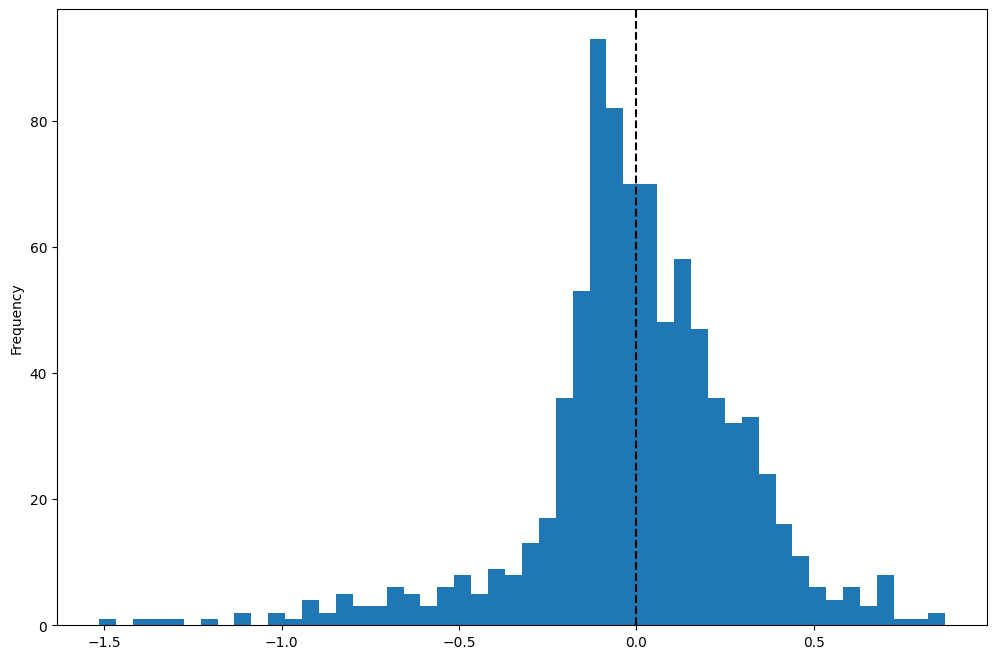

In [17]:
# Create a new figure and axes with a specified size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a histogram of the residuals from the fitted regression model
reg_data['Residauls'].plot.hist(bins=50, ax=ax)

# Add a vertical dashed line at the value of zero on the x-axis
ax.axvline(0, ls='--', color='k')

## Q2

This is due to the fact that in a regression analysis, the residuals indicate the discrepancies between the dependent variable's actual values and predicted values. When the sample size is small, outliers or extreme values may have an impact on the residuals, resulting in a skewed or non-normal distribution. The distribution of residuals, on the other hand, tends to become more normal and symmetrical as sample size increases, as the impact of outliers and extreme values is reduced. Therefore, even when the same variables and models are employed, the sample size might have an impact on the form of the residual distribution.

## Question 3

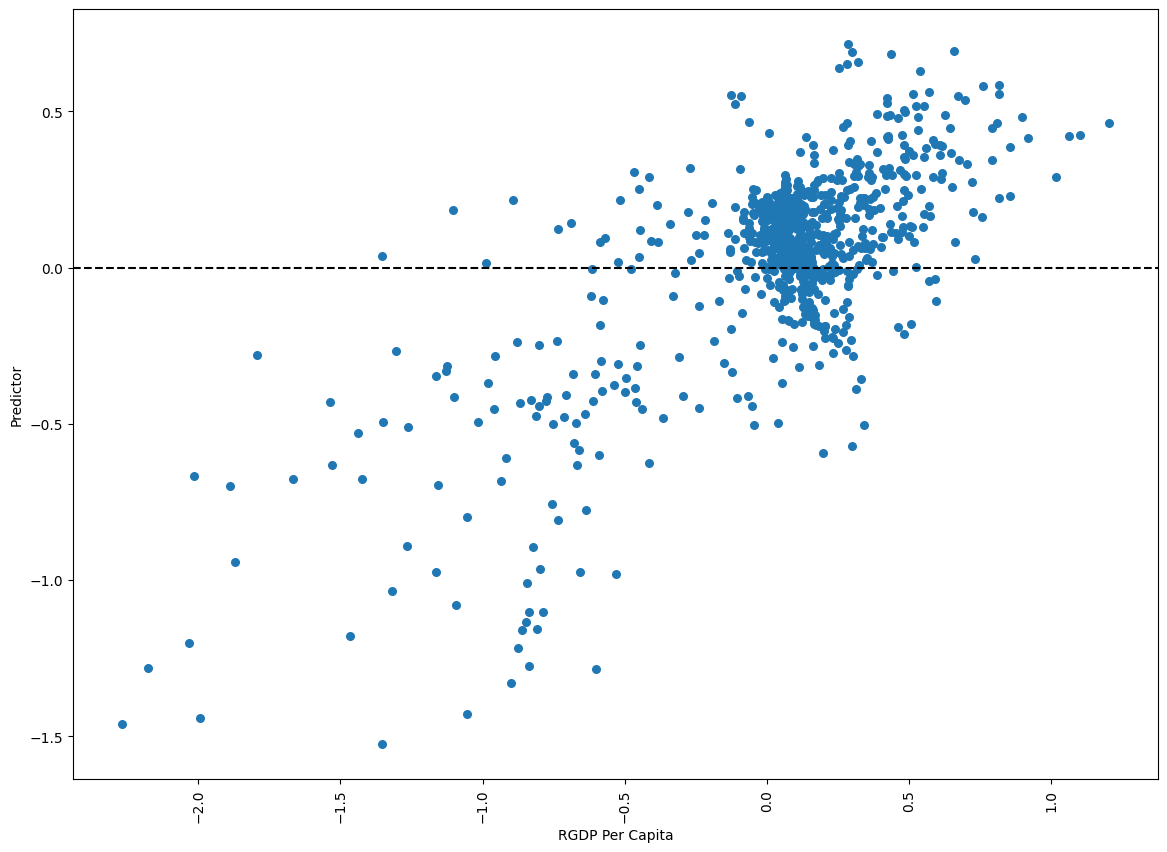

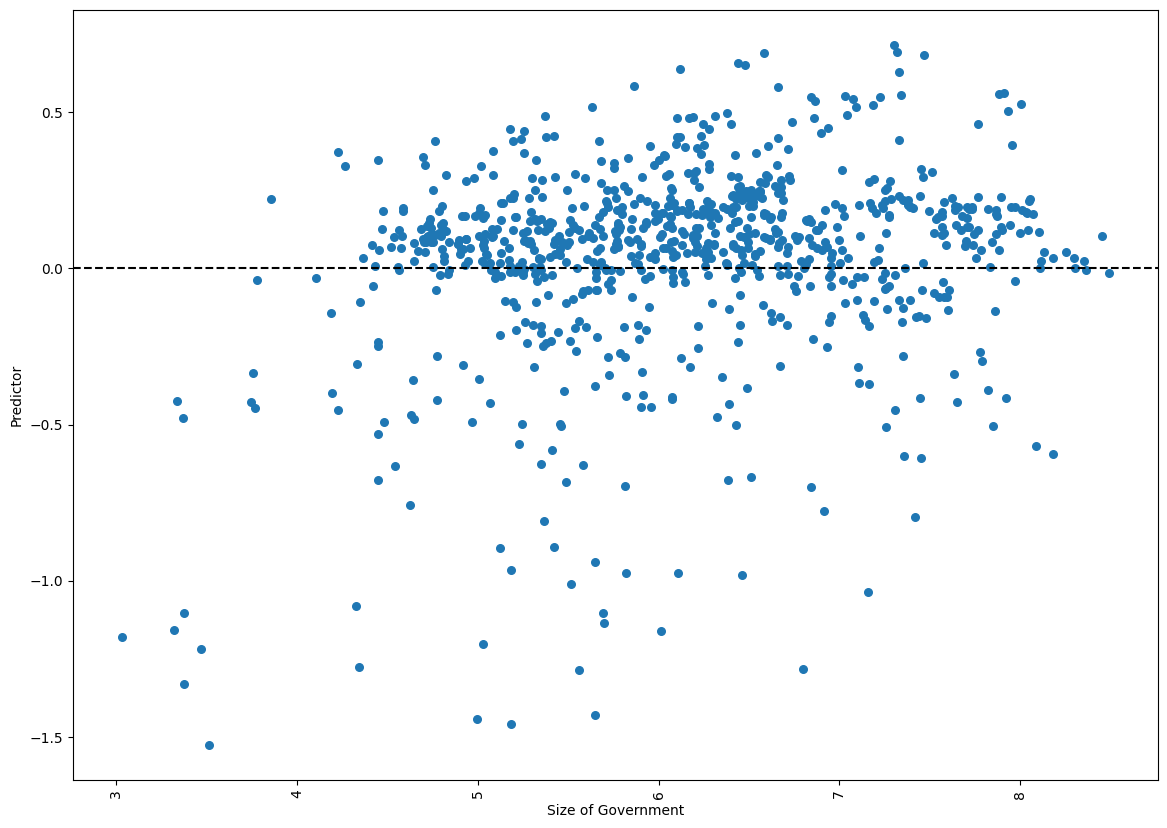

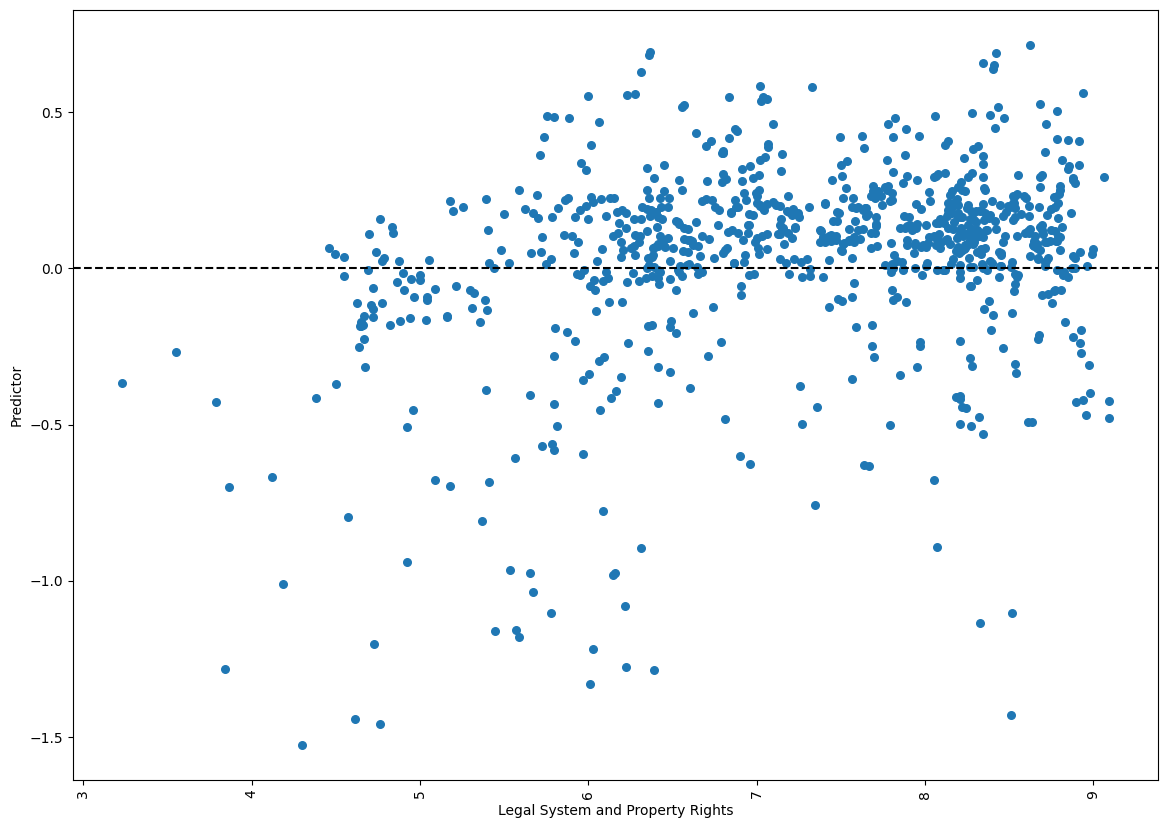

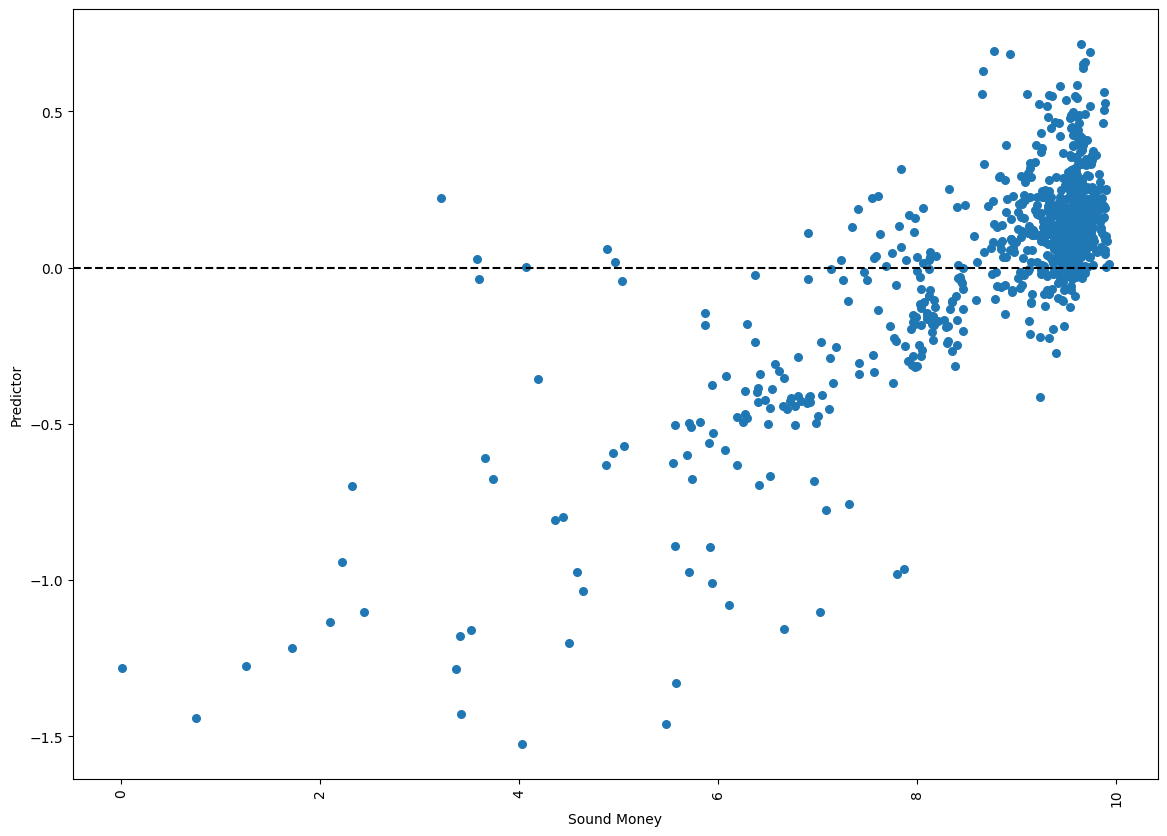

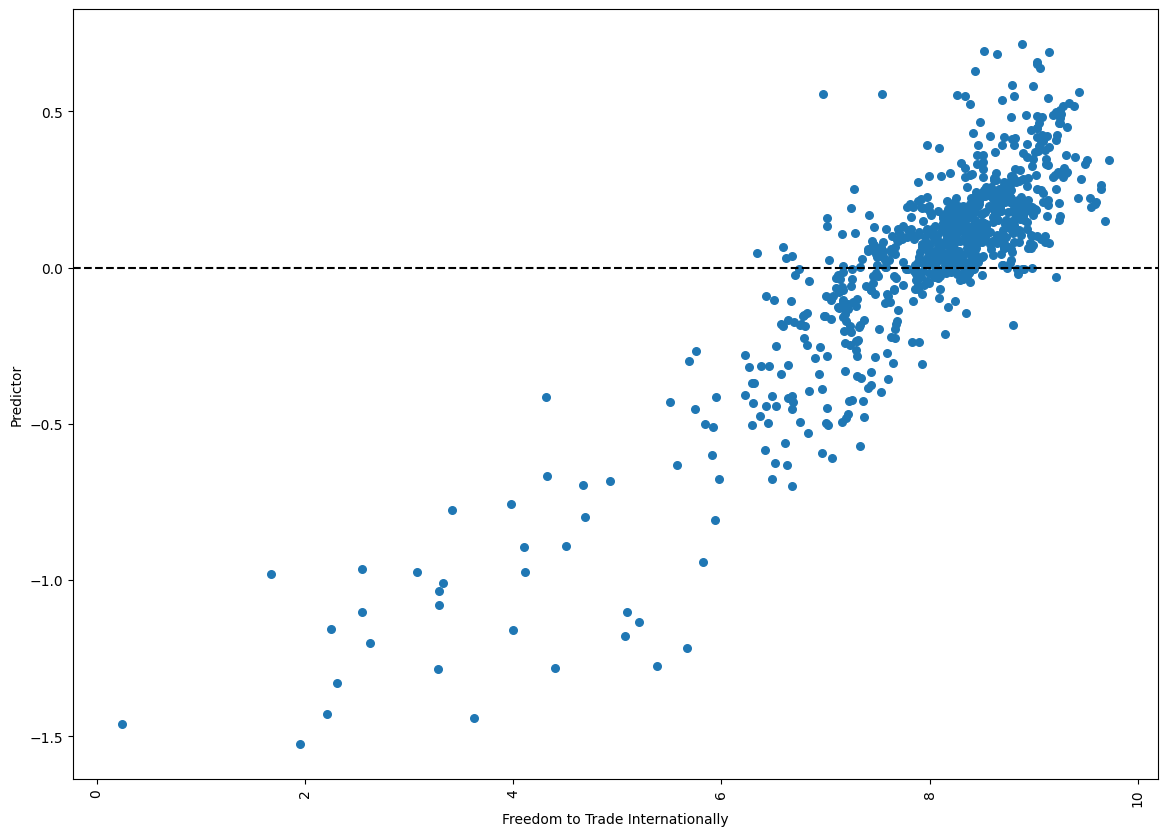

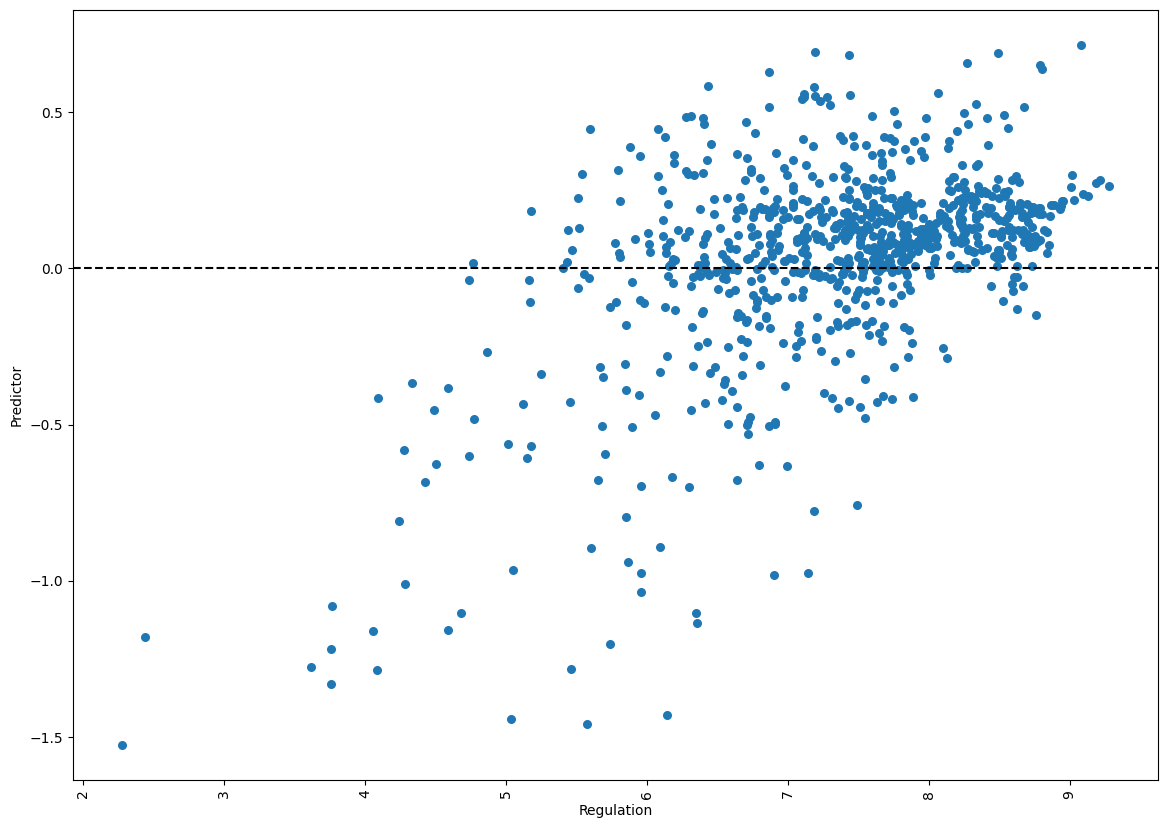

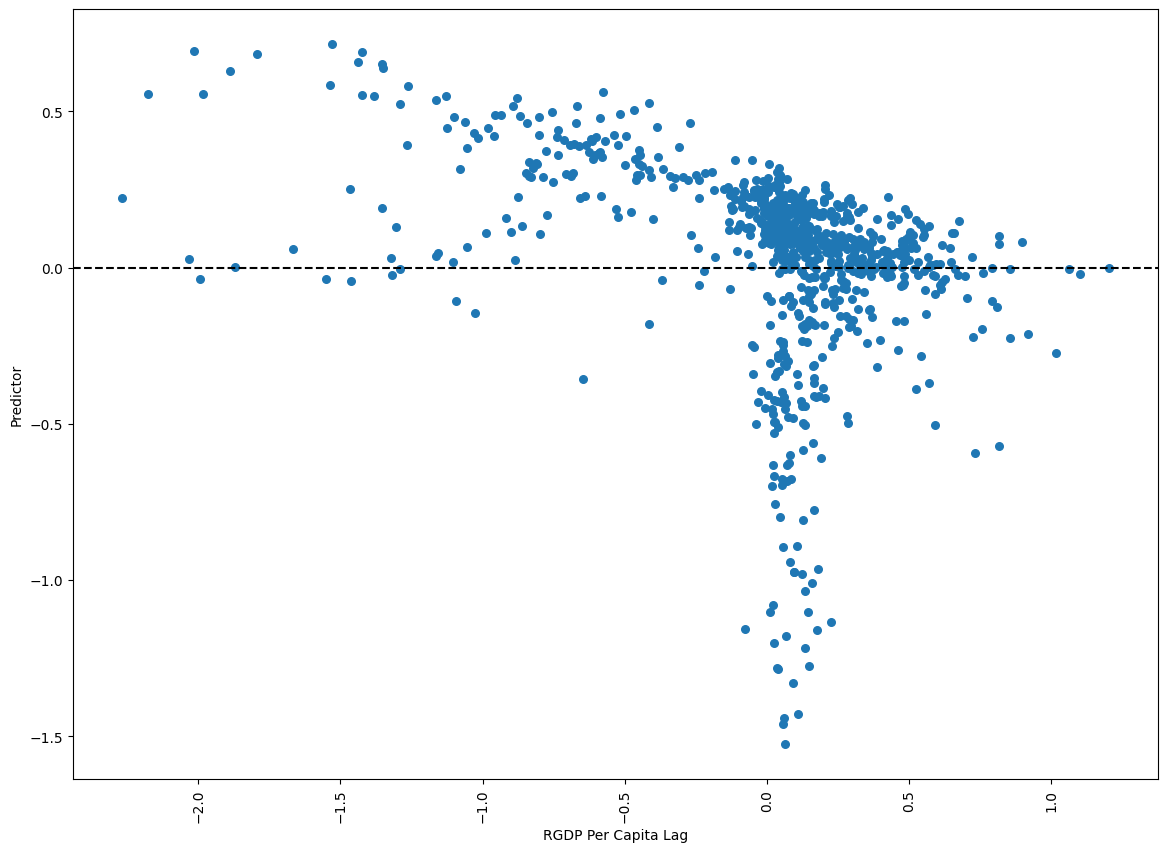

In [18]:
# Define a function called plot_residuals that takes a DataFrame, a list of y variables, and a list of x variables as input
def plot_residuals(df, y_var, x_vars):
    # For each variable in the list of y variables plus the list of x variables
    for var in y_var + x_vars:
        # Create a new figure and axes object with a specified size
        fig, ax = plt.subplots(figsize=(14, 10))
        
        # Create a scatter plot of the predictor variable against the current variable
        df.plot.scatter(x=var, y='Predictor', s=30, ax=ax)
        
        # Add a horizontal dashed line at the value of zero on the y-axis
        ax.axhline(0, ls='--', color='k')
        
        # Rotate the x-axis tick labels by 90 degrees
        plt.xticks(rotation=90)
        
        # Display the plot
        plt.show()
        
        # Close the figure
        plt.close()

# Call the plot_residuals function
plot_residuals(reg_data, y_var, x_vars)


Yes, we do observe bias in the resdiuals when controlling for each variable.

This is because observing bias in the residuals means that the errors (the differences between the observed values and the predicted values) are not randomly distributed around zero. Instead, there is a systematic pattern in the residuals, indicating that the model is not accurately capturing the relationship between the independent and dependent variables.

In [19]:
countries = sorted(list(set(reg_data.index.get_level_values('ISO_Code_3').astype(str))))
print(countries)

['AUT', 'BEL', 'CAN', 'CHE', 'CRI', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA', 'GBR', 'GRC', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'LUX', 'MEX', 'NLD', 'NOR', 'NZL', 'PRT', 'SWE', 'TUR', 'USA', 'nan']


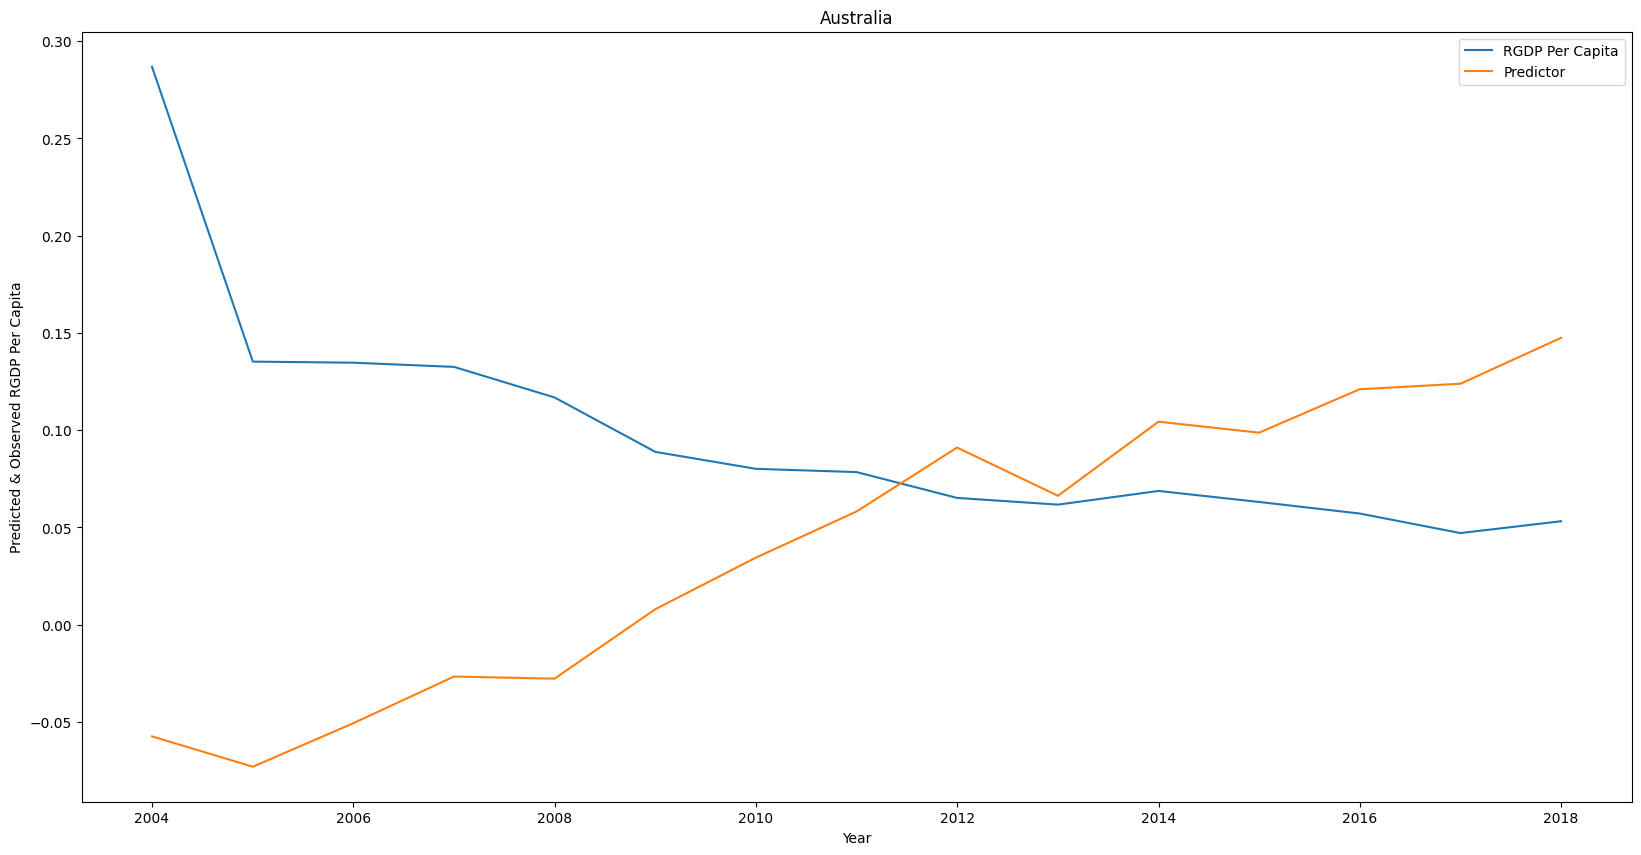

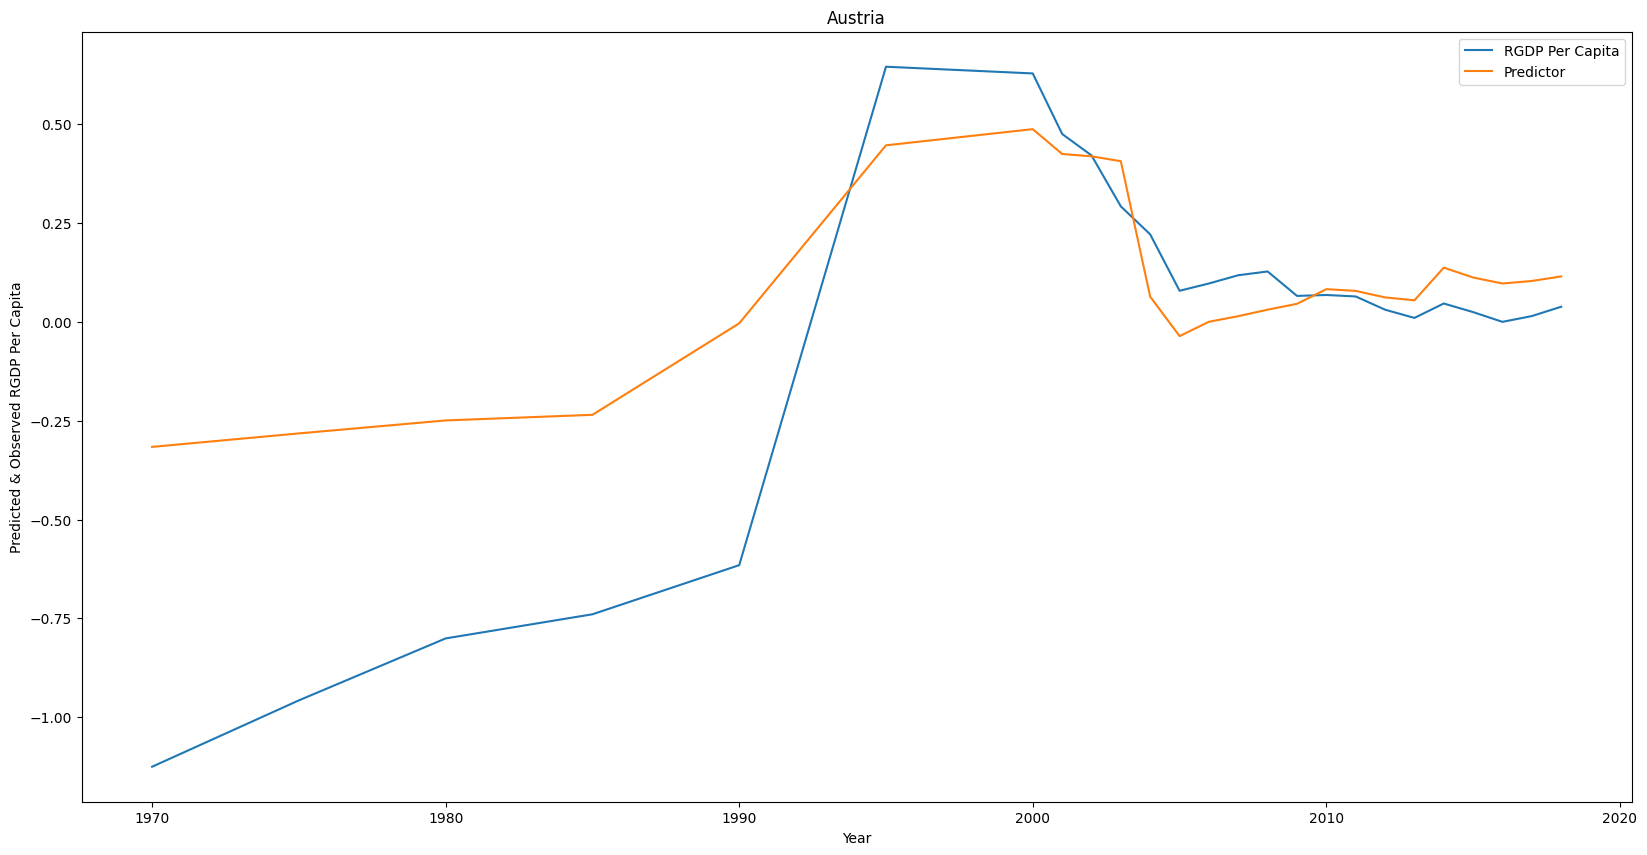

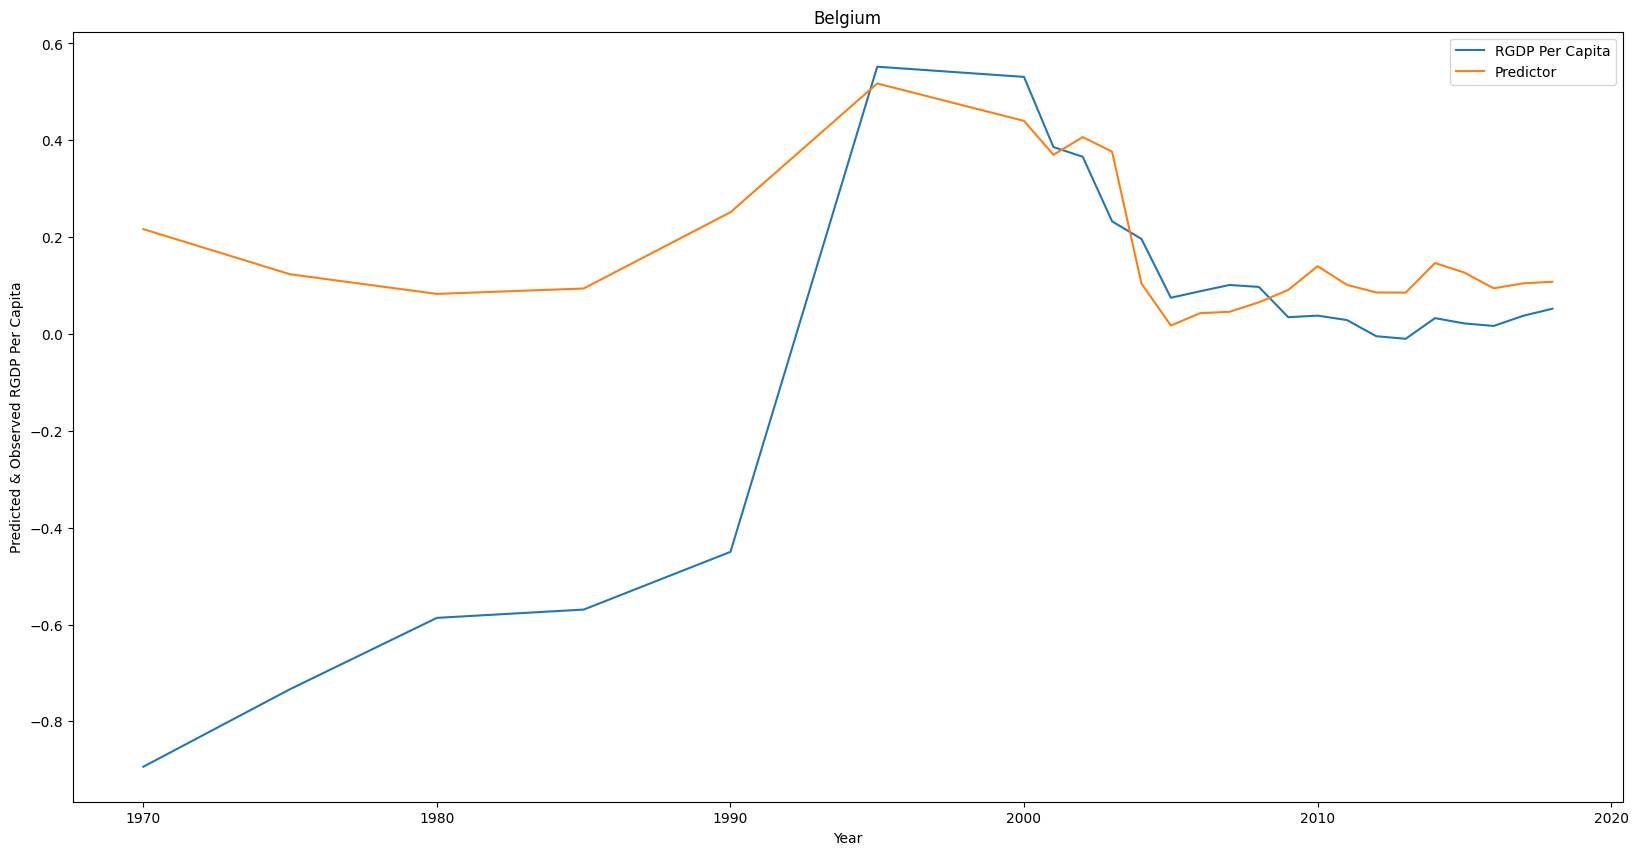

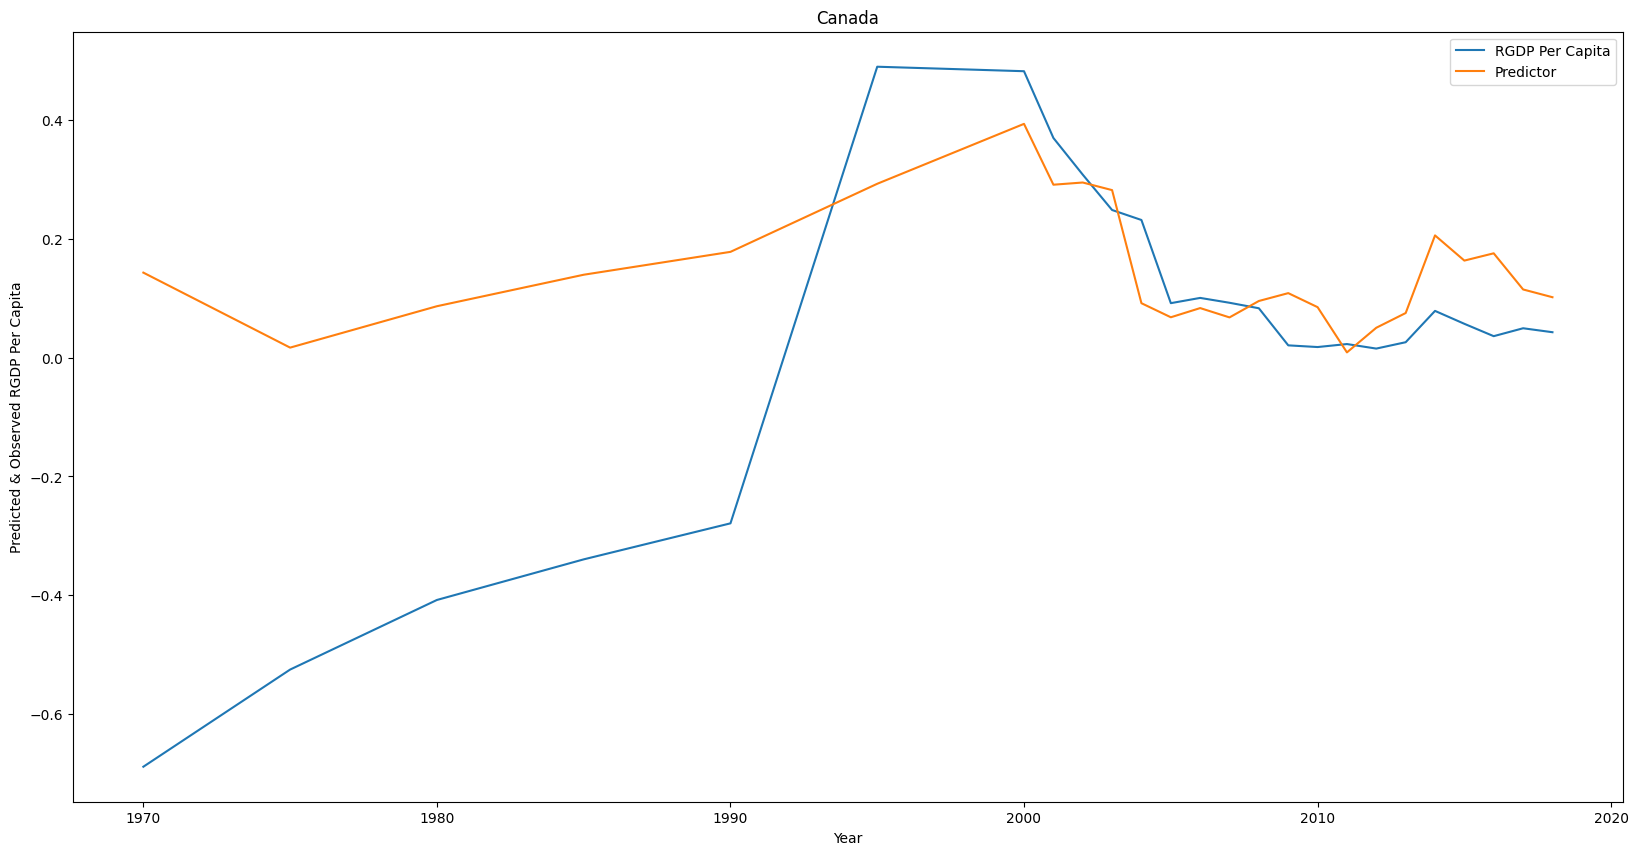

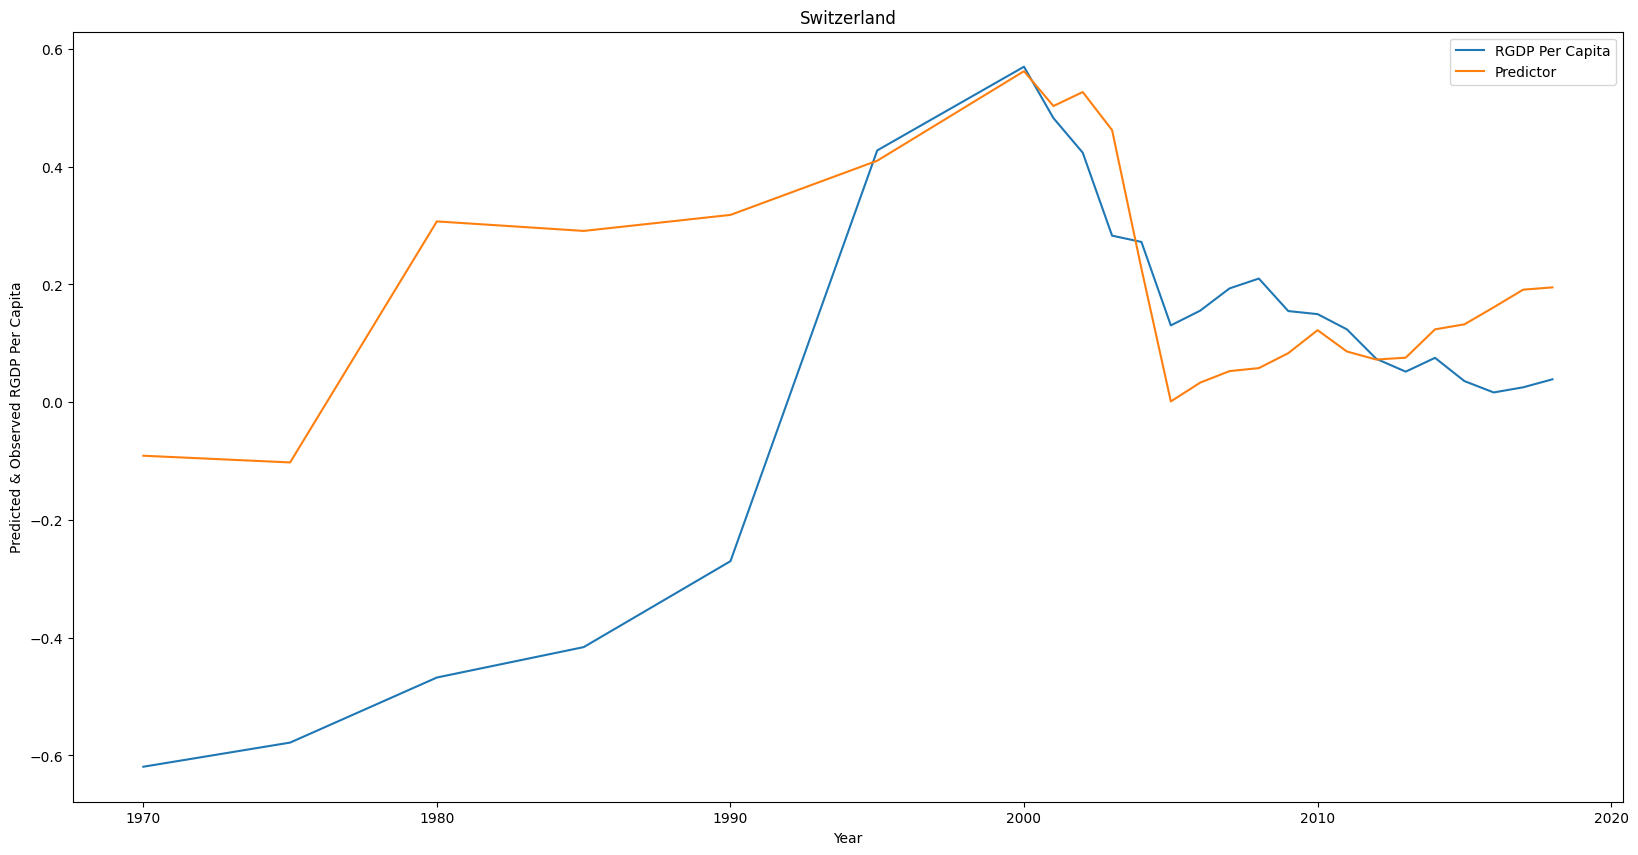

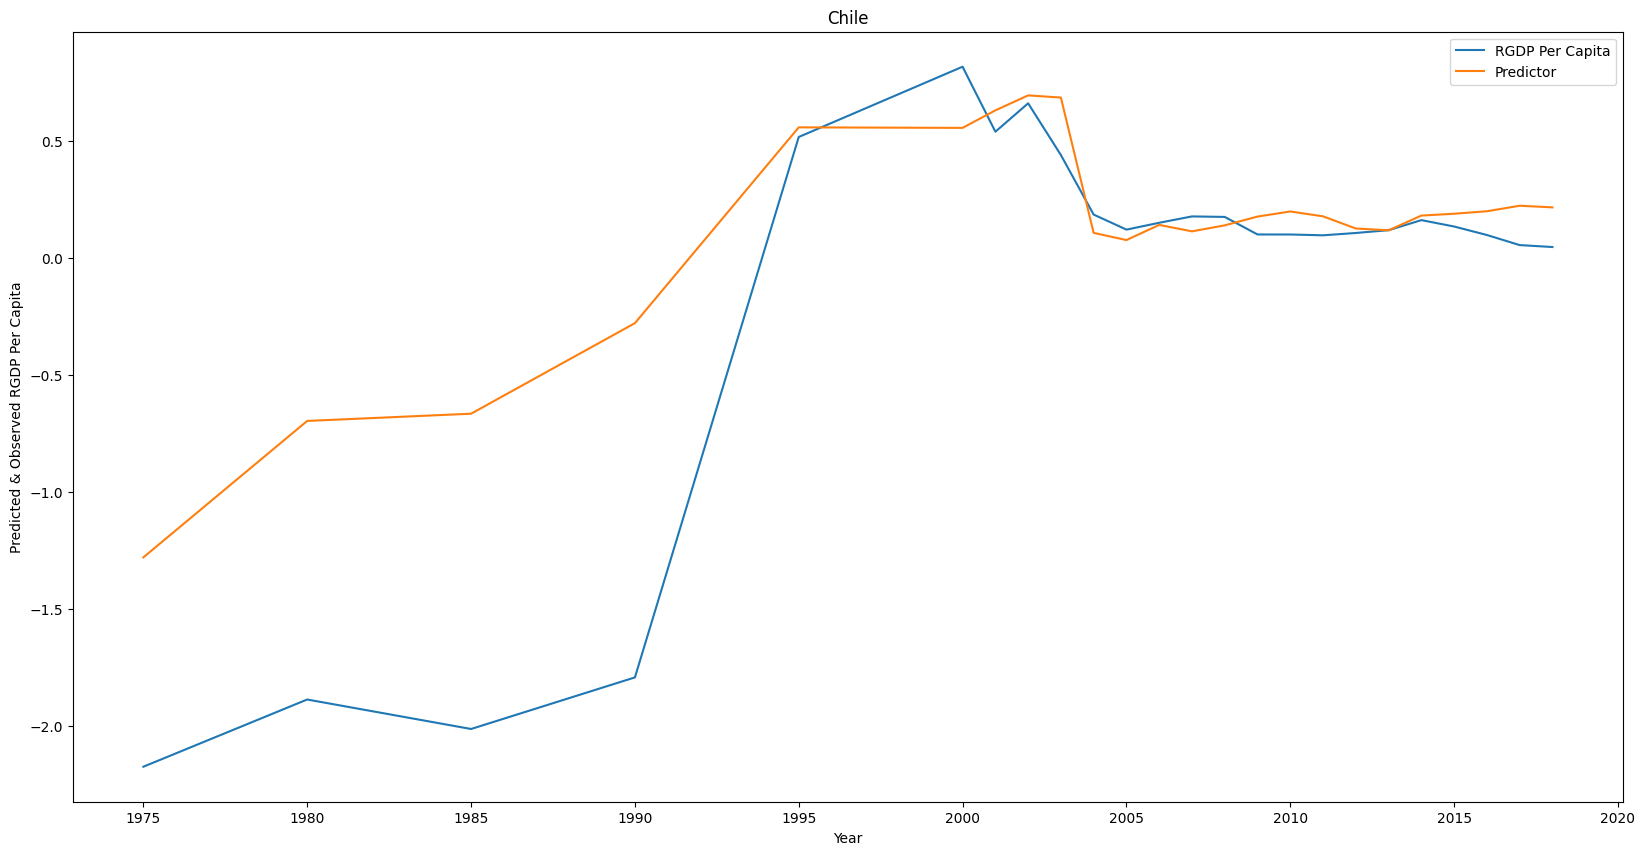

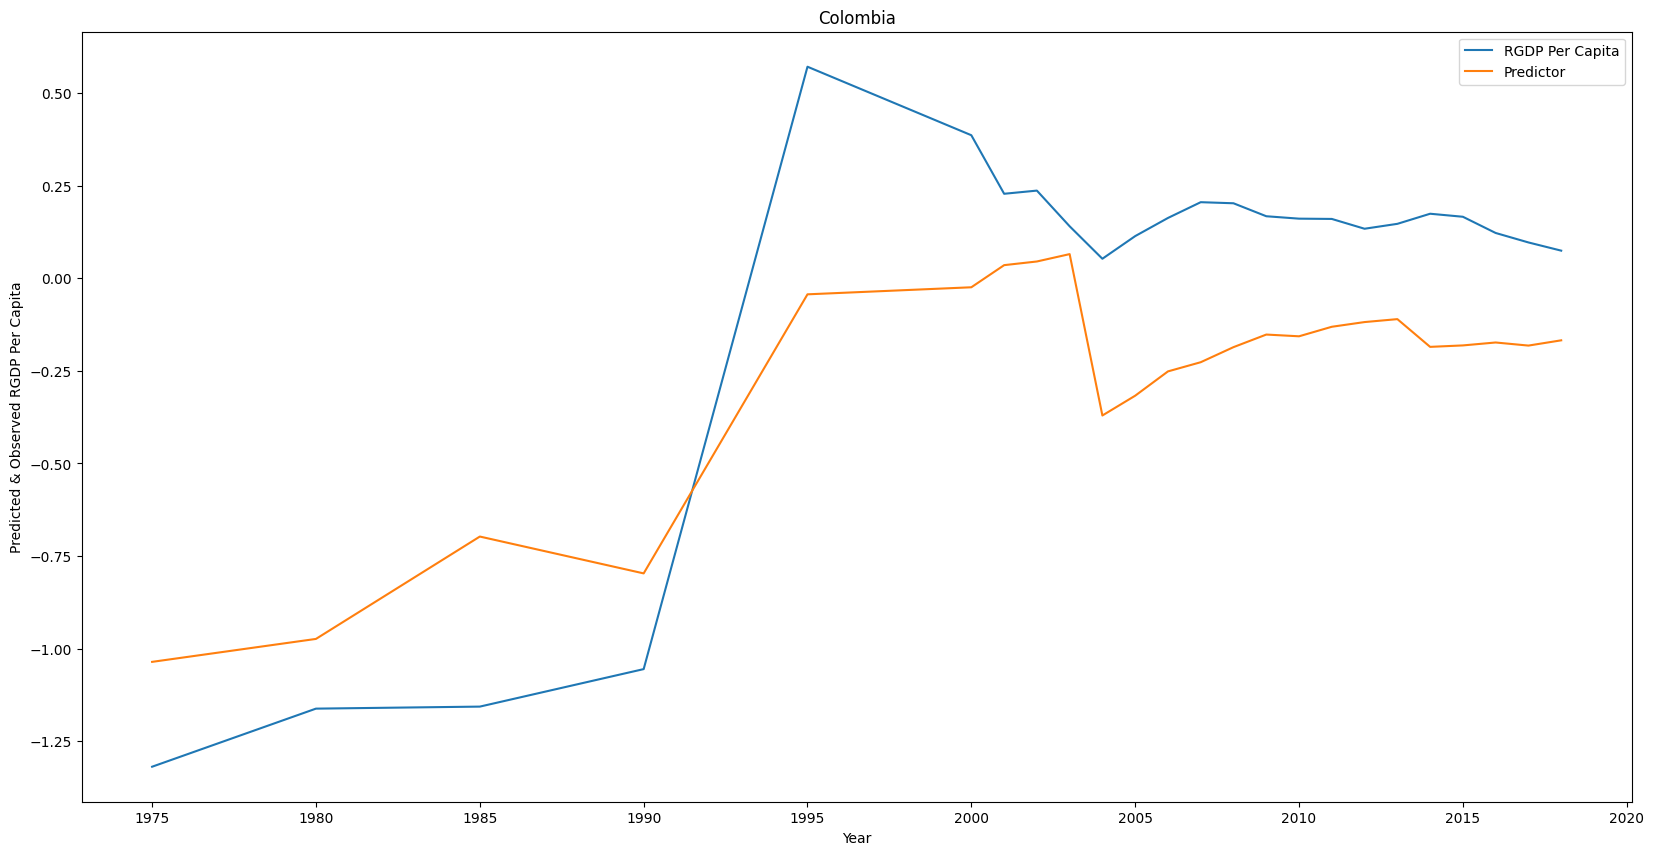

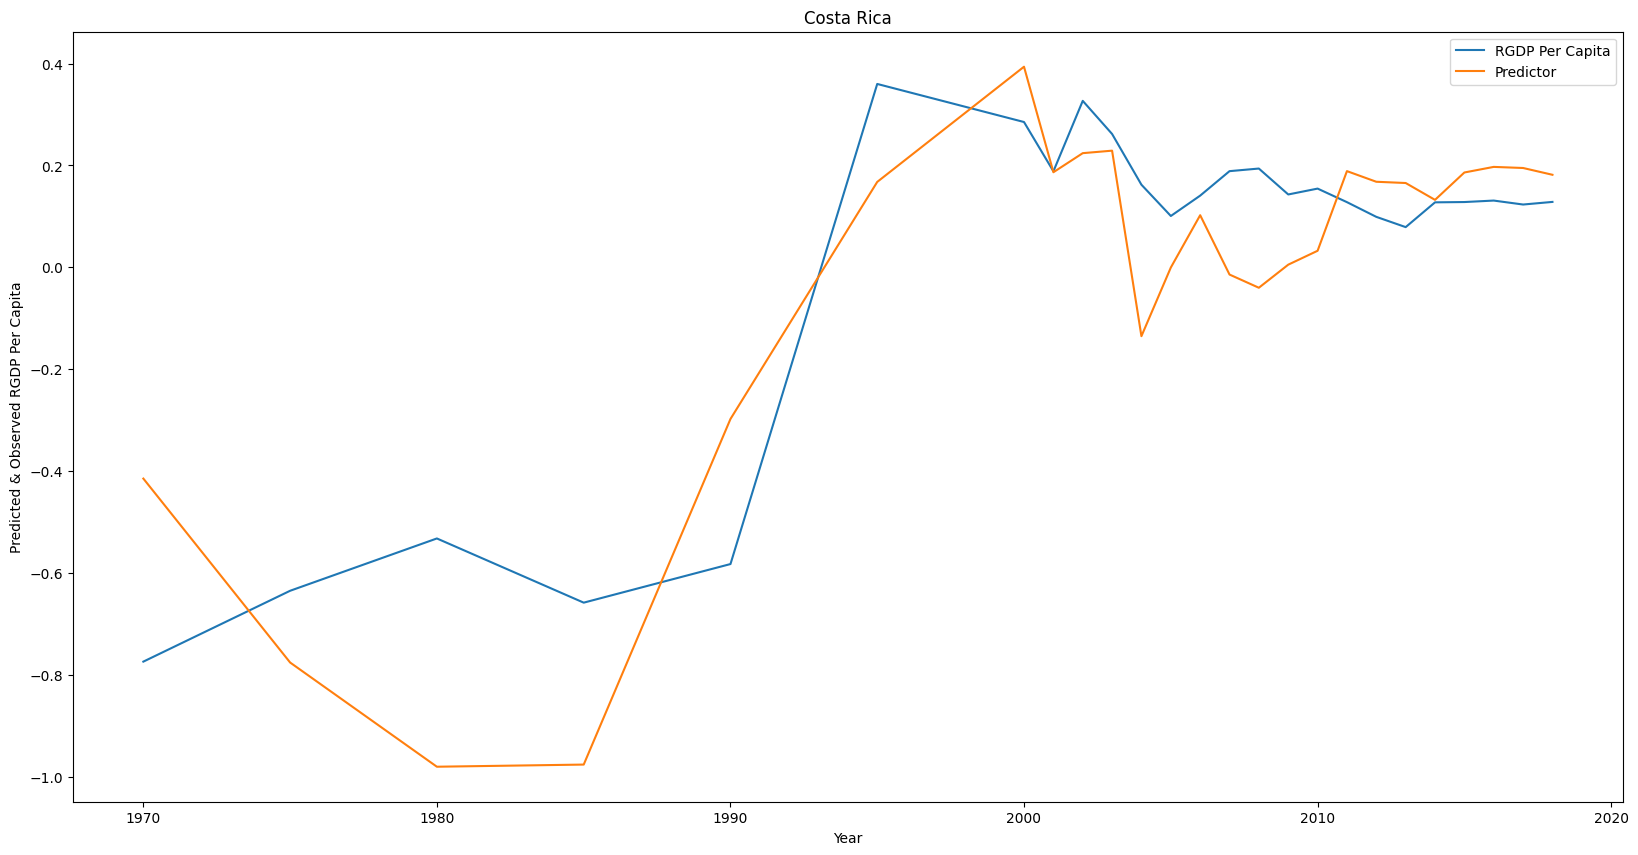

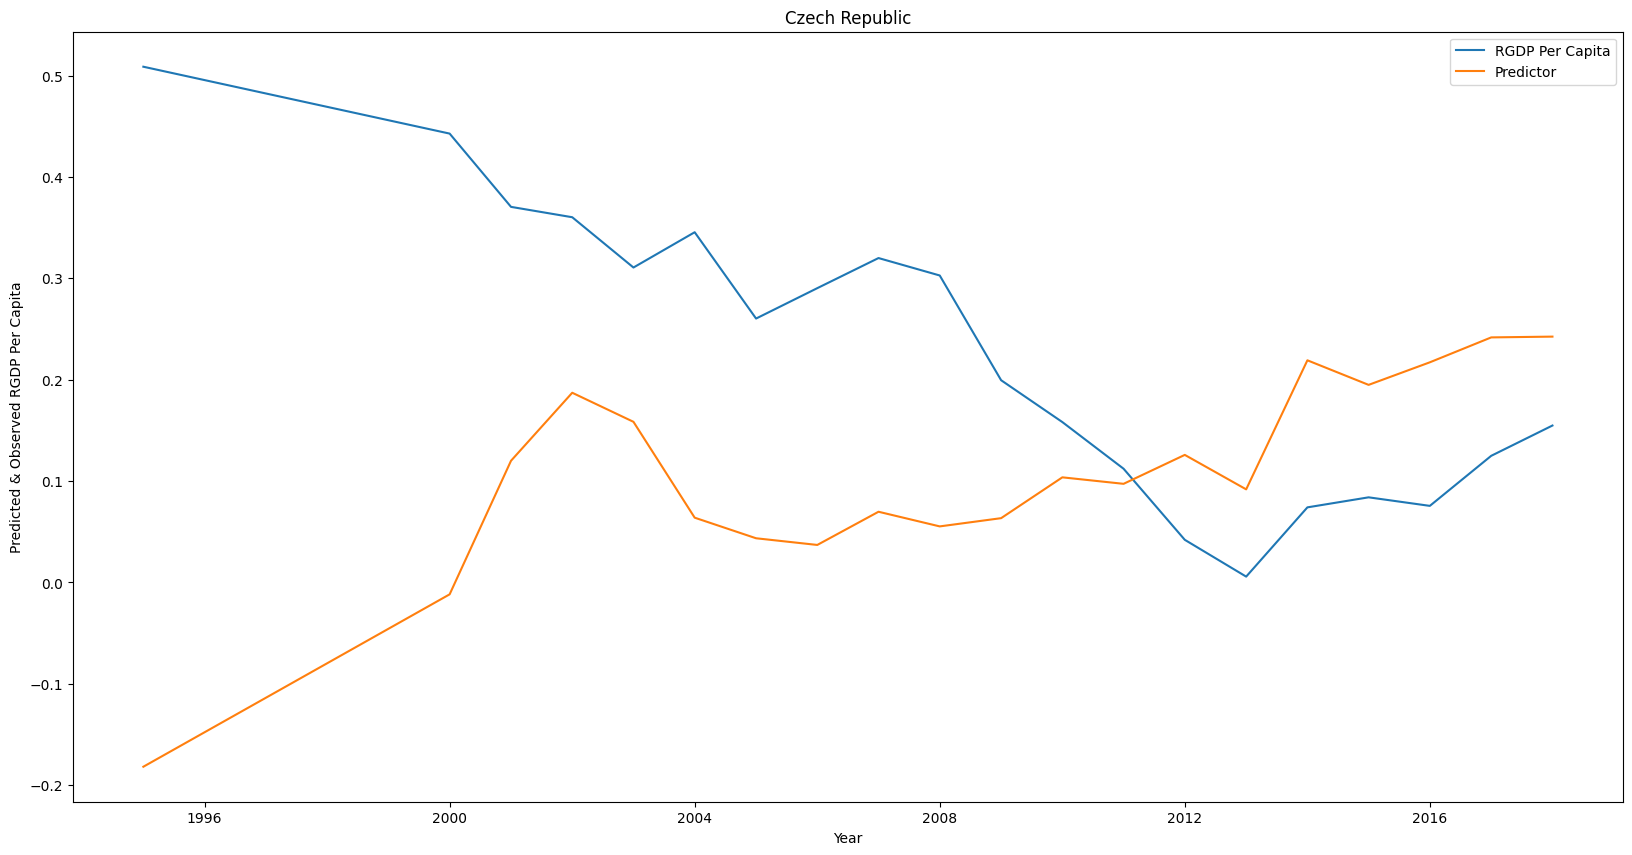

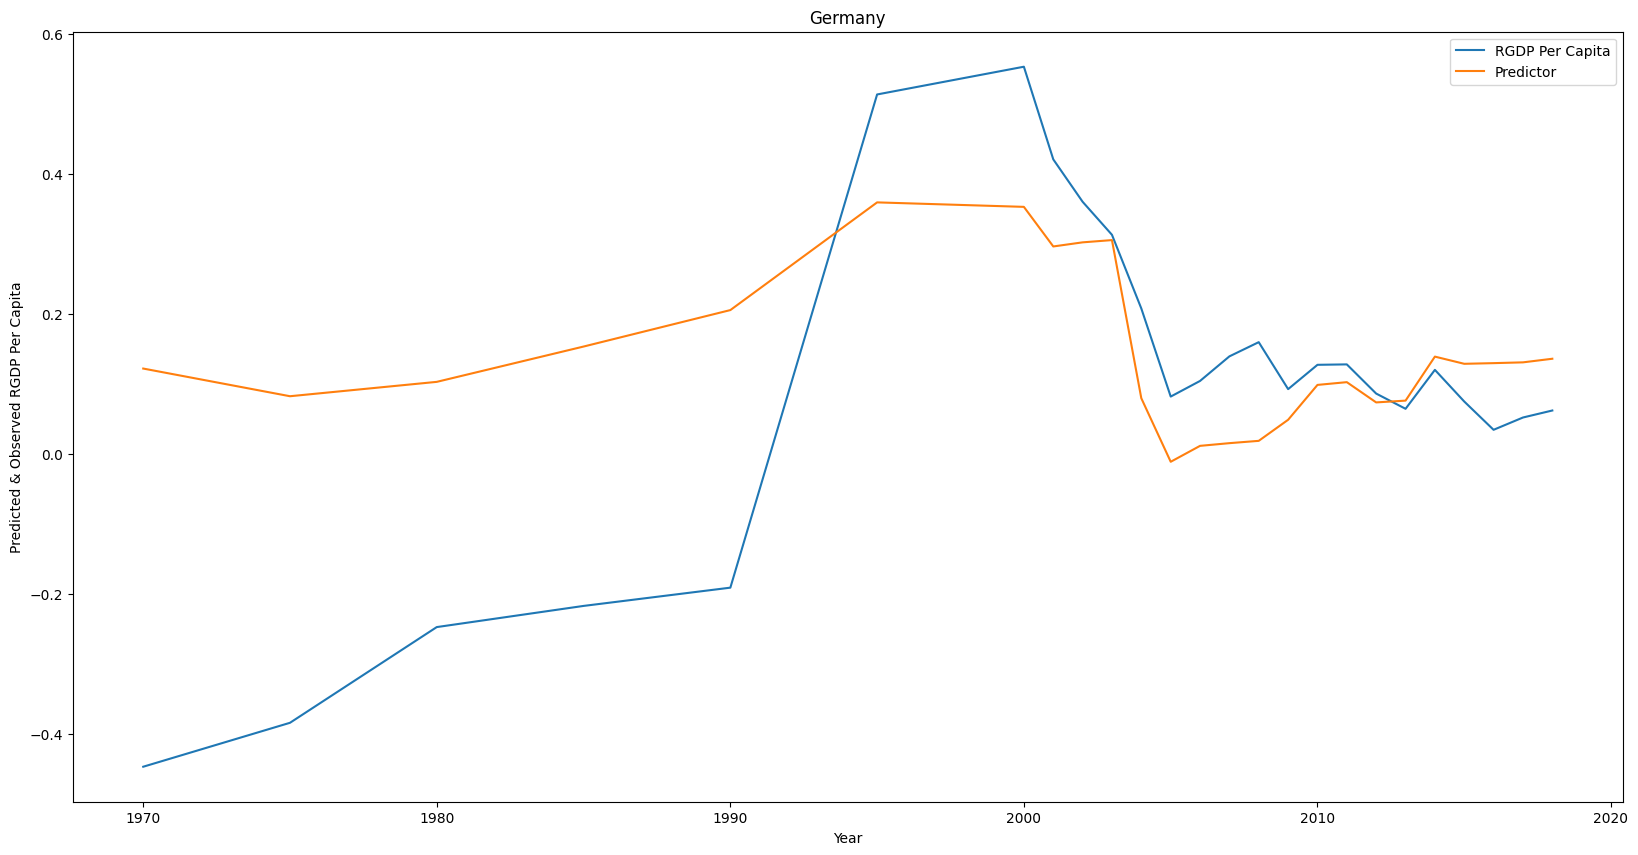

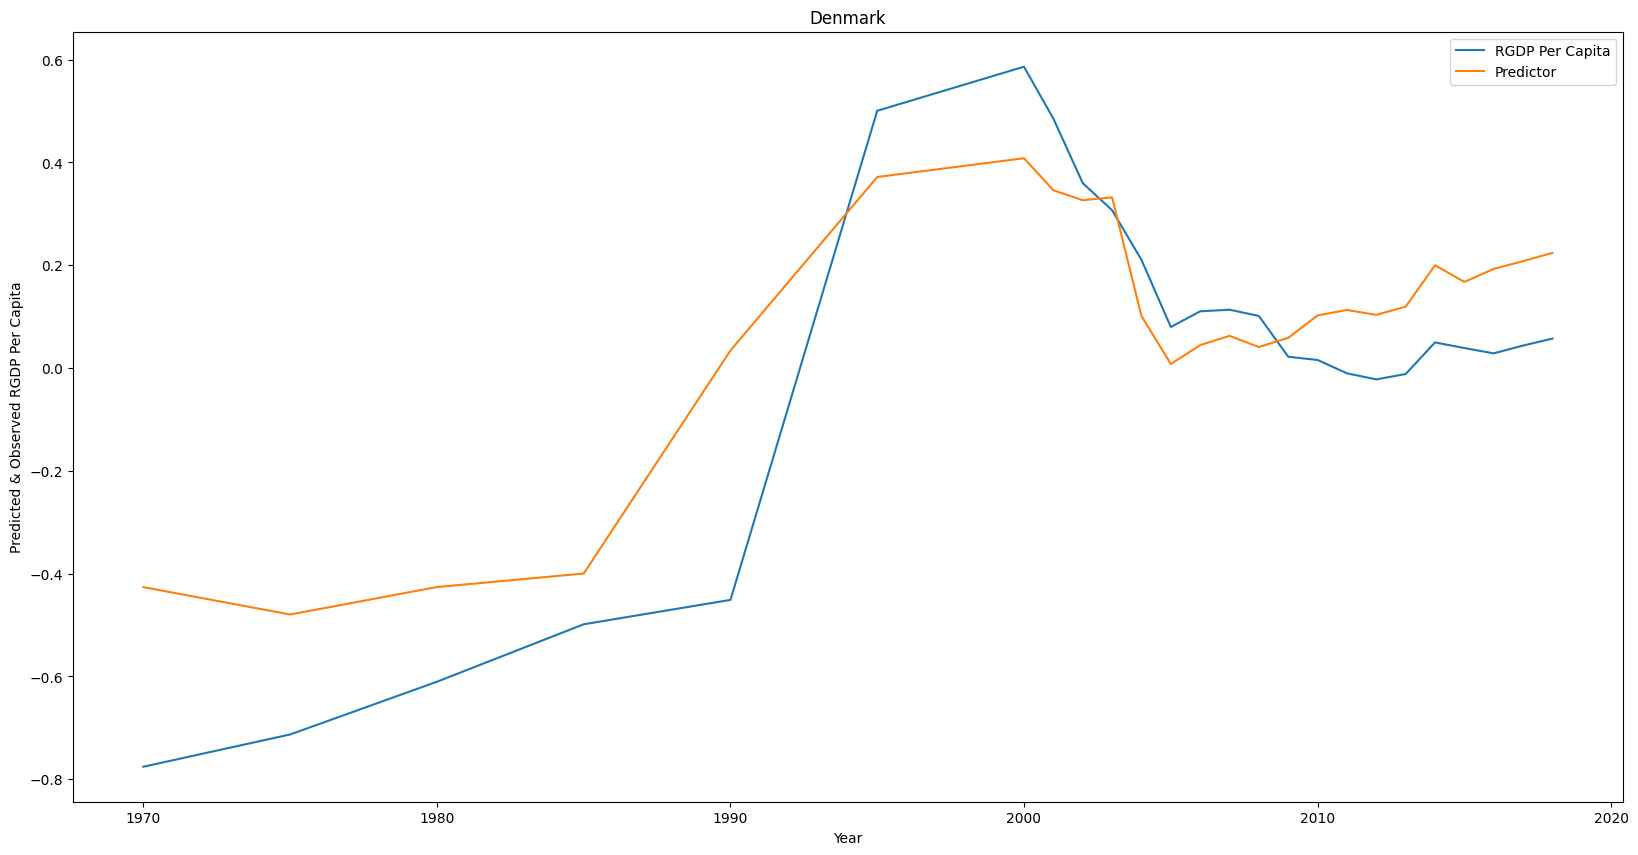

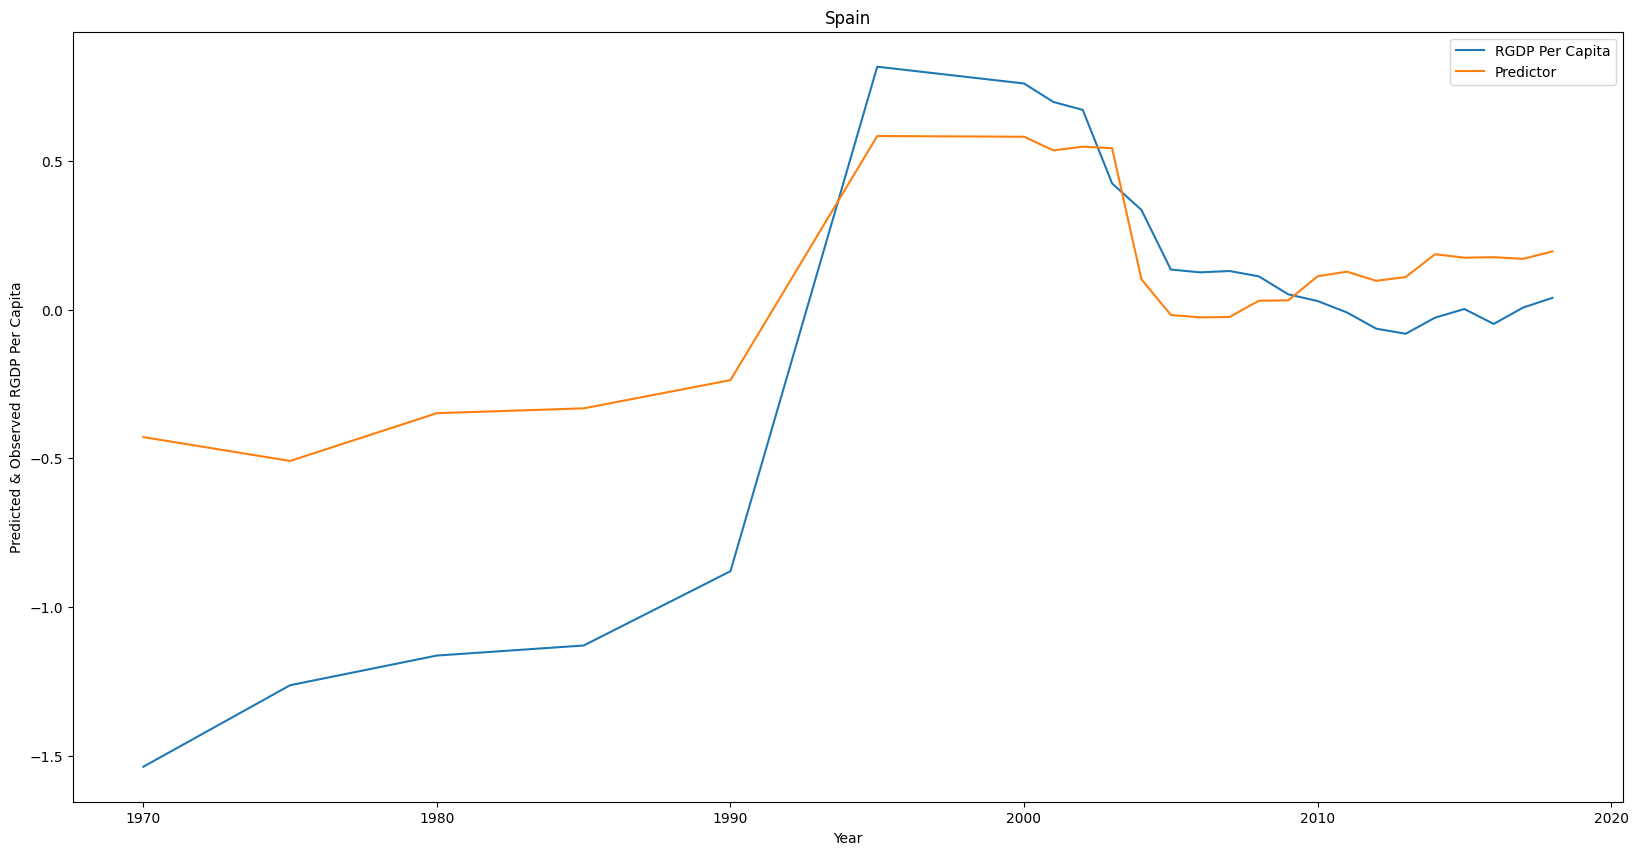

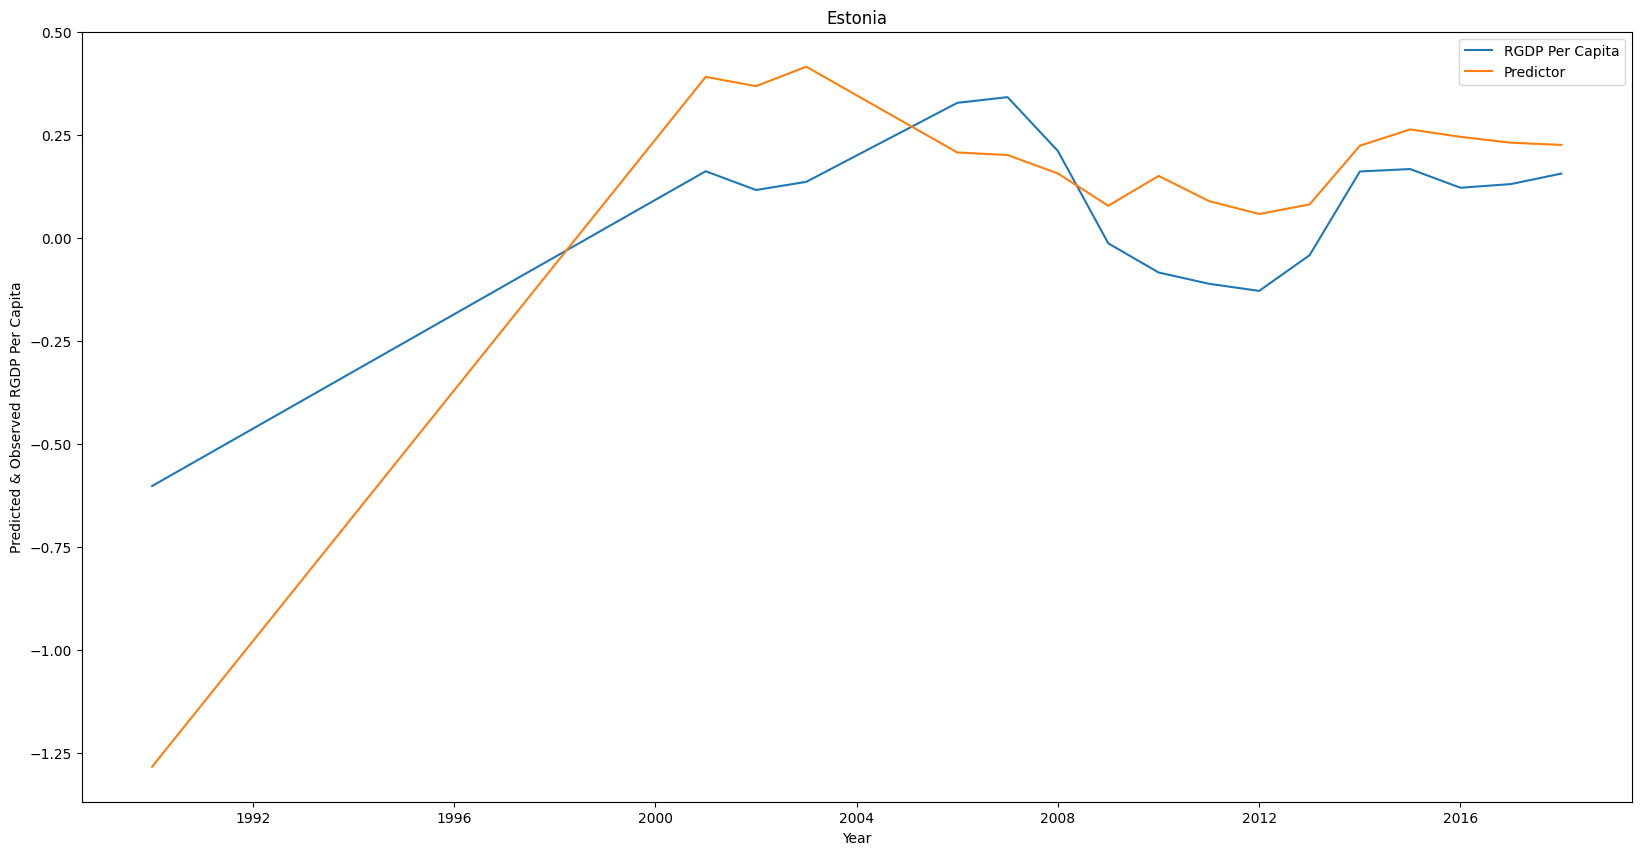

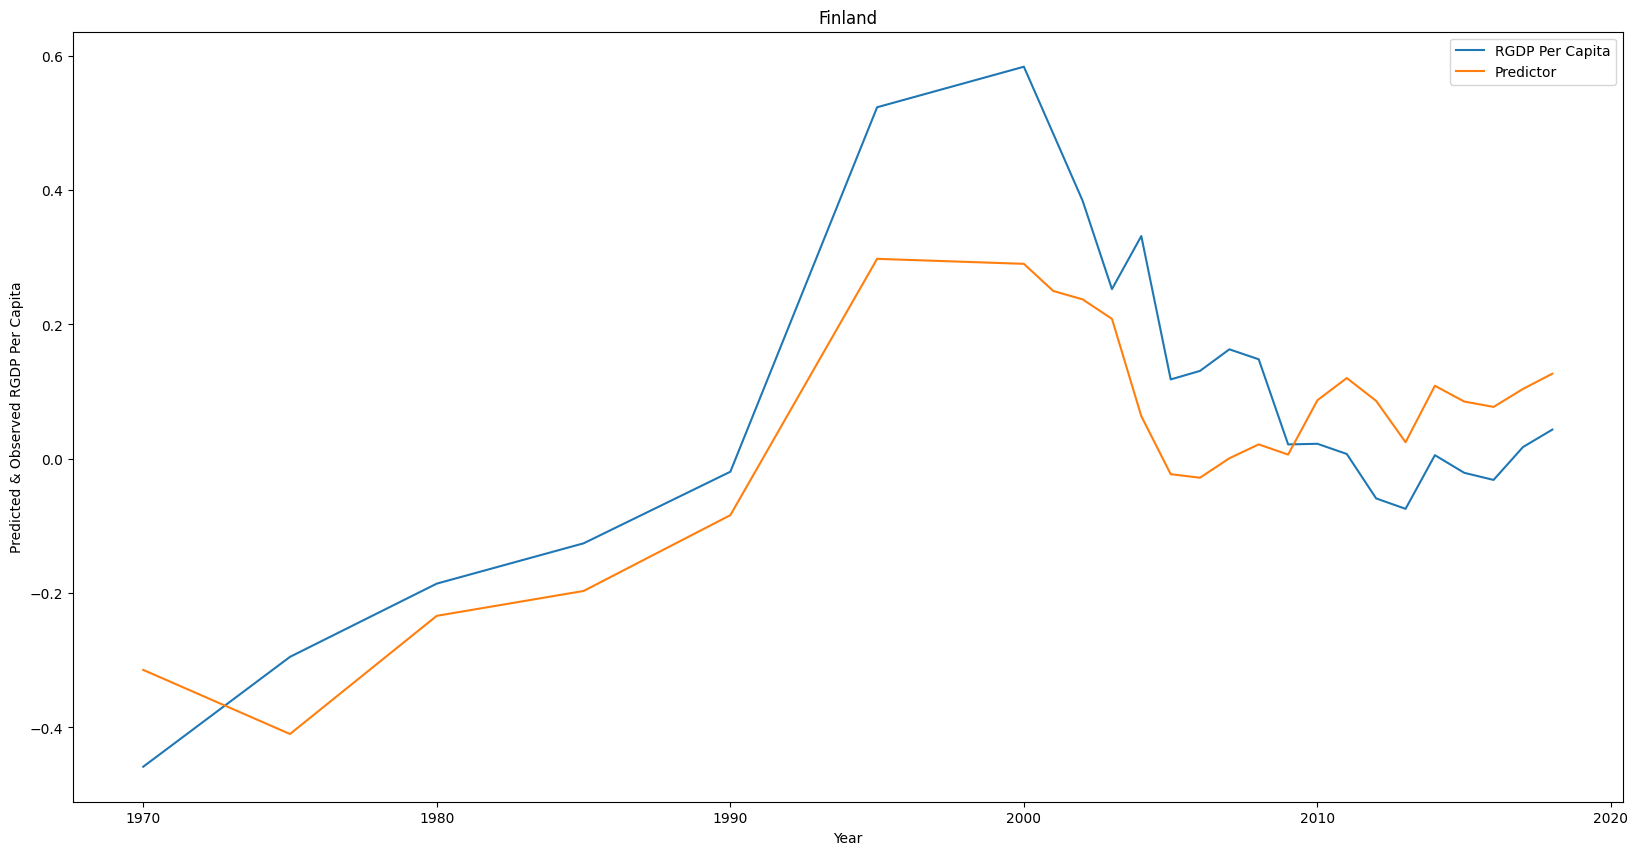

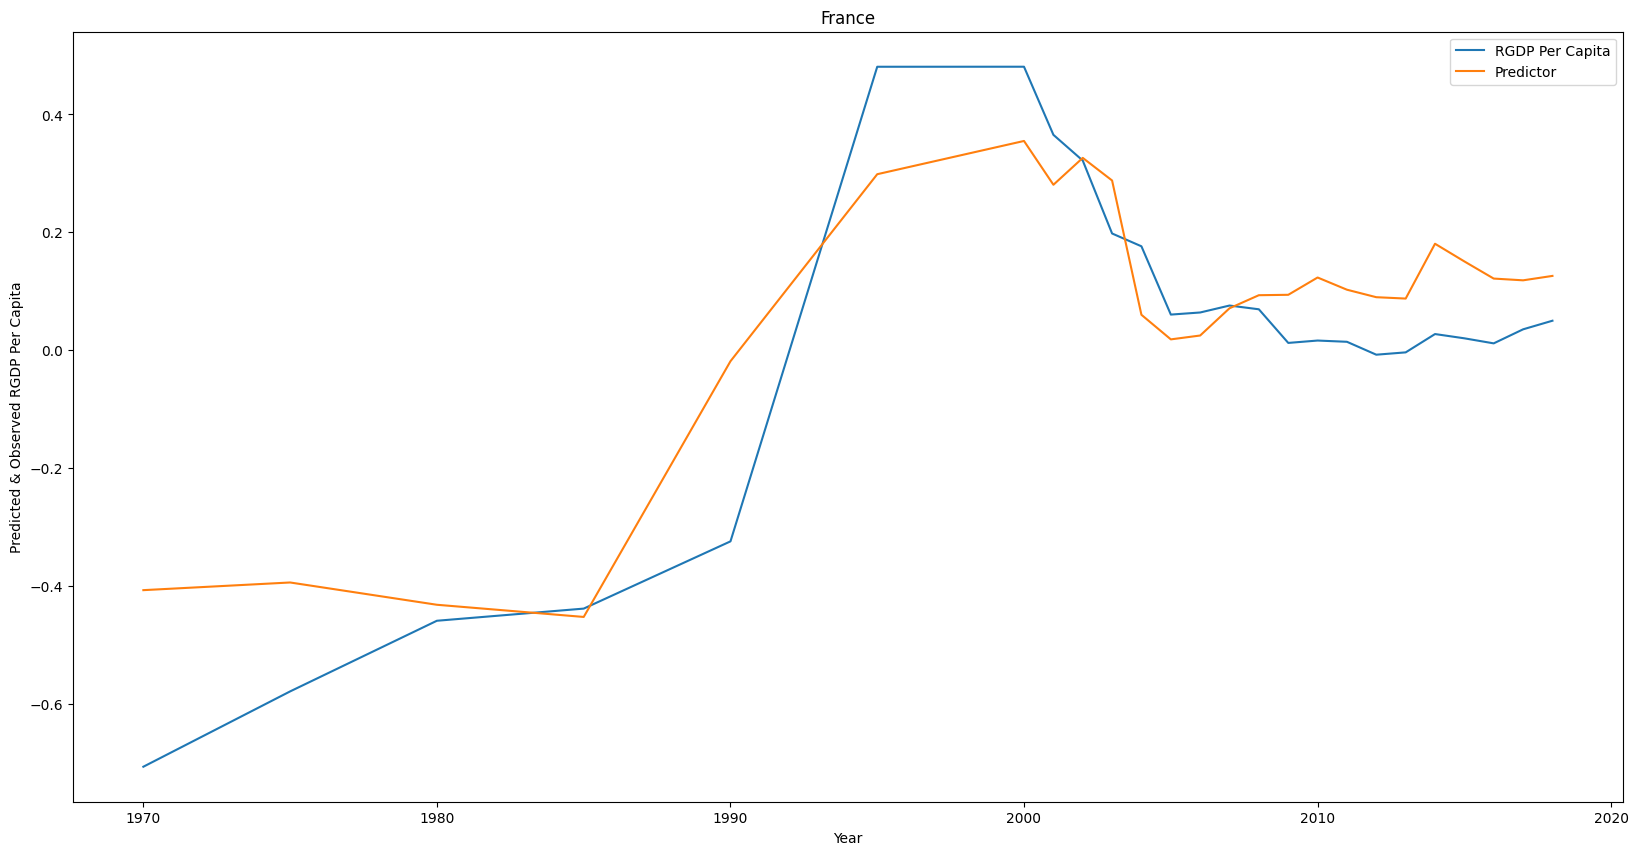

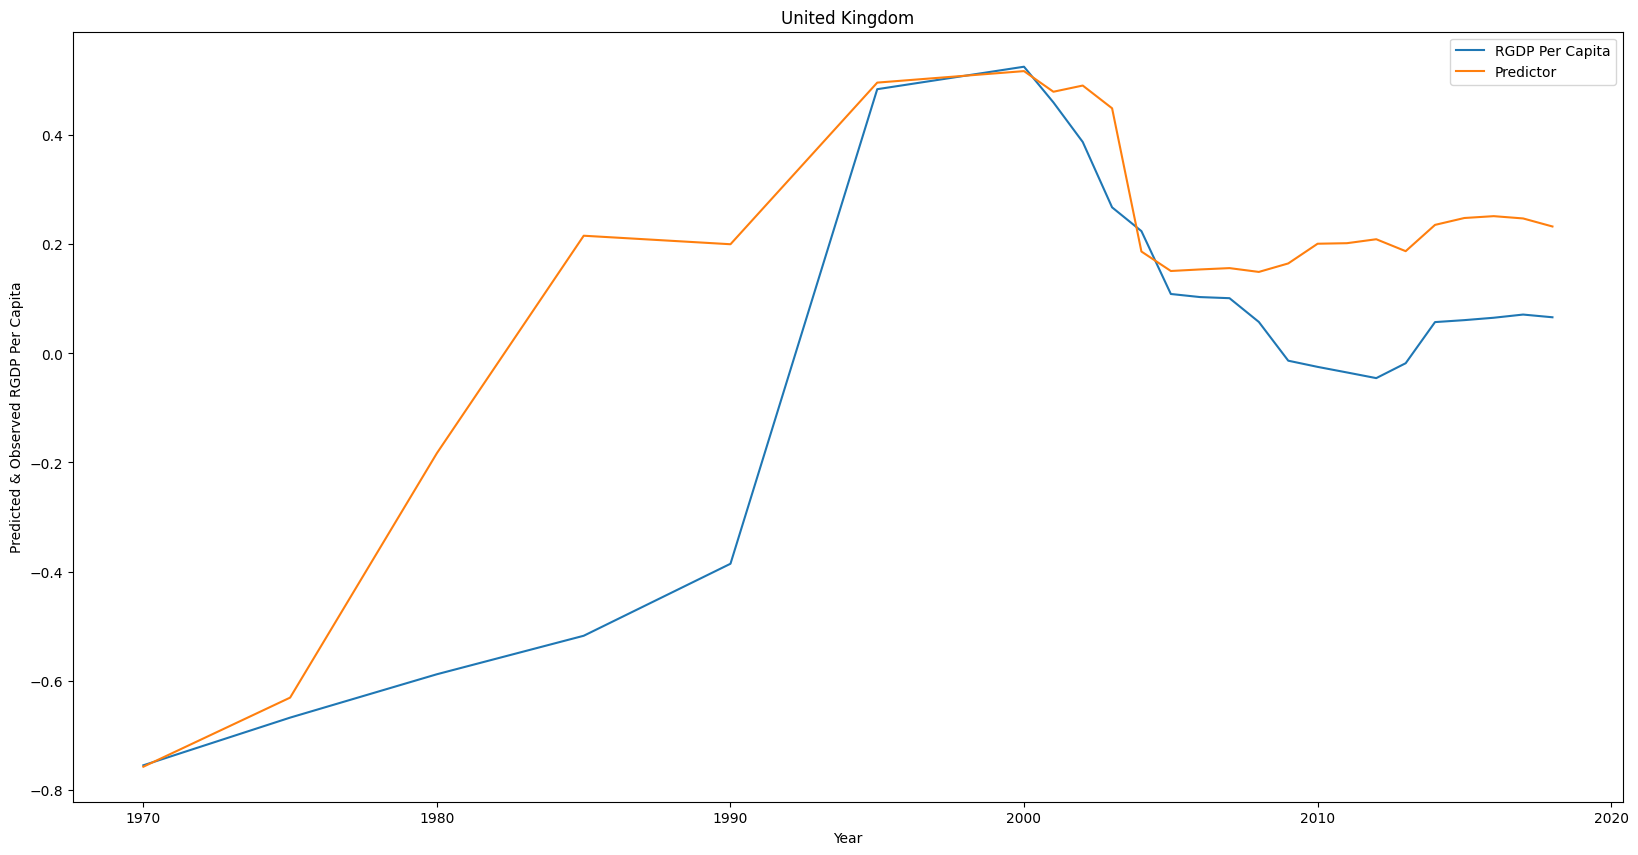

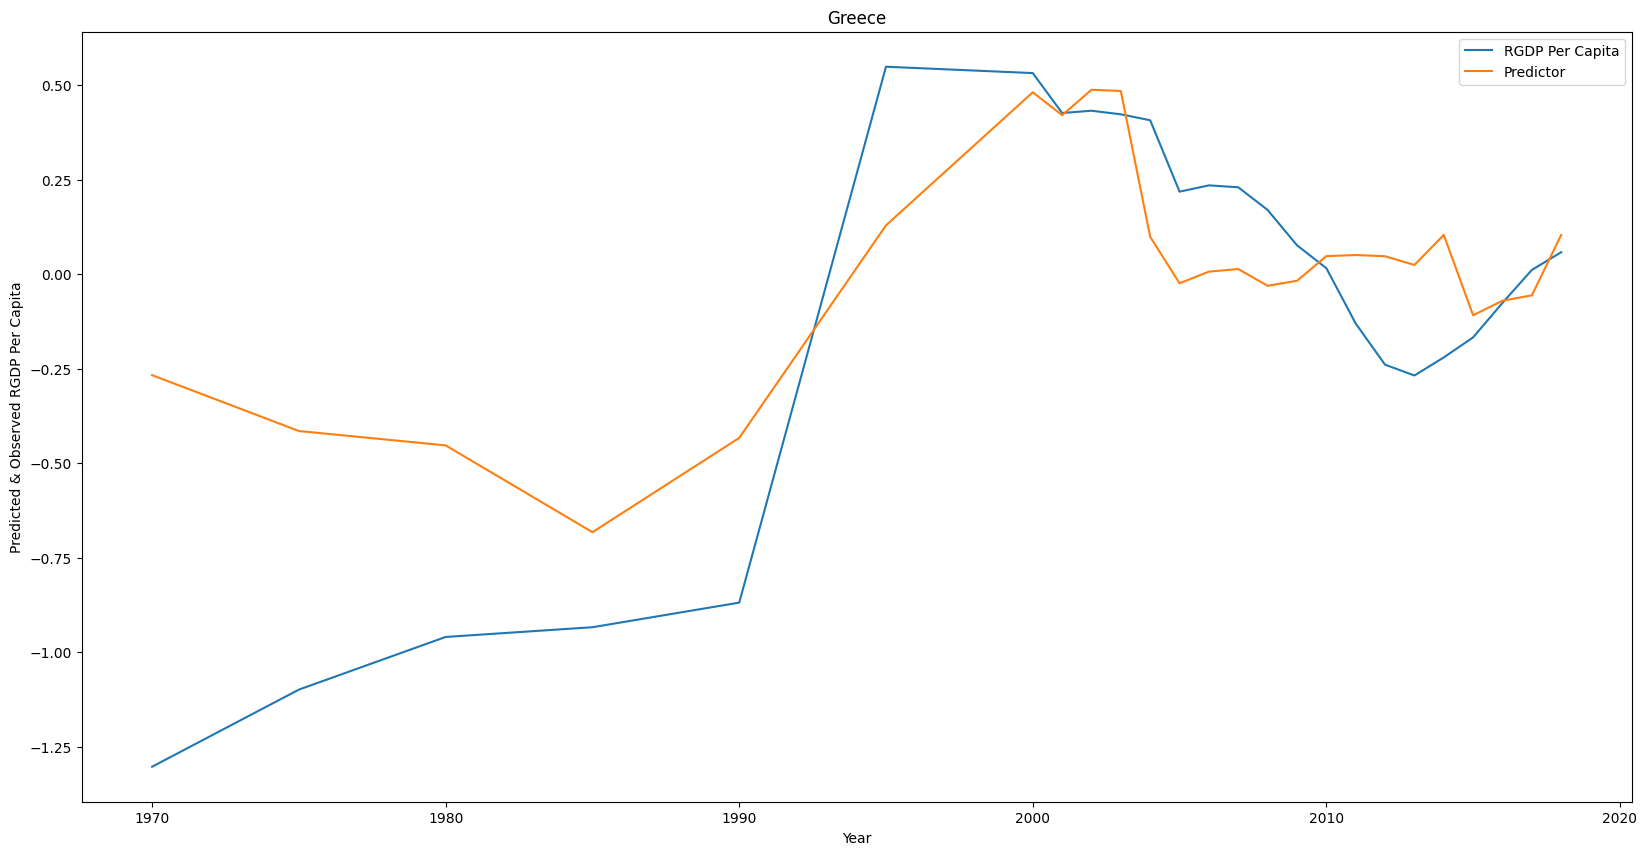

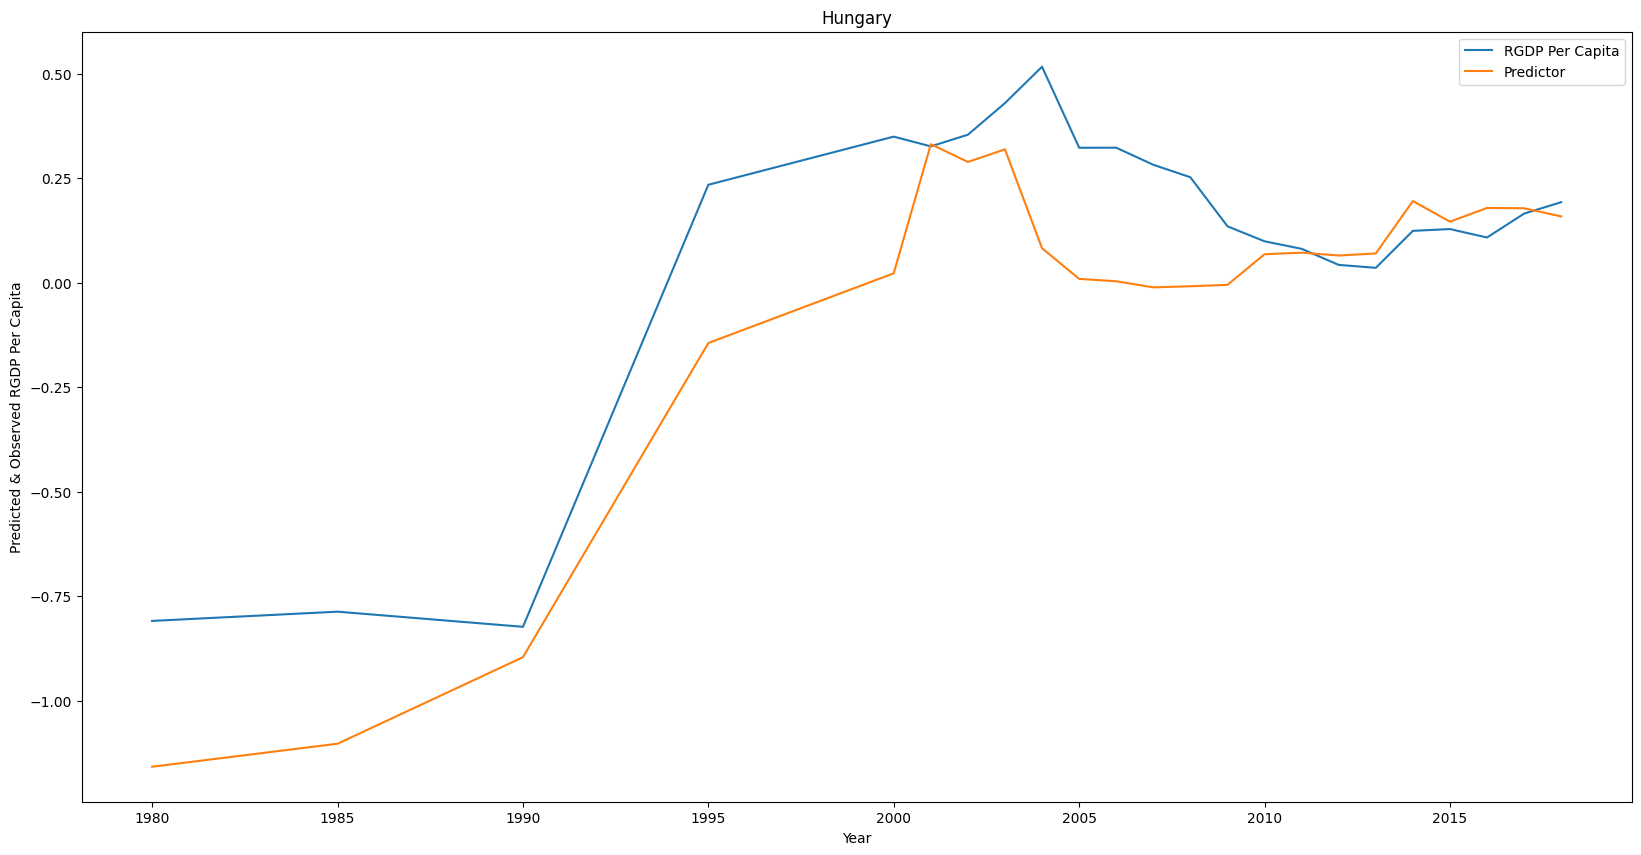

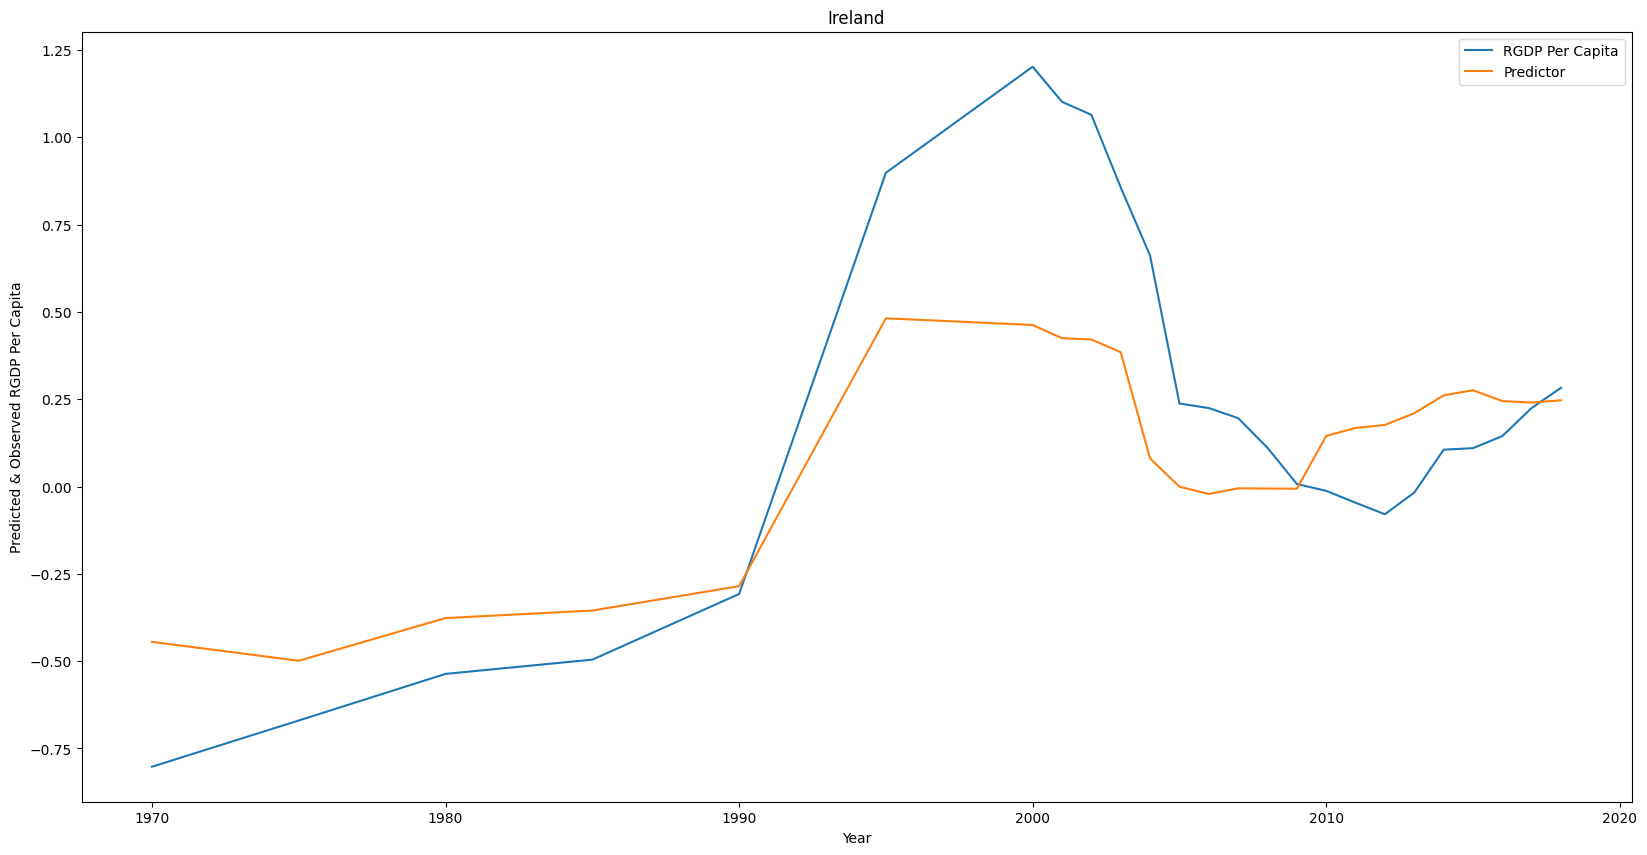

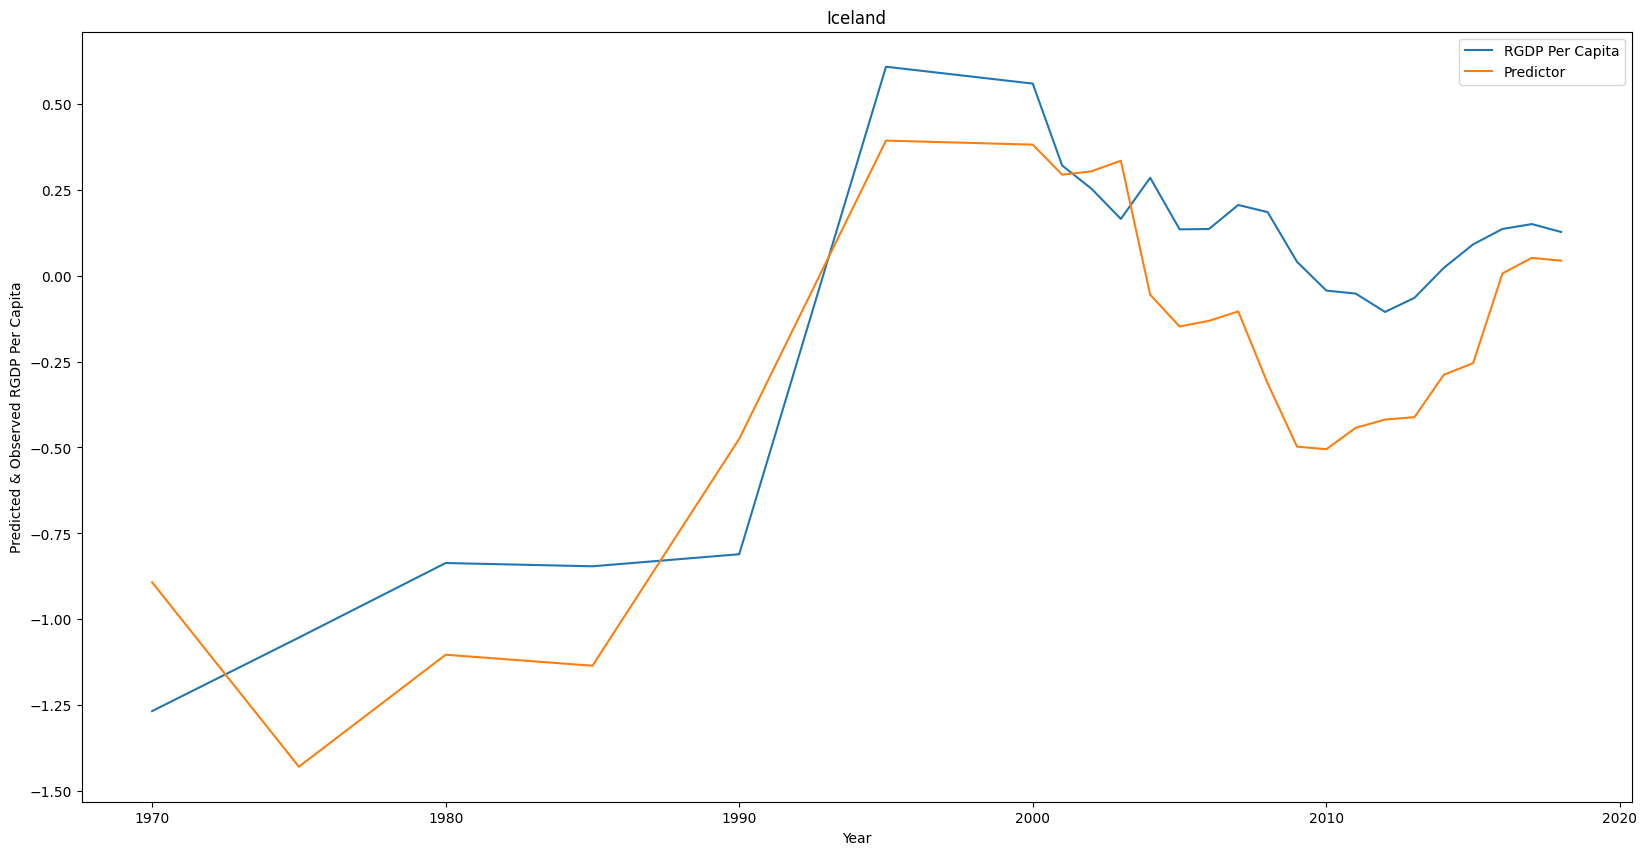

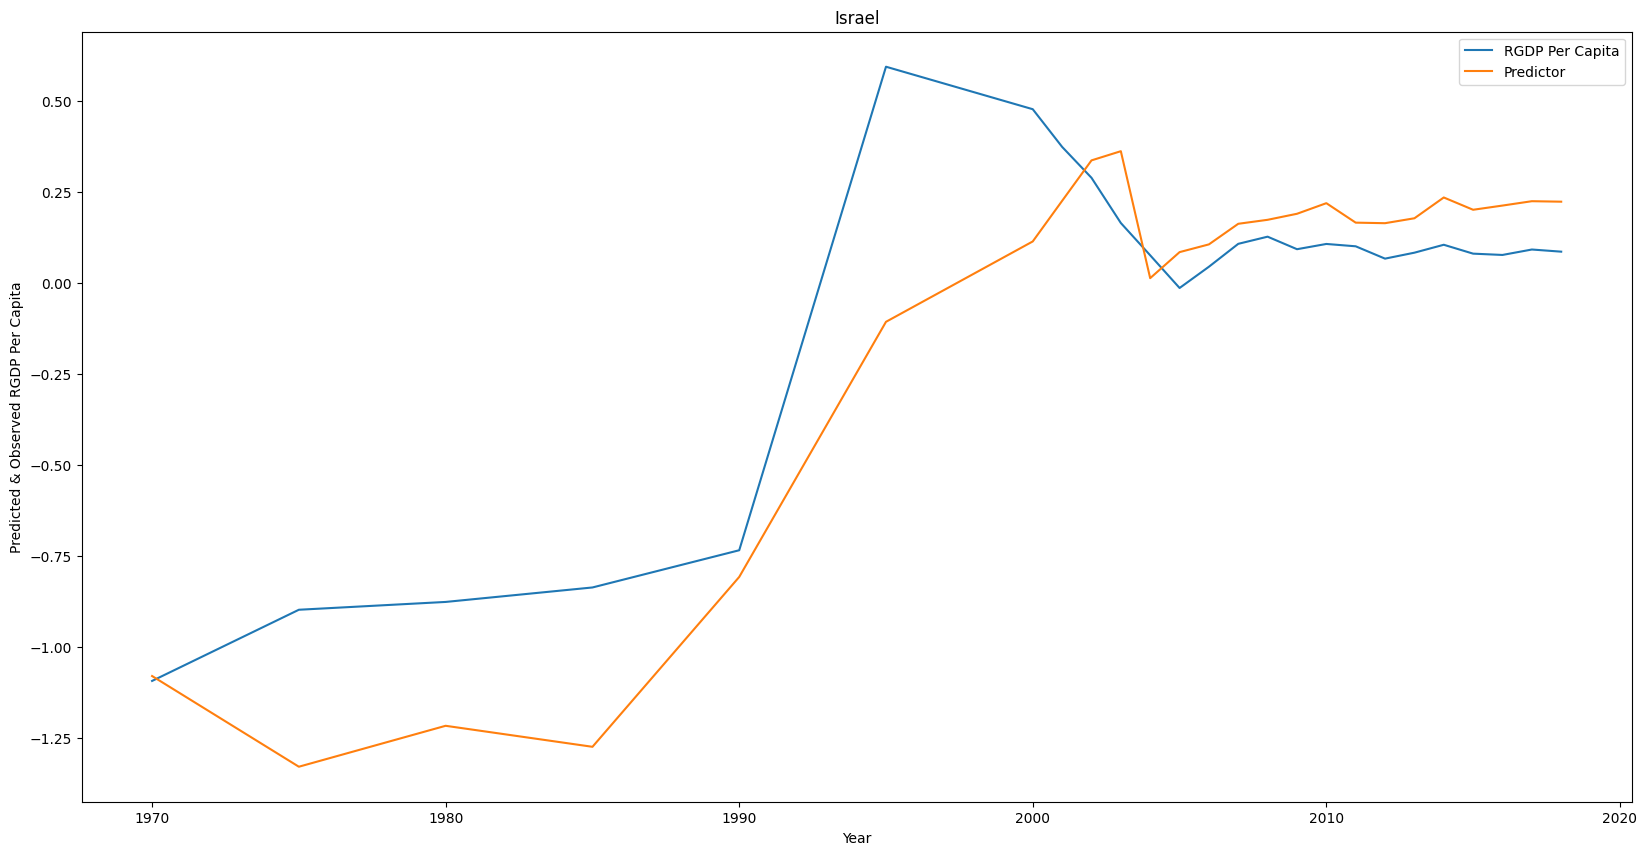

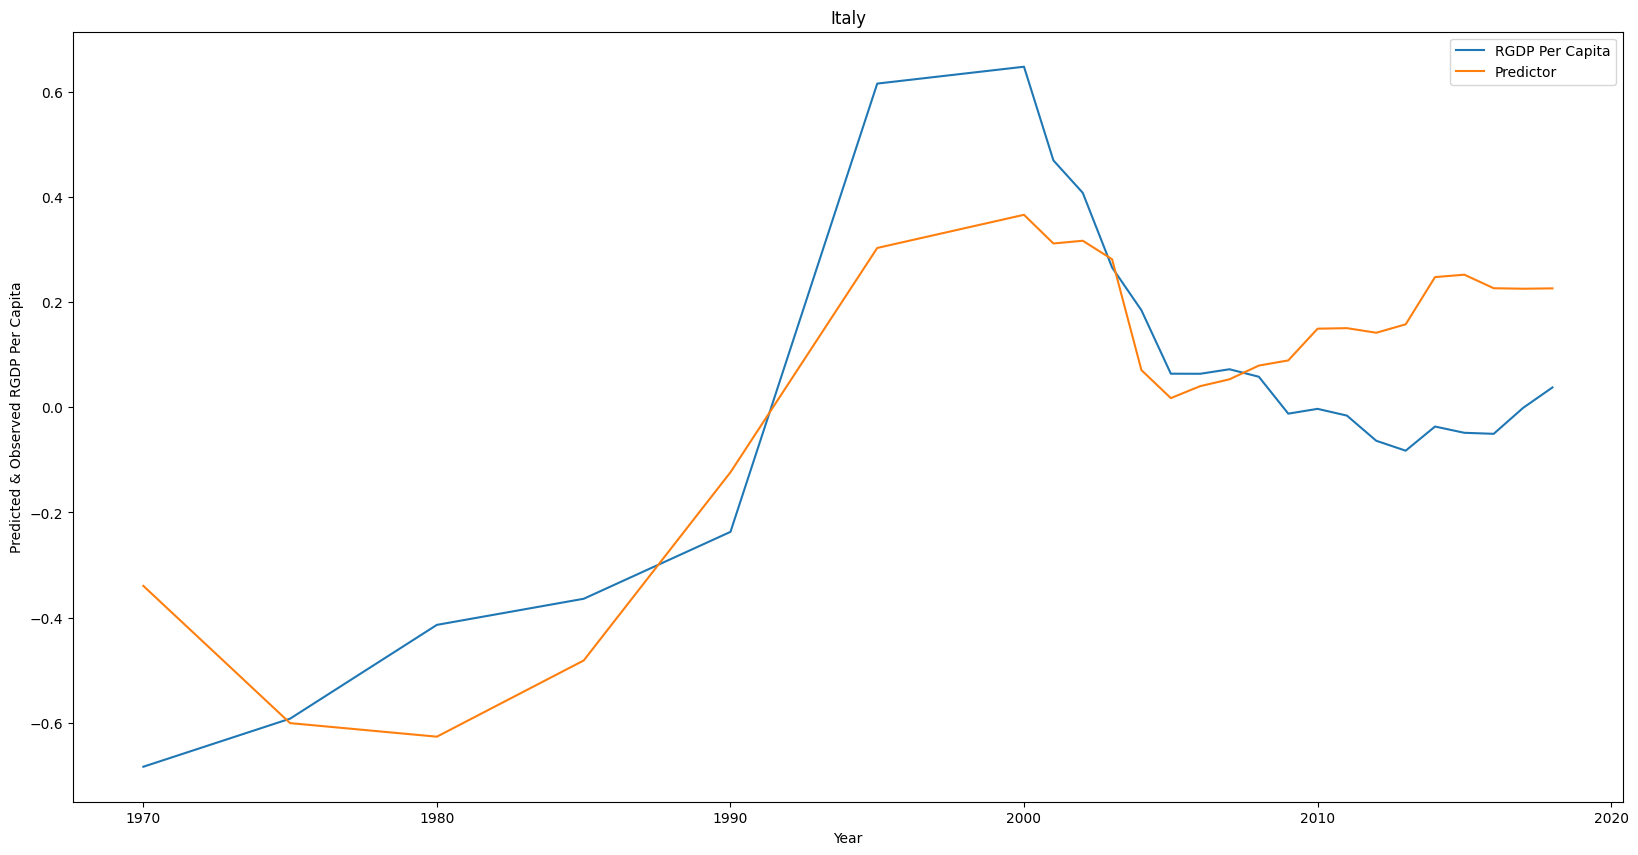

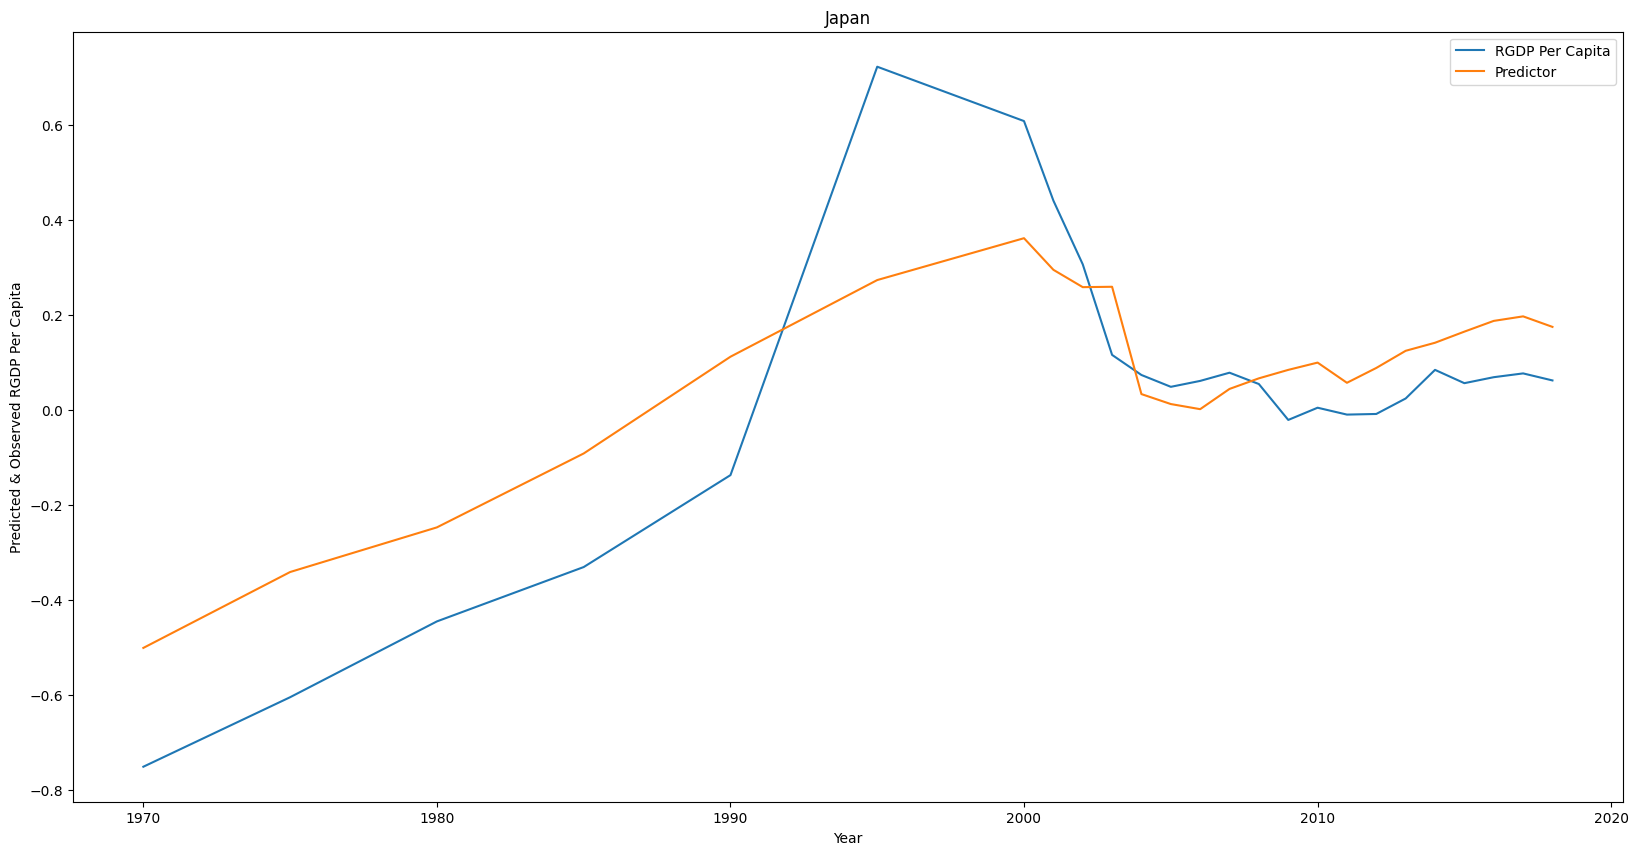

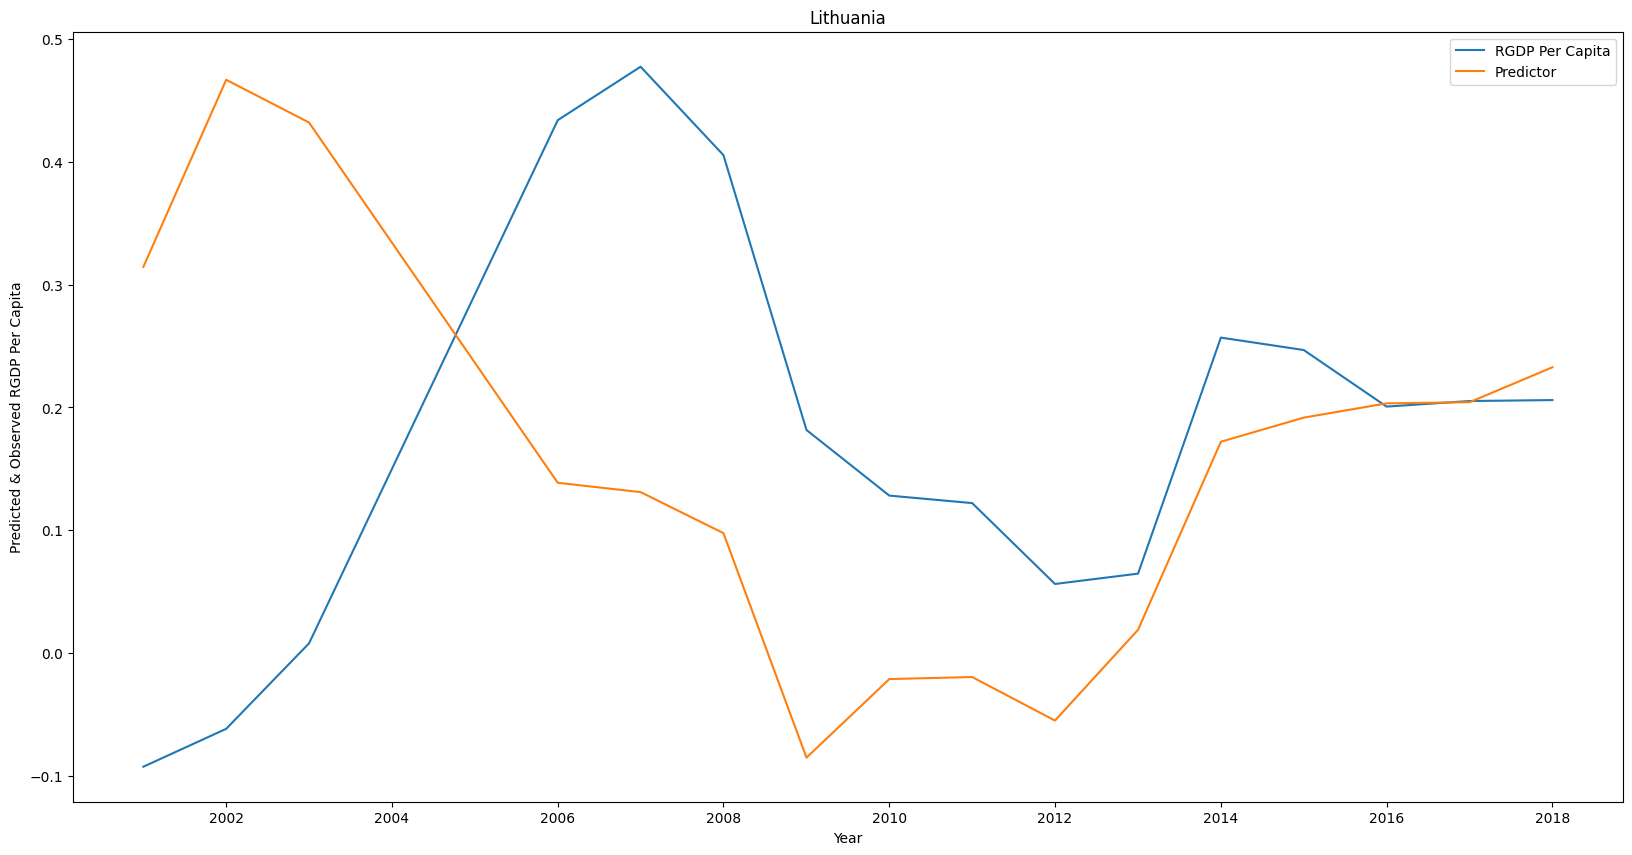

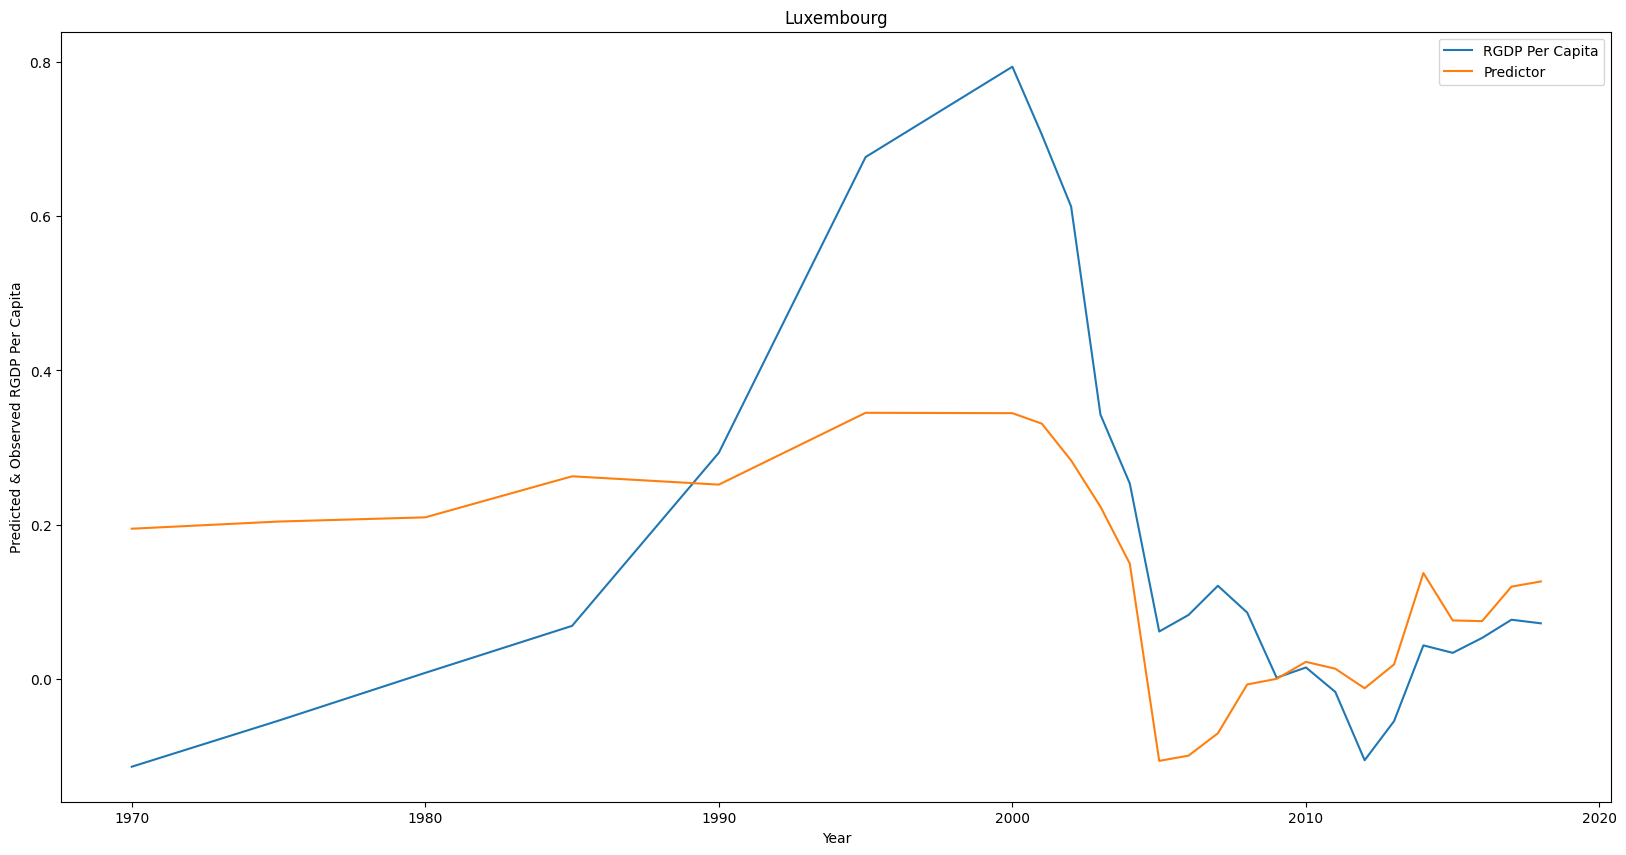

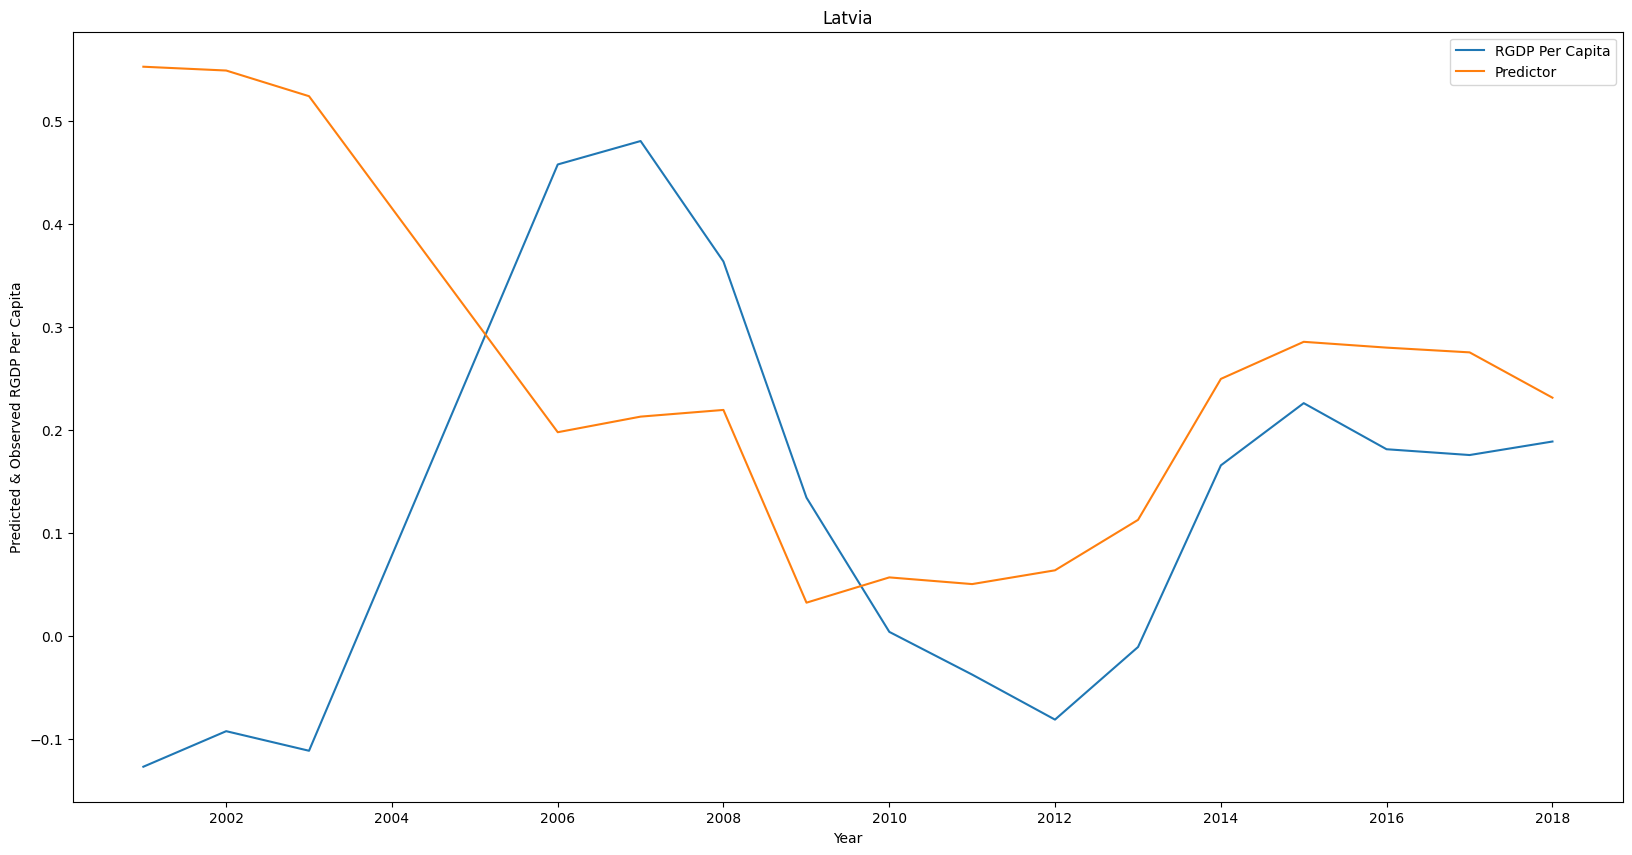

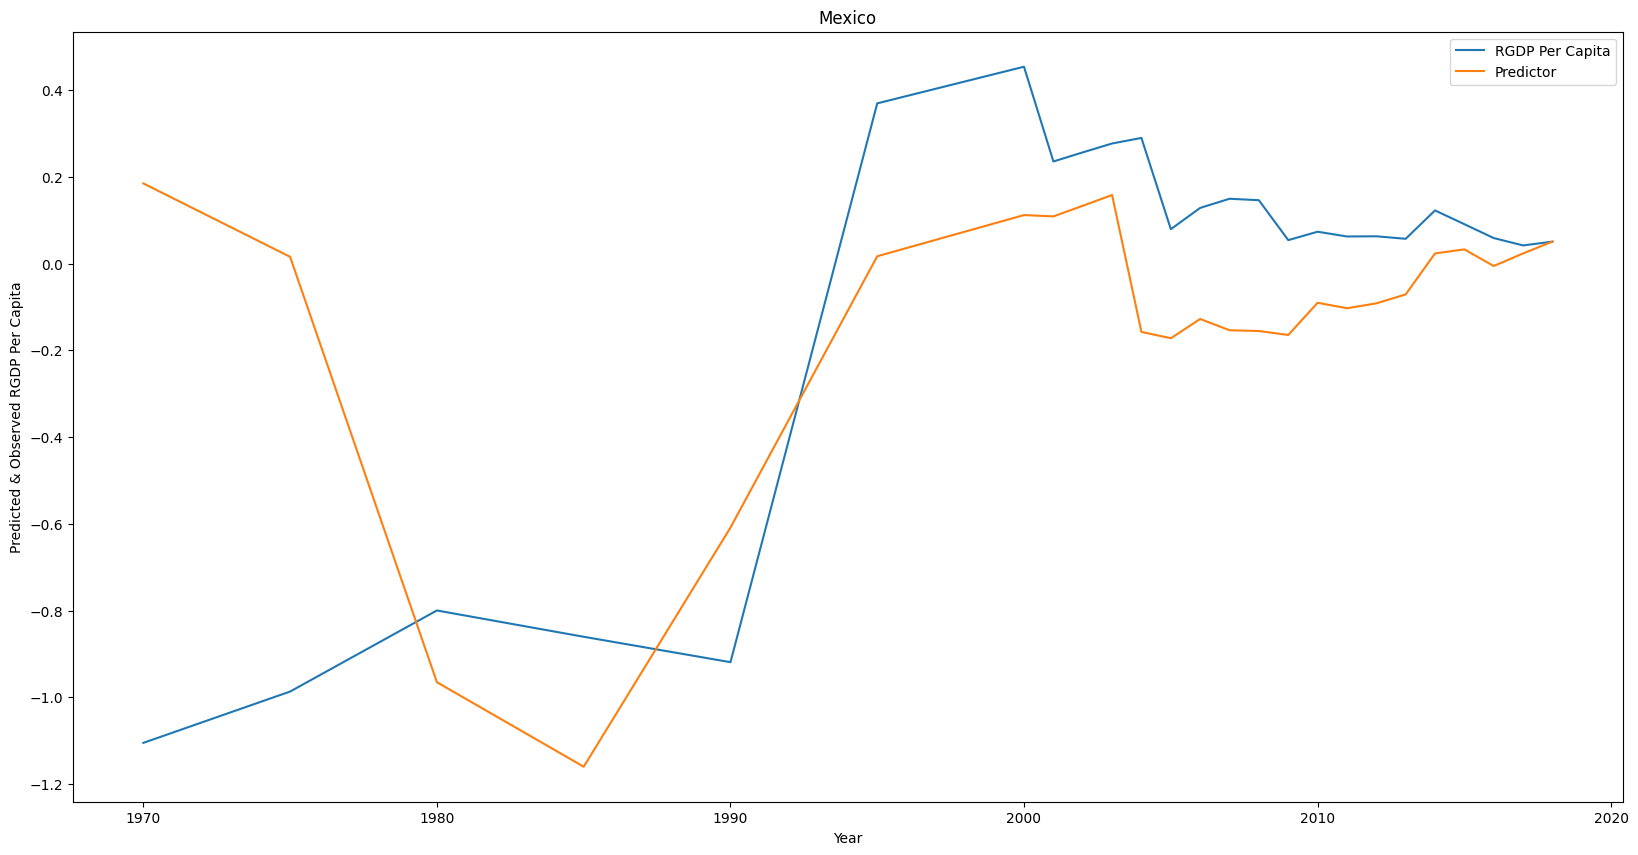

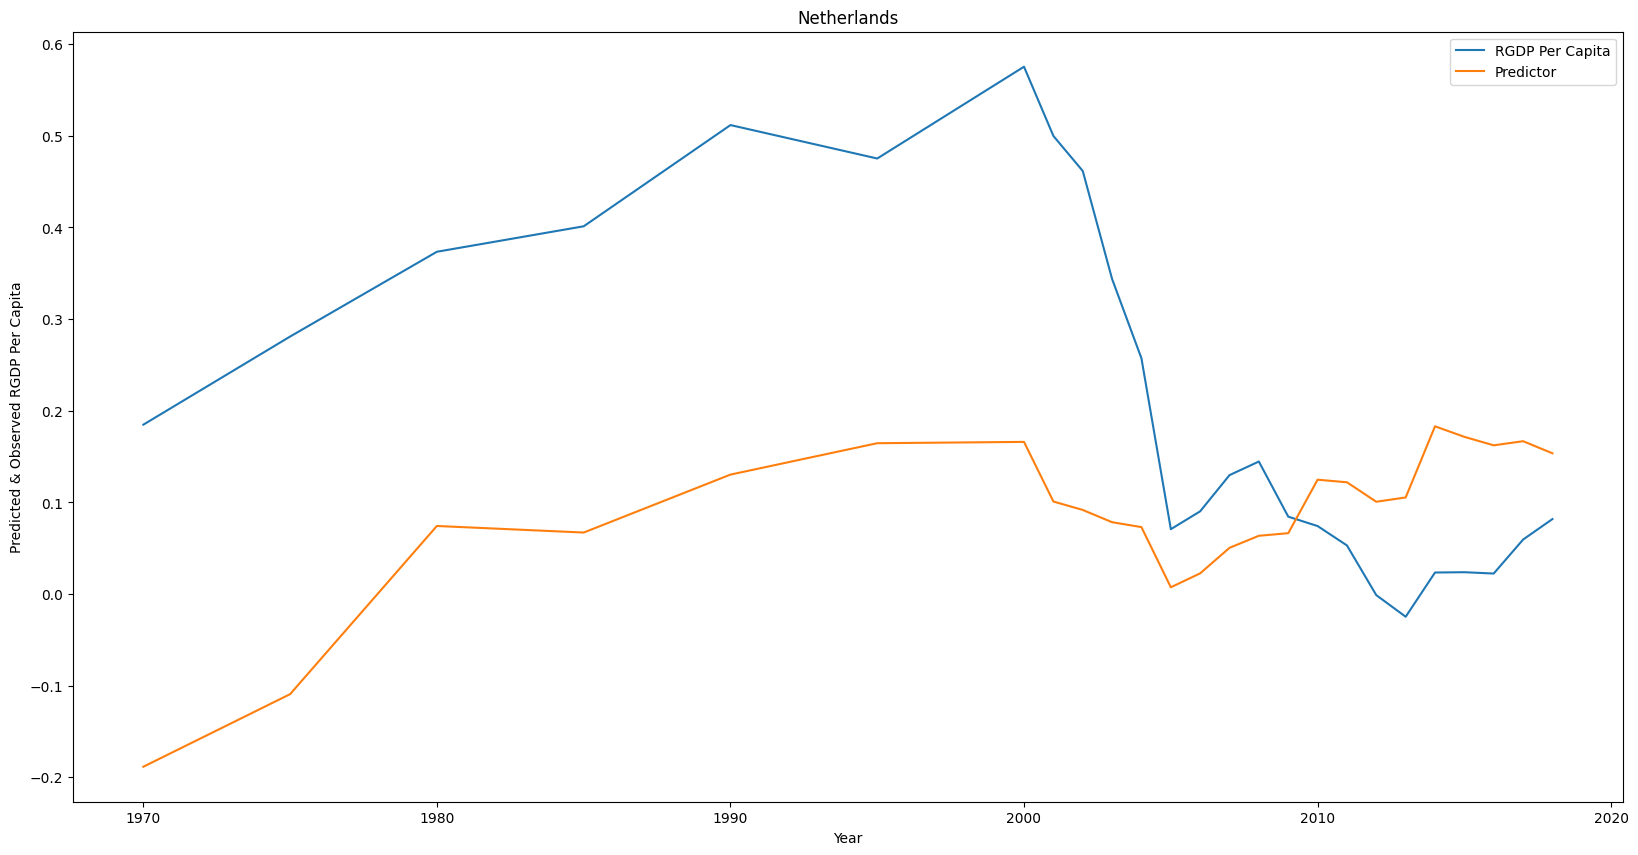

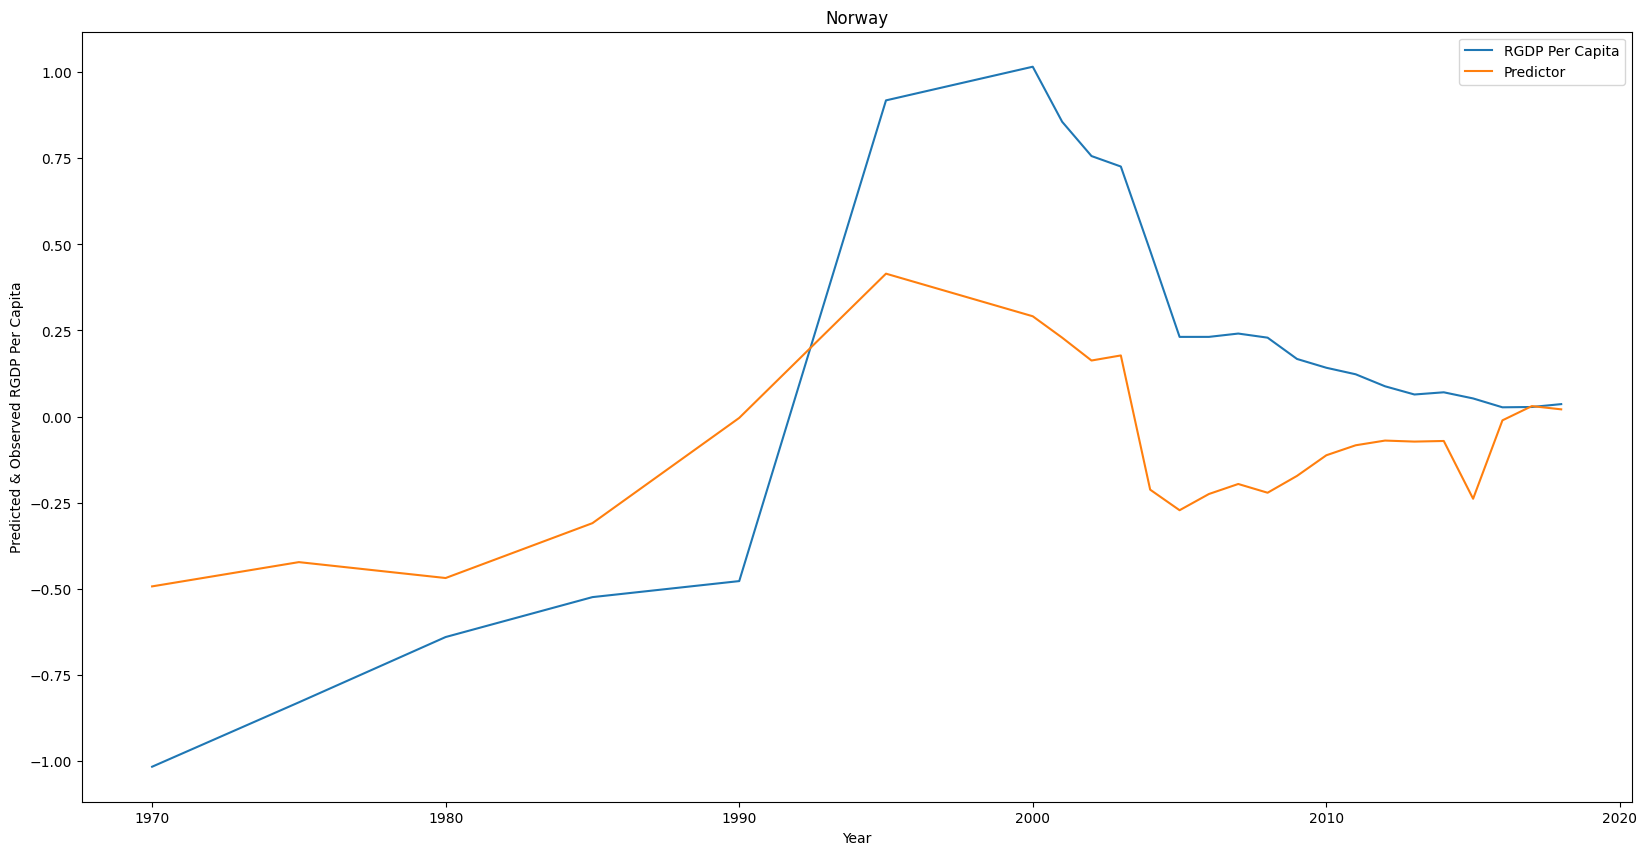

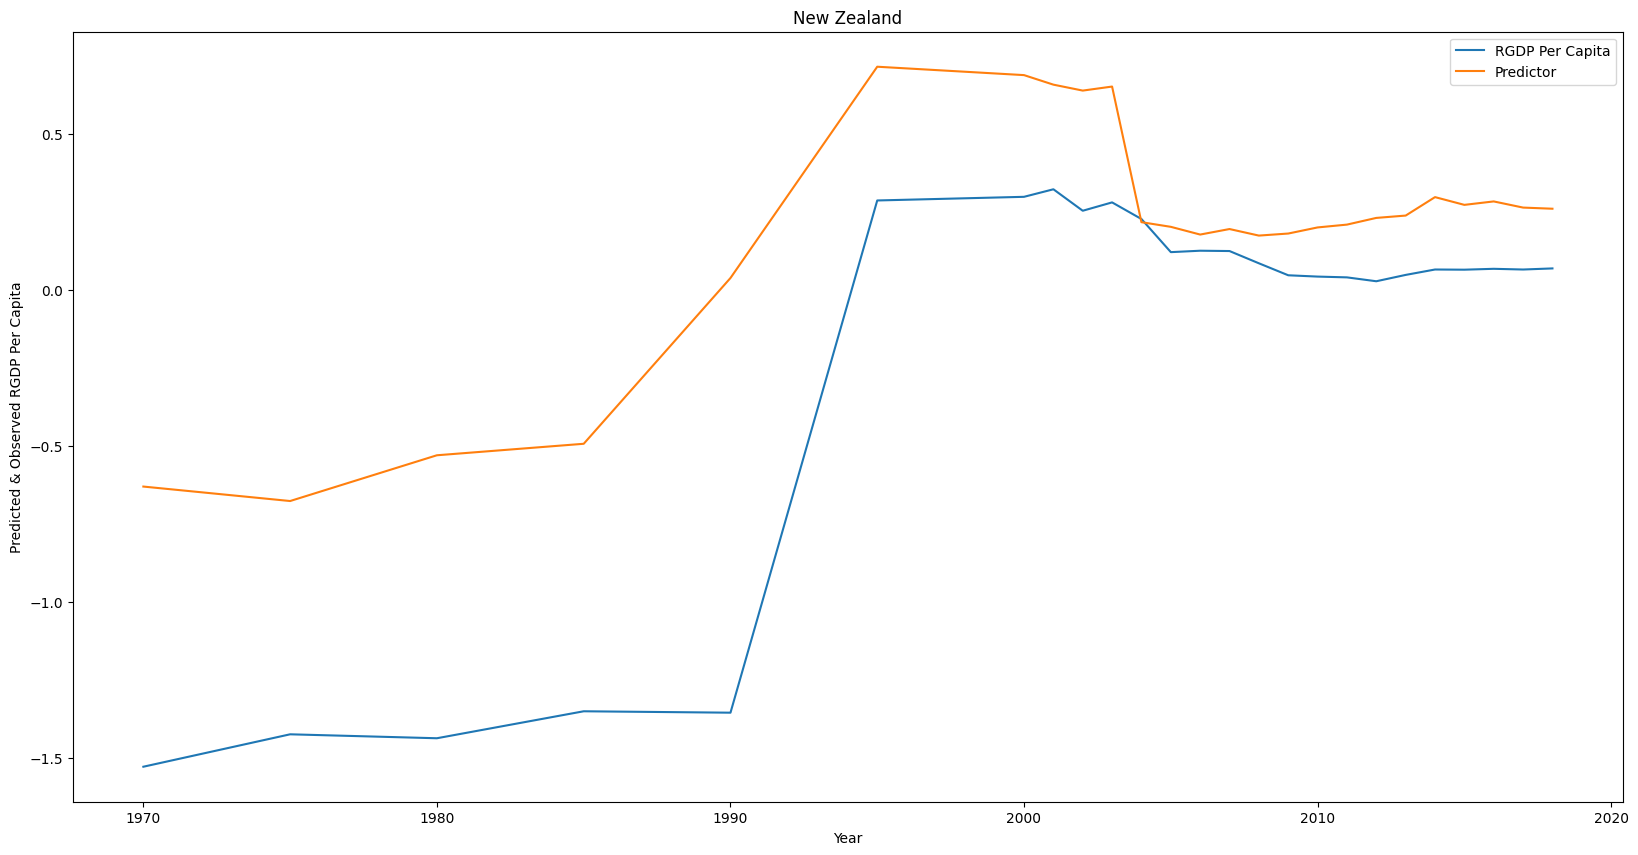

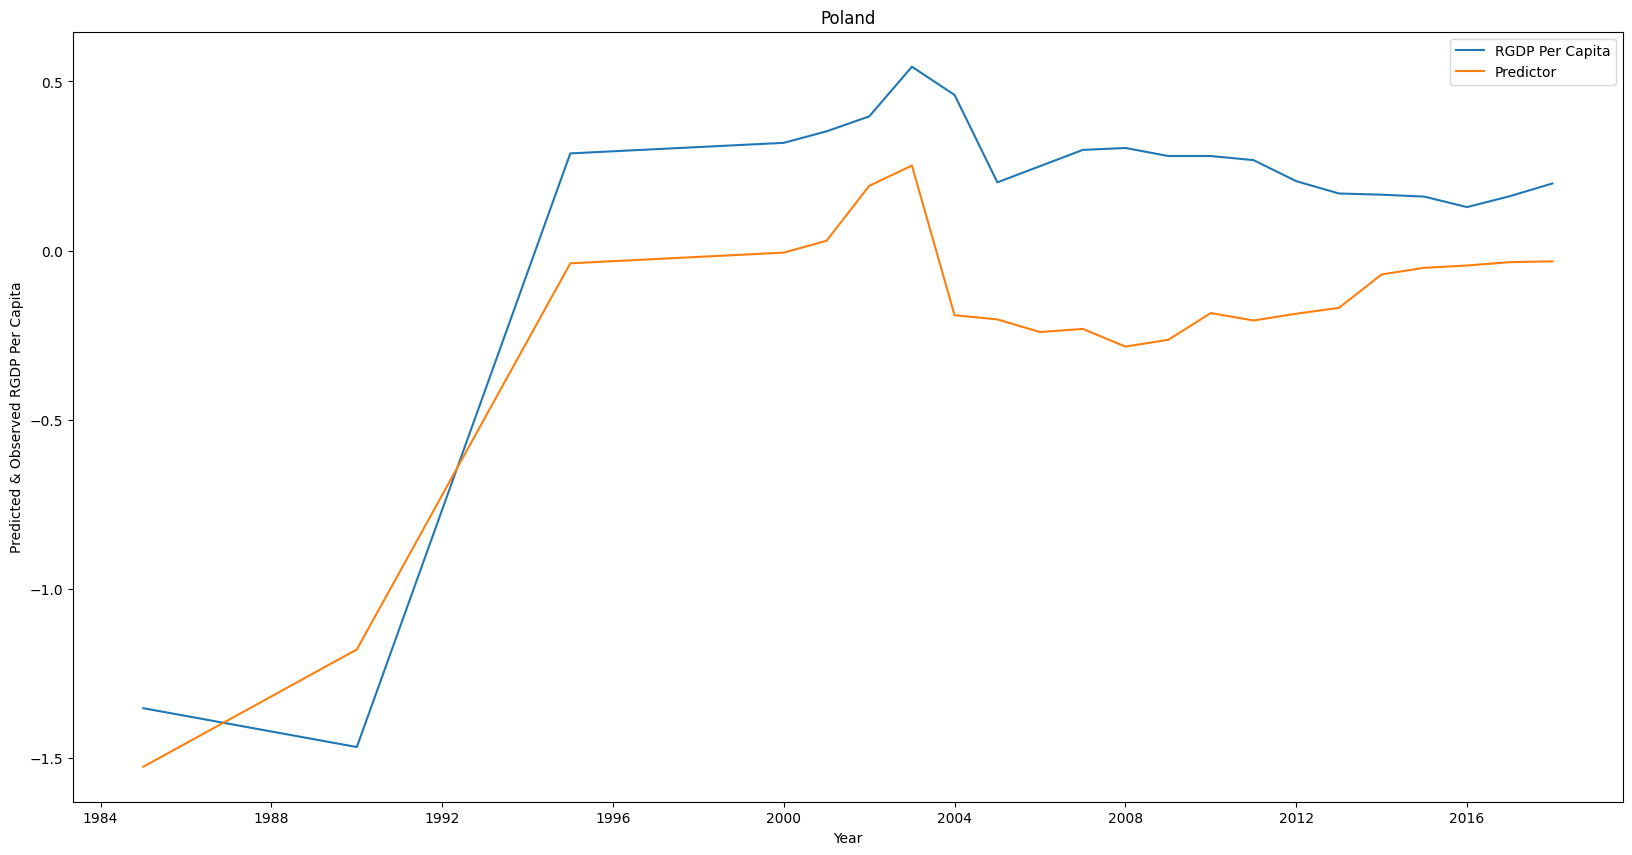

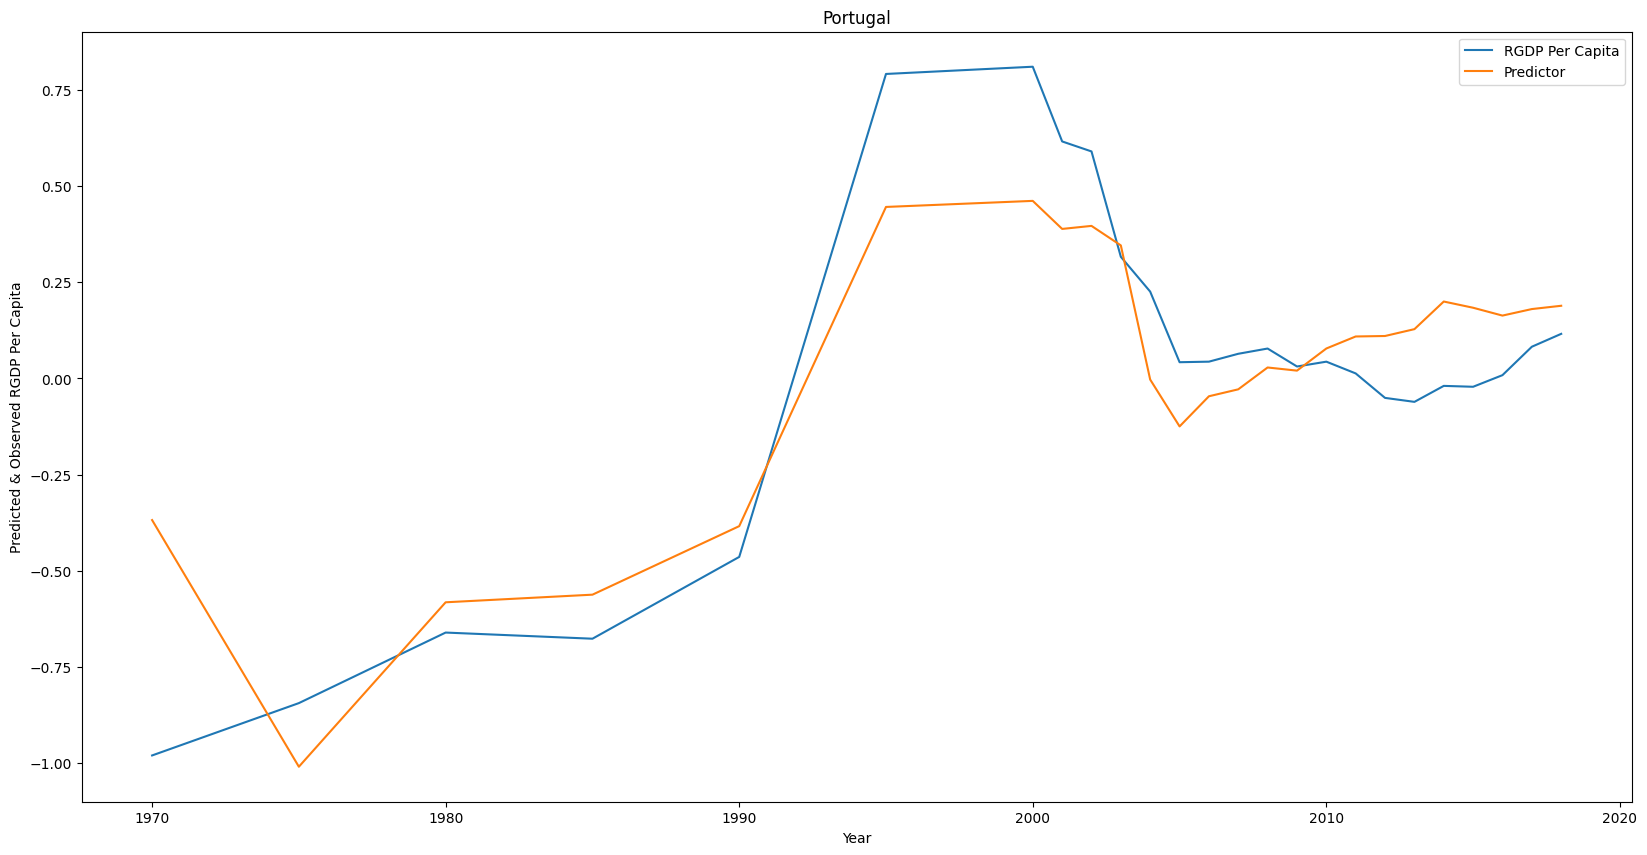

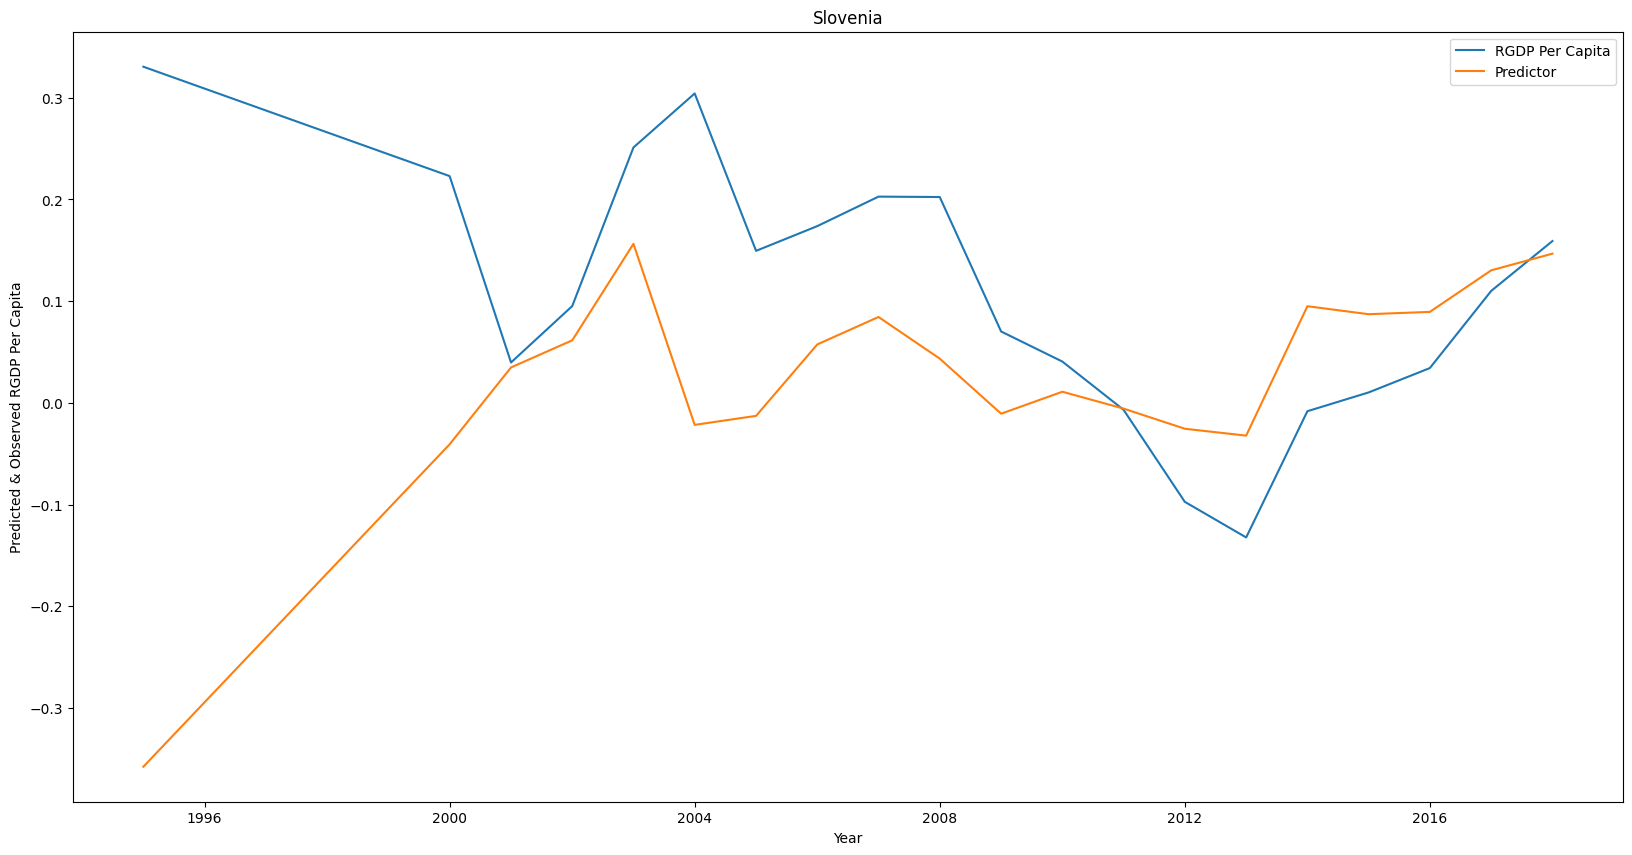

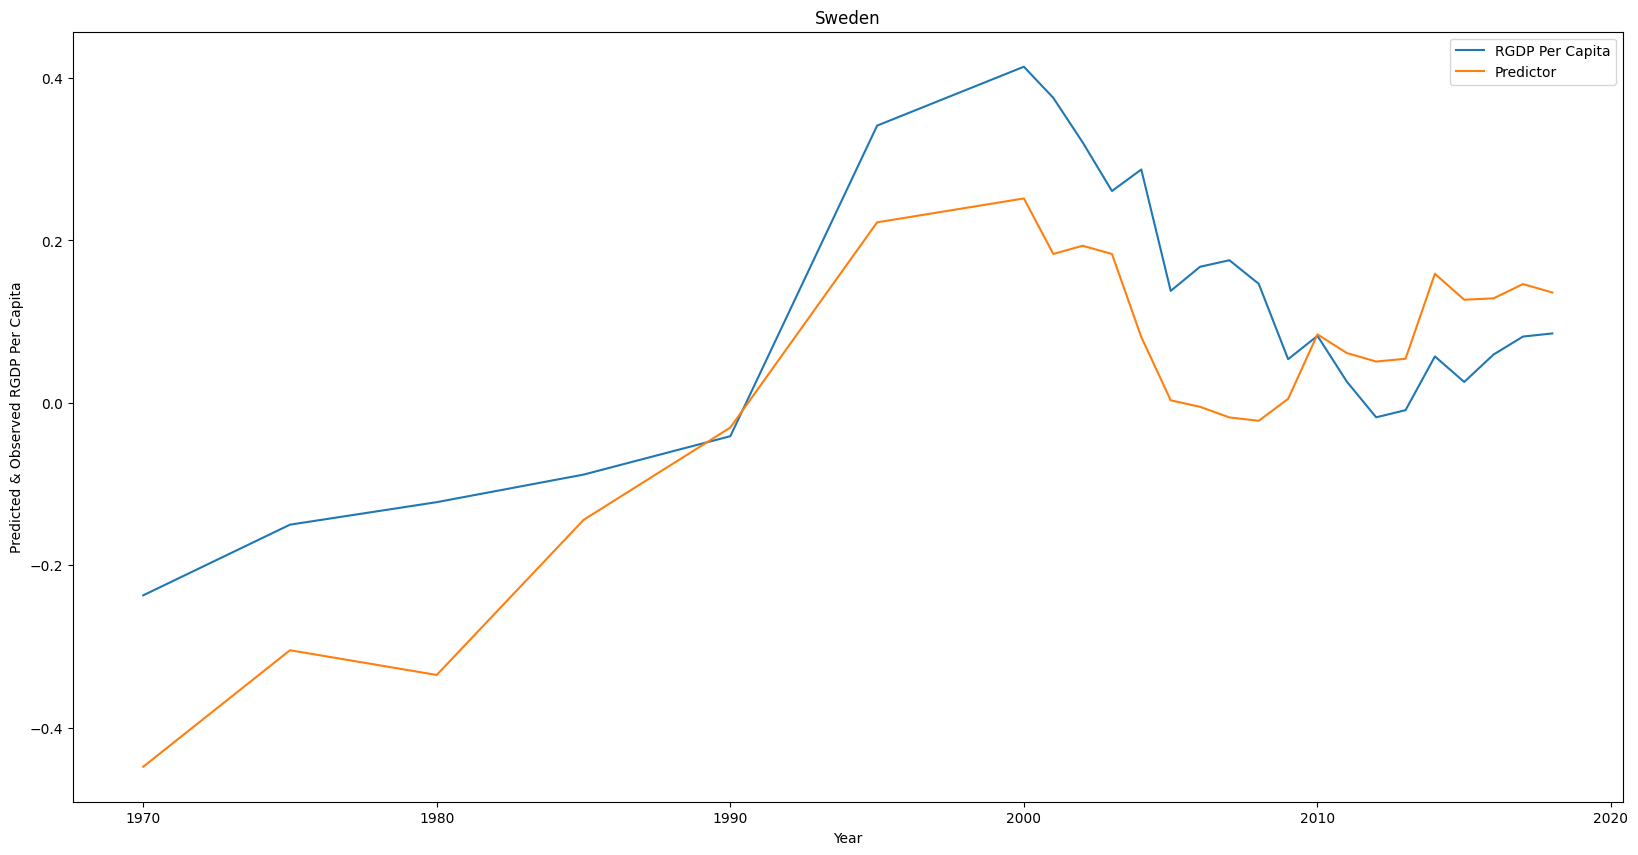

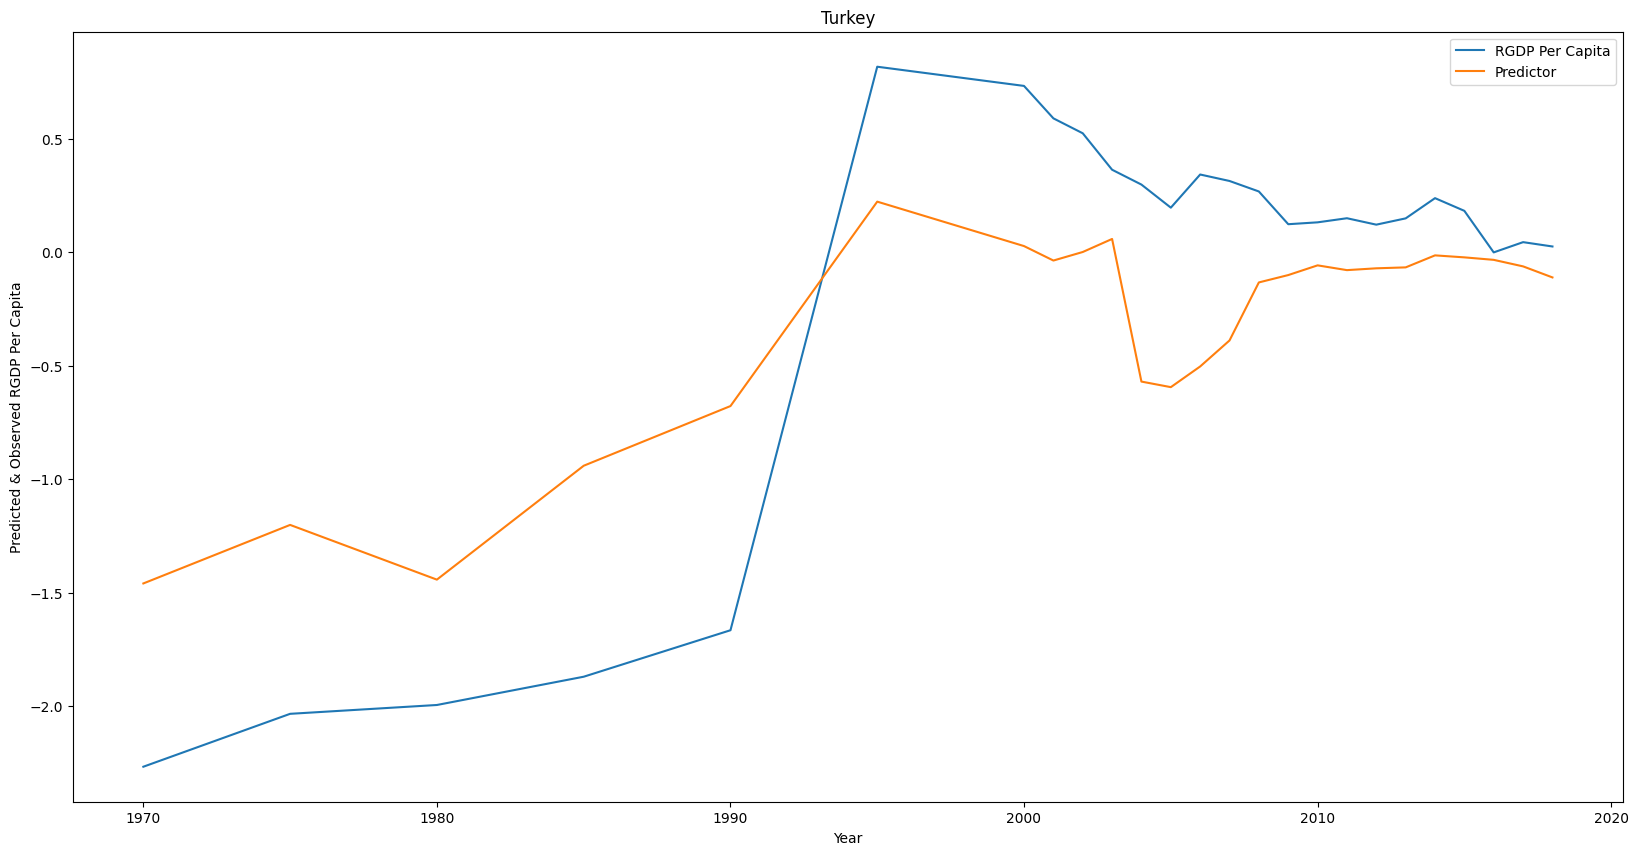

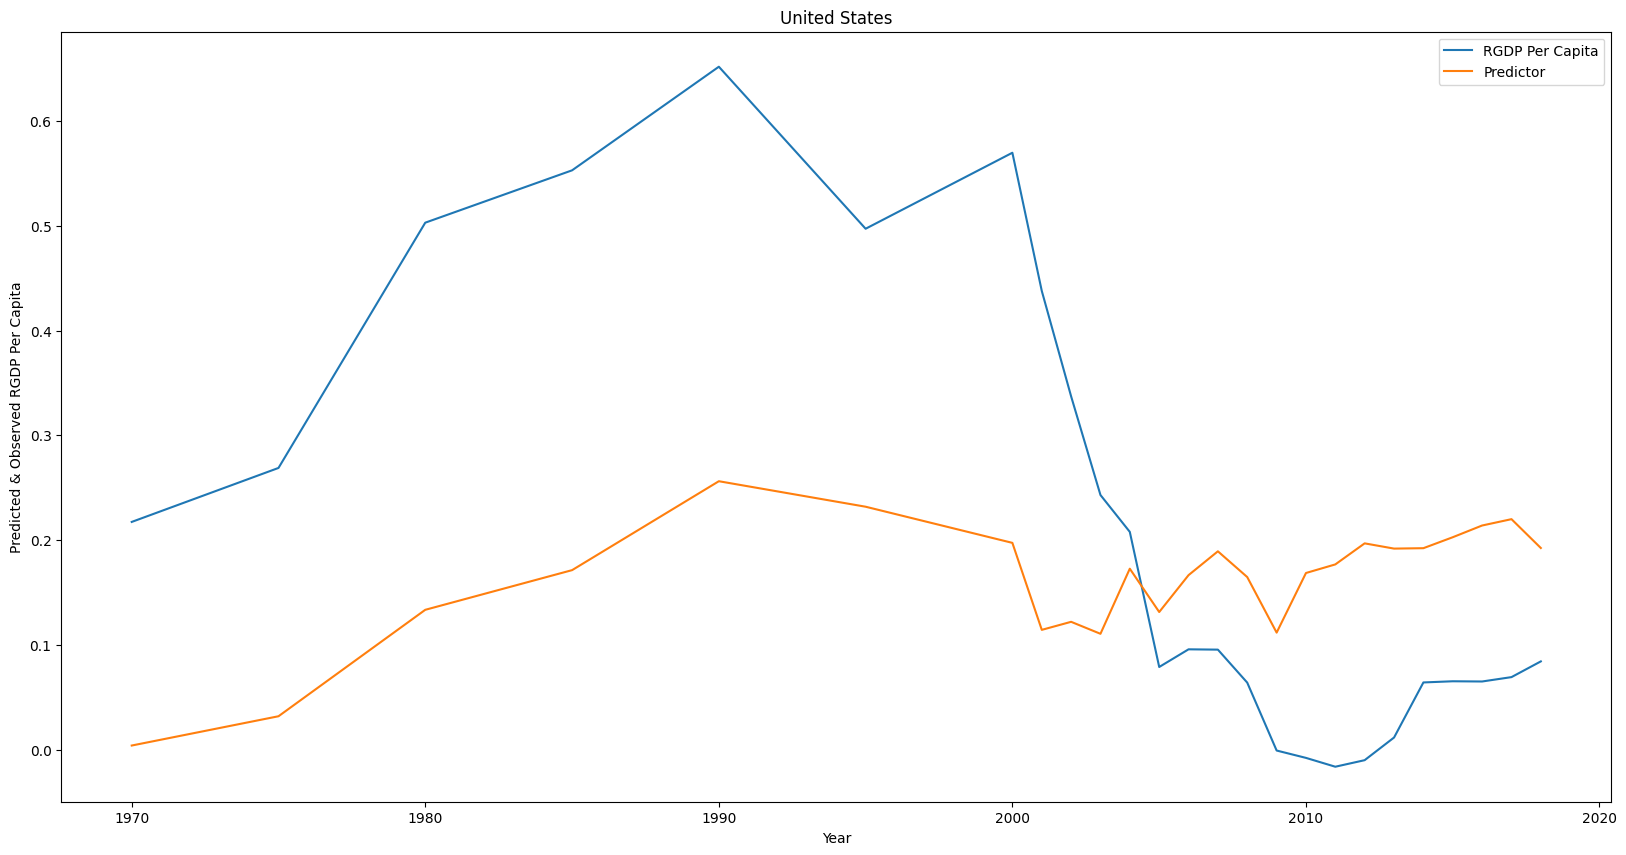

In [20]:
# Loop over the countries in the data and plot the observed and predicted values
for country in reg_data['Countries'].unique():

    if country in oecd_countries:

        # Subset the data to the current country
        country_df = reg_data[reg_data['Countries'] == country]

        # Plot the observed and predicted values
        # Create a new figure and axis object
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.plot(country_df.index.get_level_values(1), country_df['RGDP Per Capita'], label='RGDP Per Capita')
        ax.plot(country_df.index.get_level_values(1), country_df['Predictor'], label='Predictor')

        # Set the axis labels and title
        ax.set_xlabel('Year')
        ax.set_ylabel('Predicted & Observed RGDP Per Capita')
        ax.set_title(f'{country}')

        # Add a legend and show the plot
        ax.legend()
        plt.show()

In [21]:
reg_data1 = hw_data[hw_data.keys()[3:]]
reg_data1

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                      
AUS        1970-01-01      Australia  7.291154            6.863768   
NaN        1975-01-01      Australia  7.002204            6.255684   
           1980-01-01      Australia  7.316469            6.339449   
           1985-01-01      Australia  7.670016            6.259326   
           1990-01-01      Australia  7.927001            6.708215   
...                              ...       ...                 ...   
           2014-01-01  United States  8.249649            7.239681   
           2015-01-01  United States  8.309574            7.237673   
           2016-01-01  United States  8.339536            7.252009   
           2017-01-01  United States  8.379486            7.354358   
           2018-01-01  United States  8.279612            7.409095   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AUS        1970-01-01                          7.775615     9.581113   
NaN        1975-01-01                          8.034445     8.346907   
           1980-01-01                          8.037057     9.085686   
           1985-01-01                          8.540345     9.089736   
           1990-01-01                          8.398730     9.018318   
...                                                 ...          ...   
           2014-01-01                          7.652463     9.737154   
           2015-01-01                          7.745733     9.855788   
           2016-01-01                          7.793107     9.814703   
           2017-01-01                          7.802657     9.772320   
           2018-01-01                          7.646530     9.772494   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AUS        1970-01-01                          5.882101    6.335298   
NaN        1975-01-01                          5.692162    6.761980   
           1980-01-01                          5.841104    7.389934   
           1985-01-01                          6.985368    7.469774   
           1990-01-01                          7.661409    7.750886   
...                                                 ...         ...   
           2014-01-01                          7.836022    8.792114   
           2015-01-01                          7.810632    8.891698   
           2016-01-01                          7.889129    8.952382   
           2017-01-01                          7.921225    9.031901   
           2018-01-01                          7.783384    8.784245   

                       RGDP Per Capita  
ISO_Code_3 Year                         
AUS        1970-01-01       19166.0000  
NaN        1975-01-01       20993.0000  
           1980-01-01       22972.0000  
           1985-01-01       24927.0000  
           1990-01-01       27373.0000  
...                                ...  
           2014-01-01       51664.0000  
           2015-01-01       52591.0000  
           2016-01-01       53015.0000  
           2017-01-01       54007.7698  
           2018-01-01       55334.7394  

[900 rows x 8 columns]

In [22]:
years_diff = 2

reg_data1['RGDP Per Capita'] = np.log(reg_data1['RGDP Per Capita']).diff(years_diff)
reg_data1 = reg_data1.replace([np.inf, -np.inf], np.NaN)

C:\Users\akoto\AppData\Local\Temp\ipykernel_4344\1864570527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data1['RGDP Per Capita'] = np.log(reg_data1['RGDP Per Capita']).diff(years_diff)


In [23]:
years_diff = 2
reg_data1['RGDP Per Capita Lag'] = reg_data1['RGDP Per Capita'].shift(years_diff)
reg_data1 = reg_data1.dropna(axis= 0, how= 'any')

In [24]:
reg_data.index.get_level_values('ISO_Code_3').unique()

Index([  nan, 'AUT', 'BEL', 'CAN', 'CHE', 'CRI', 'DEU', 'DNK', 'ESP', 'FIN',
       'FRA', 'GBR', 'GRC', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'LUX', 'MEX',
       'NLD', 'NOR', 'NZL', 'PRT', 'SWE', 'TUR', 'USA'],
      dtype='object', name='ISO_Code_3')

In [25]:
x_vars = list(reg_data1.keys()[2:7])
y_var = [reg_data1.keys()[7]]
x_vars.append('RGDP Per Capita Lag')
x_vars, y_var

(['Size of Government',
  'Legal System and Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation',
  'RGDP Per Capita Lag'],
 ['RGDP Per Capita'])

In [26]:
y = reg_data1[y_var]
X = reg_data1[x_vars]

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()
reg_data1['Predictor'] = results.predict()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     48.78
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.36e-51
Time:                        18:41:26   Log-Likelihood:                -12.929
No. Observations:                 861   AIC:                             39.86
Df Residuals:                     854   BIC:                             73.16
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [27]:
reg_data1['Residuals'] = results.resid

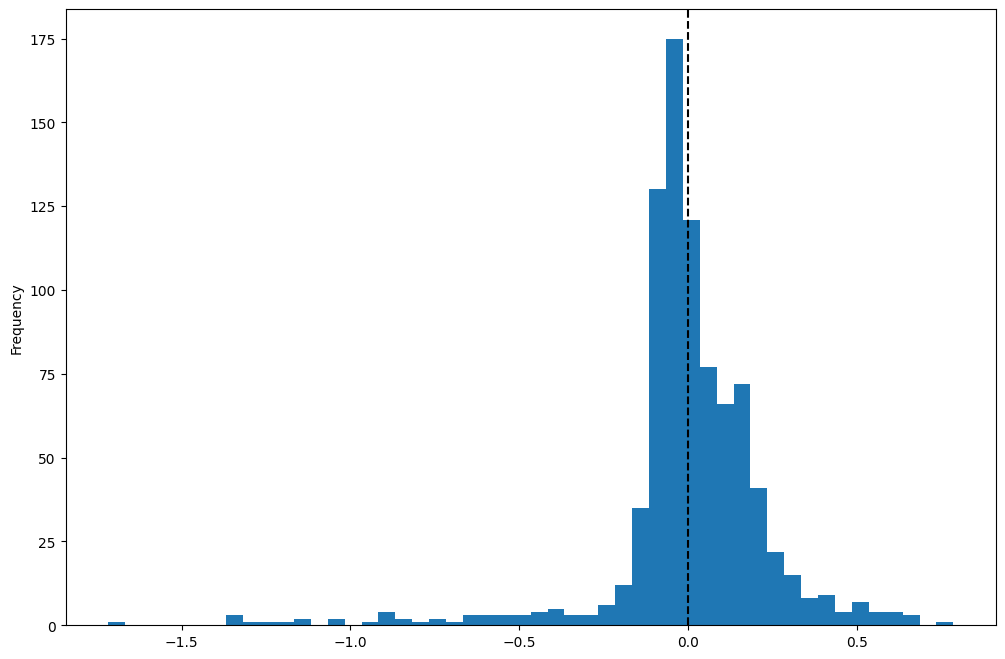

In [28]:
fig, ax = plt.subplots(figsize = (12, 8))

reg_data1['Residuals'].plot.hist(bins= 50, ax= ax)
ax.axvline(0, ls = '--', color = 'k')

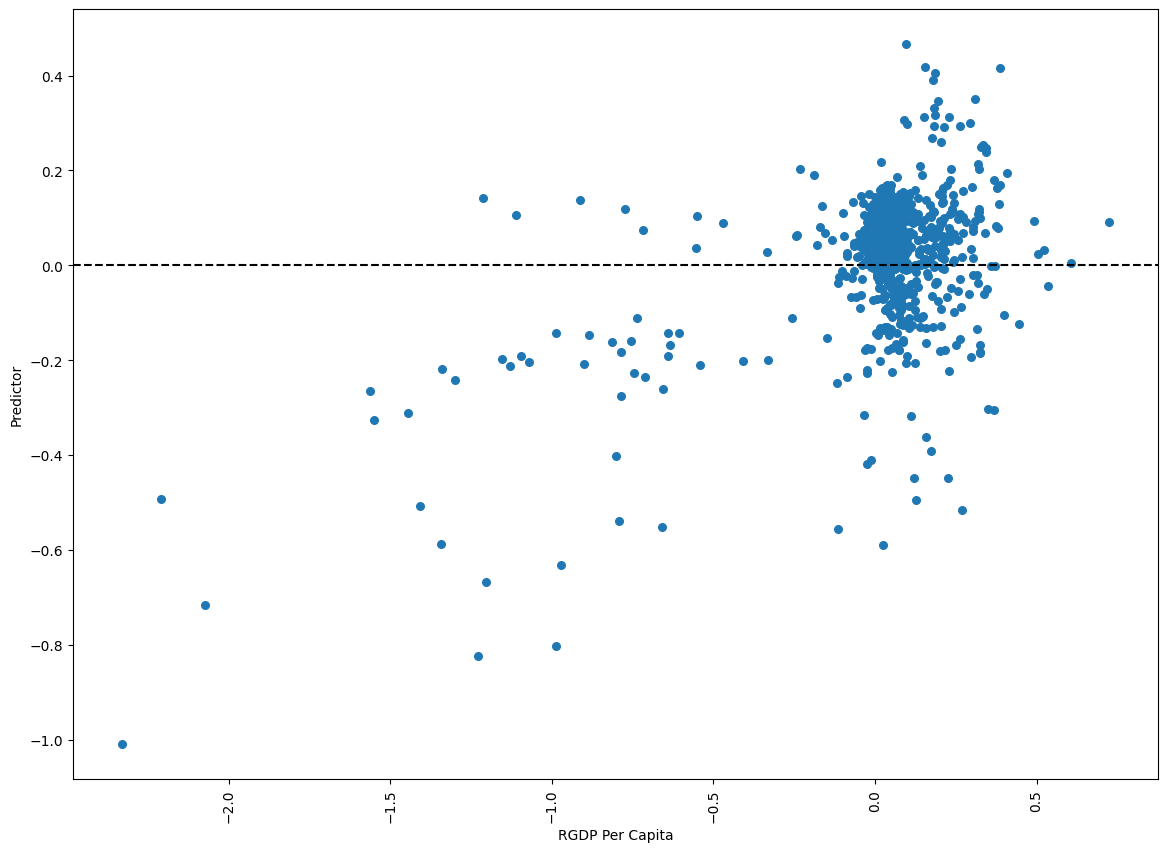

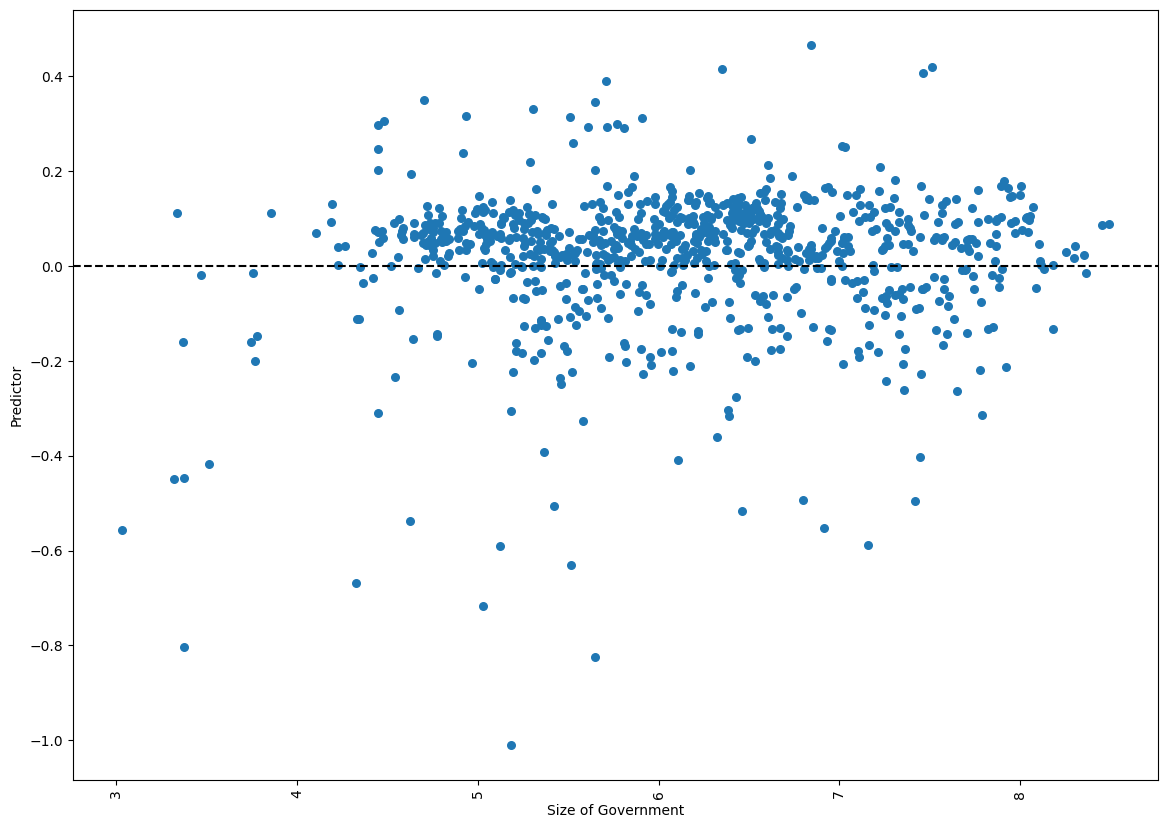

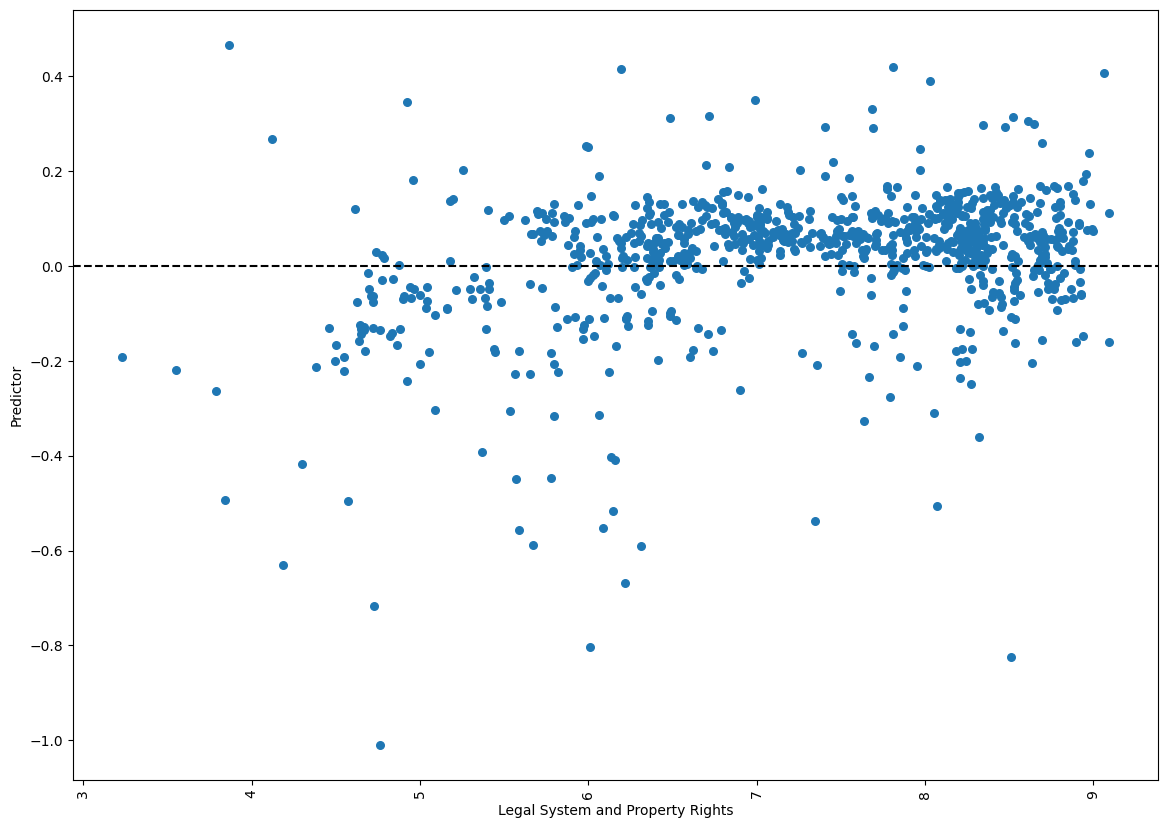

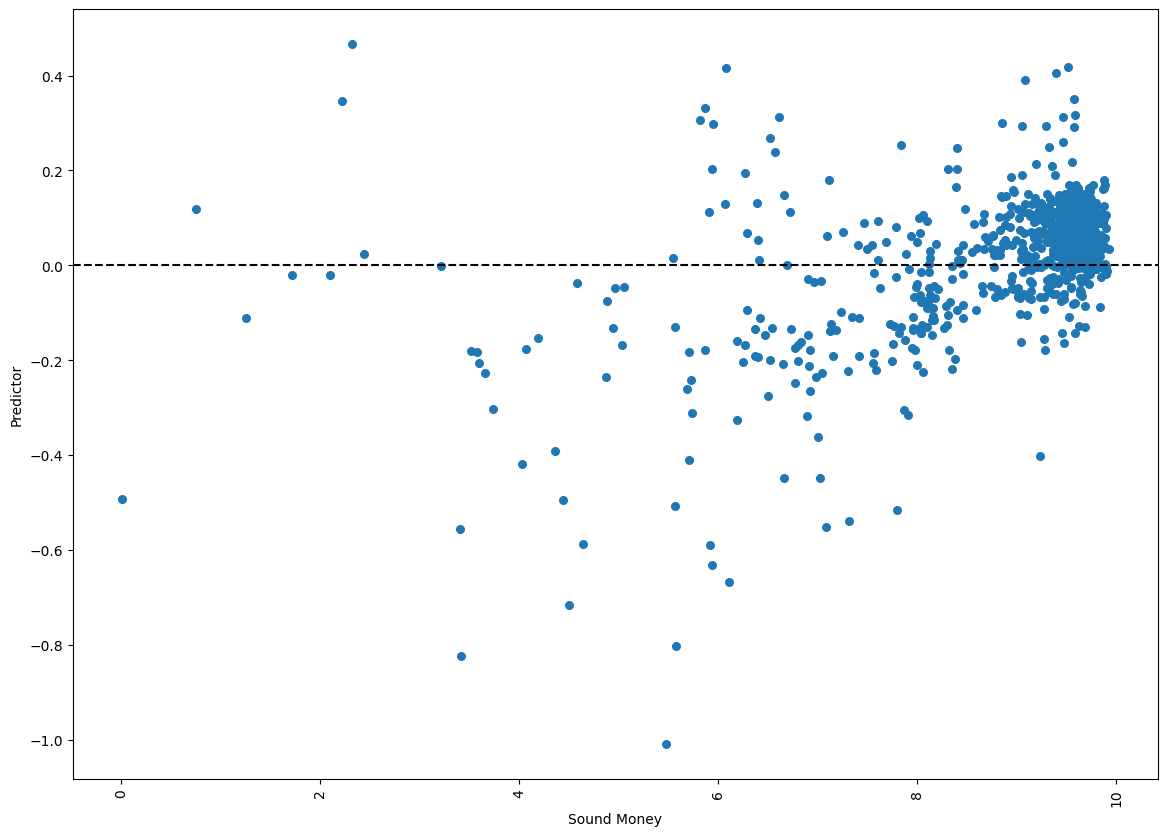

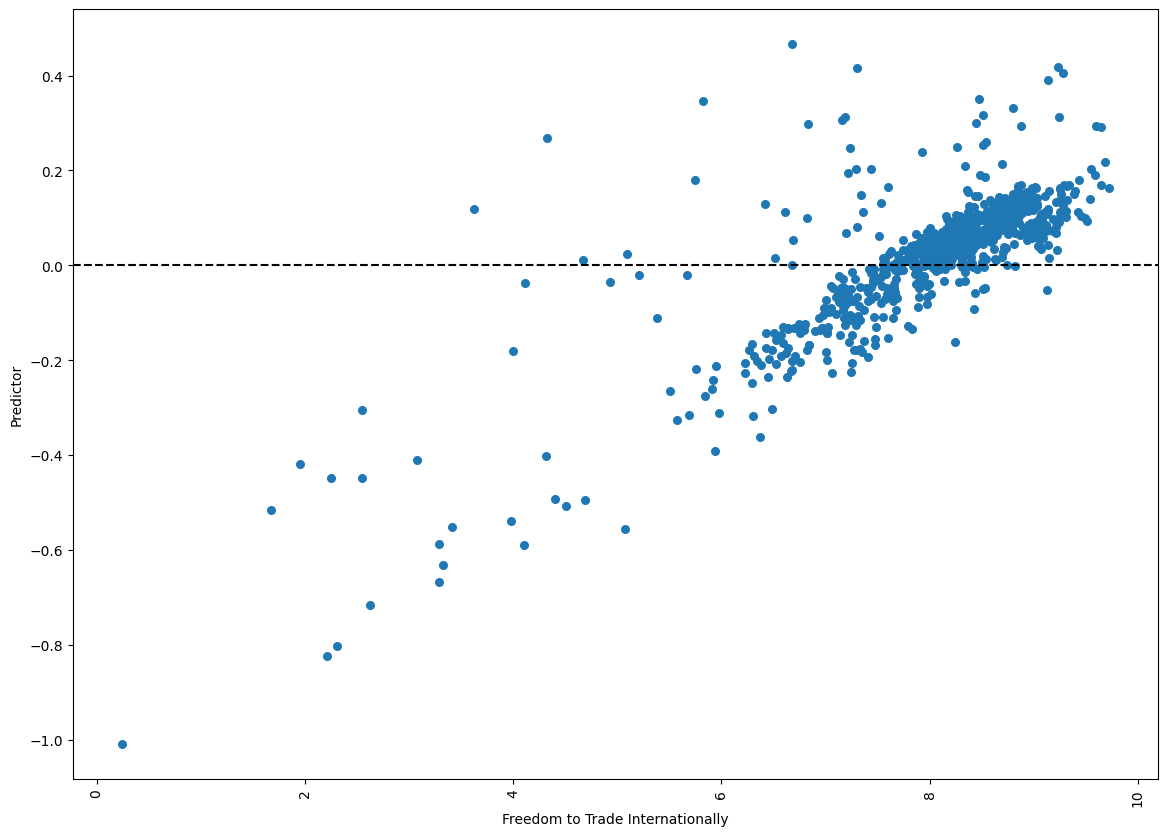

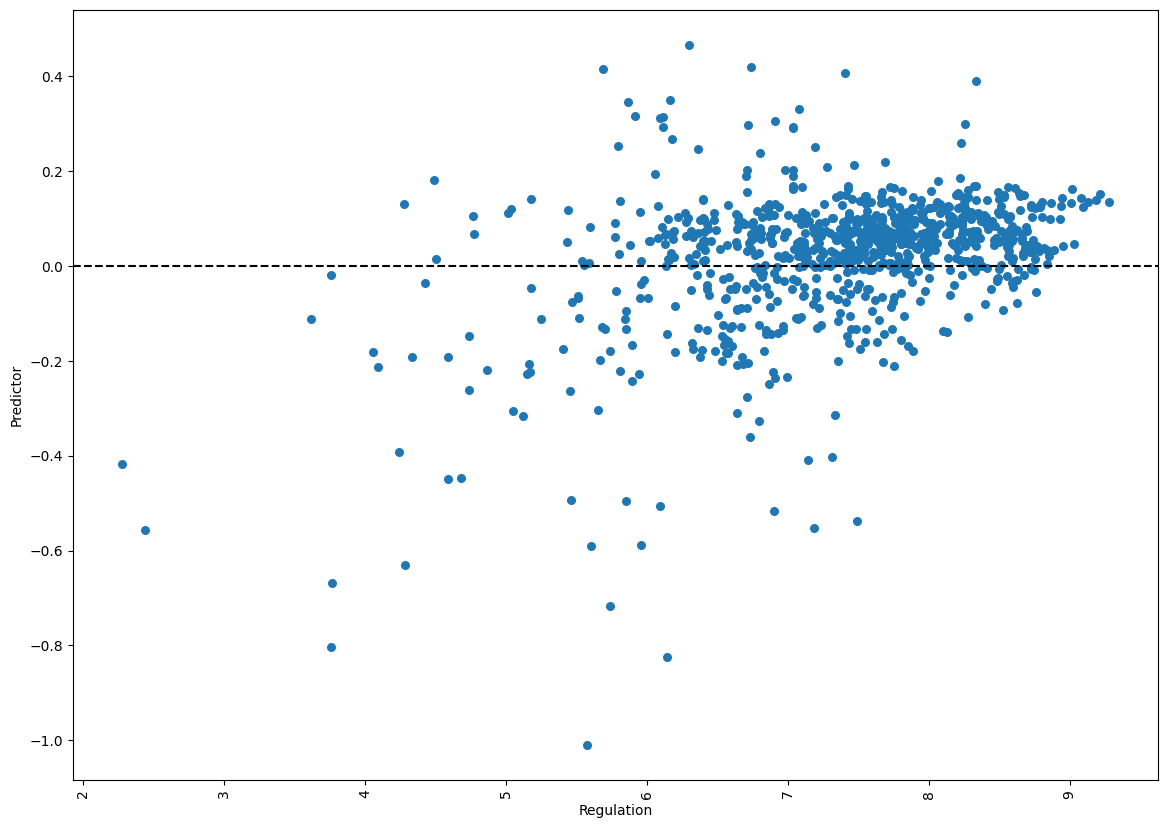

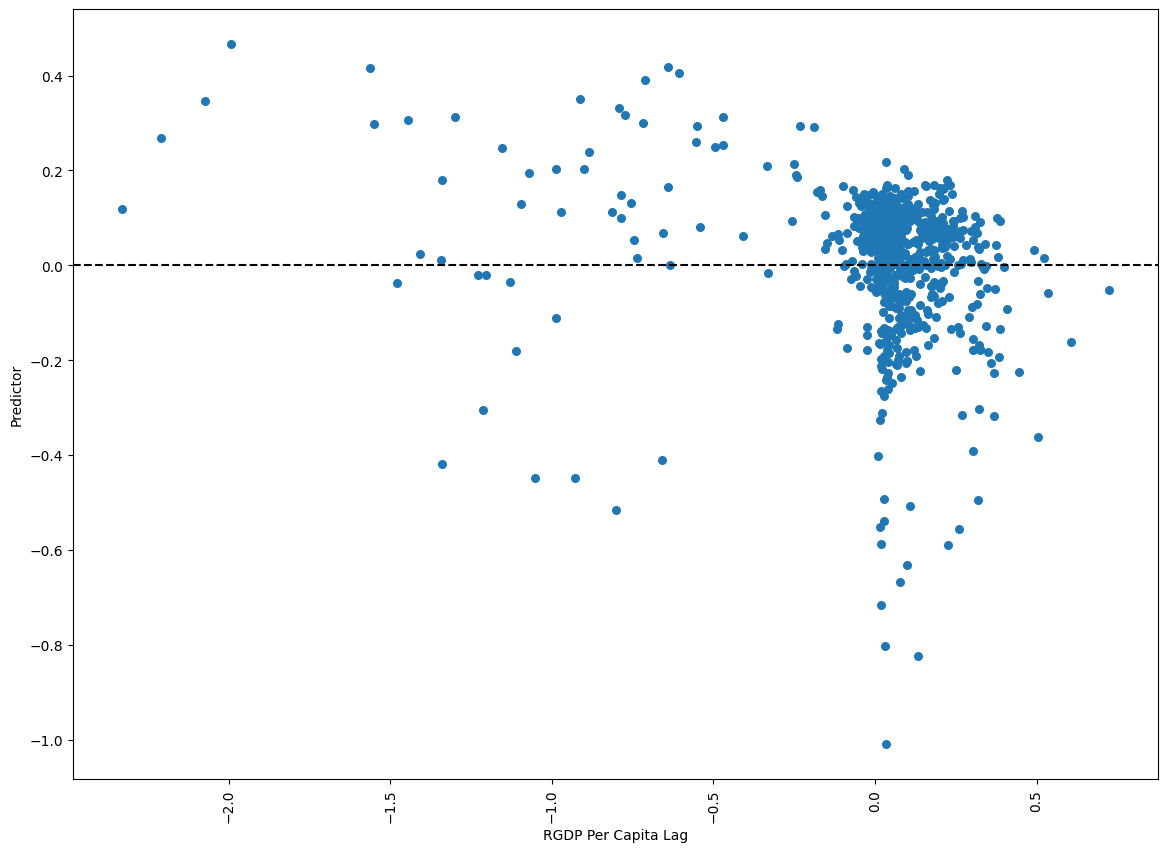

In [29]:
def plot_predictor(df, y_var, x_vars):
    for var in y_var + x_vars:
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data1.plot.scatter(x = var,
                            y = 'Predictor', 
                            s = 30, ax = ax)
            ax.axhline(0, ls = '--', color = 'k')
            plt.xticks(rotation=90)
            plt.show()
            plt.close()

plot_predictor(reg_data1, y_var, x_vars)

Yes, we do observe bias in the resdiuals when controlling for each variable.

This is because observing bias in the residuals means that the errors (the differences between the observed values and the predicted values) are not randomly distributed around zero. Instead, there is a systematic pattern in the residuals, indicating that the model is not accurately capturing the relationship between the independent and dependent variables.

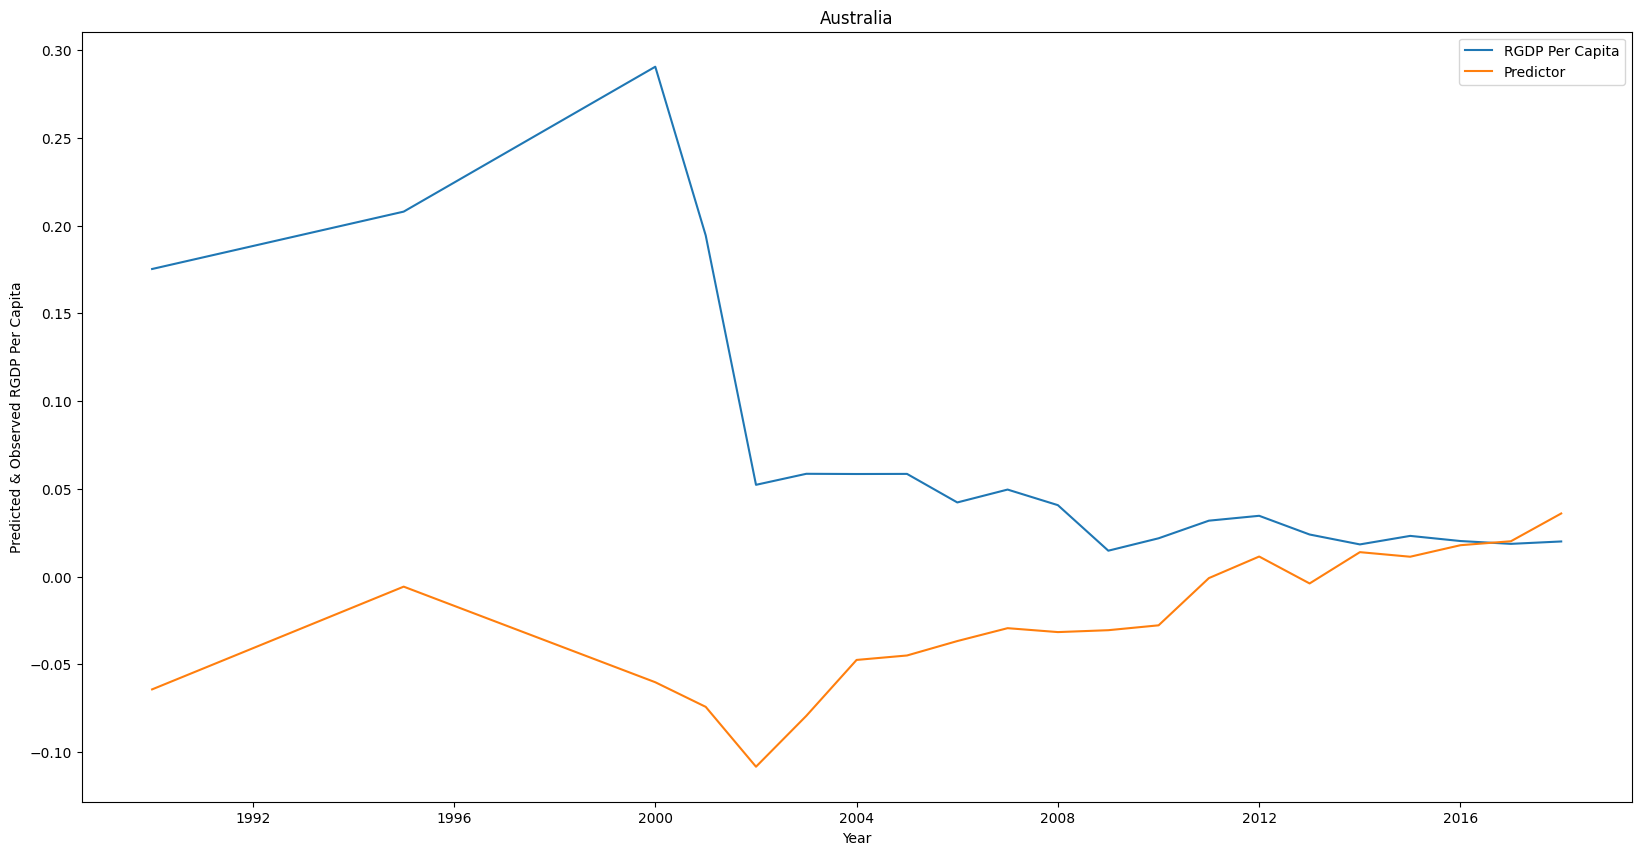

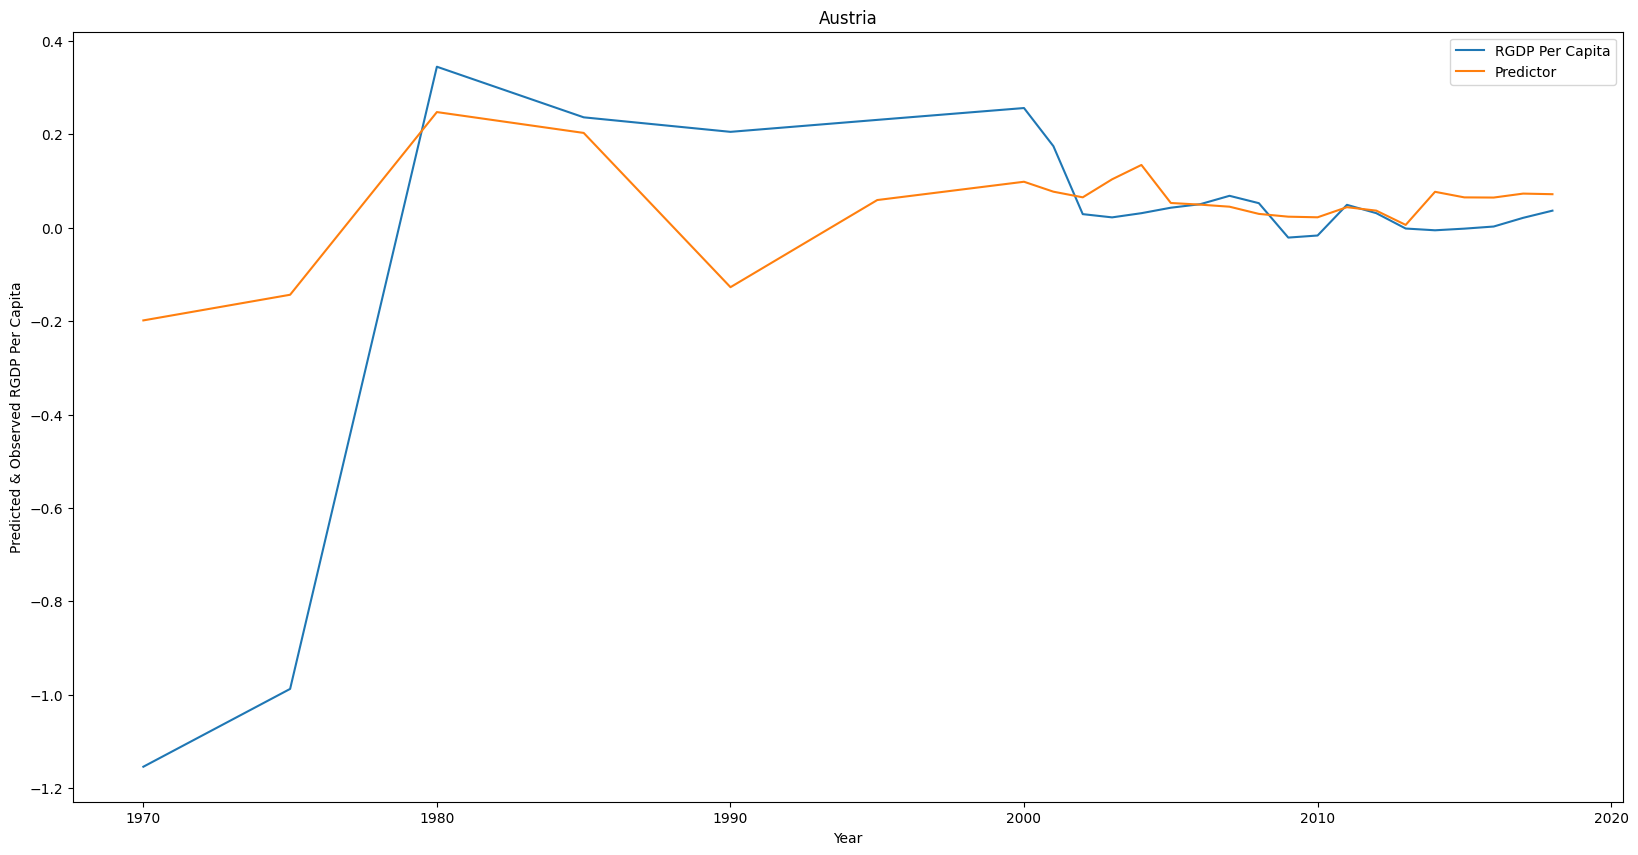

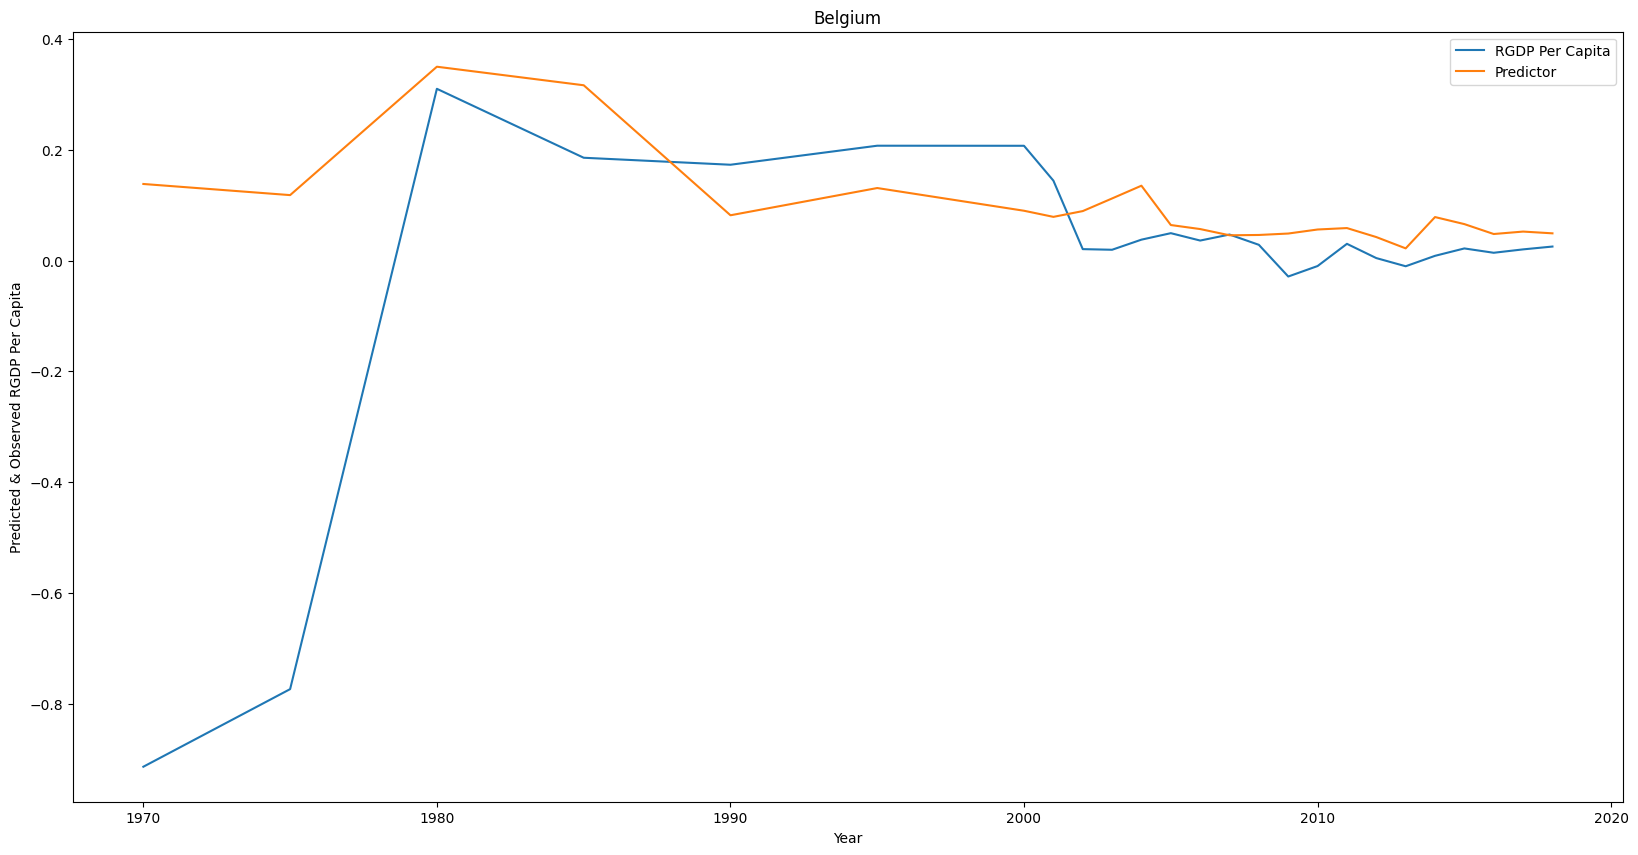

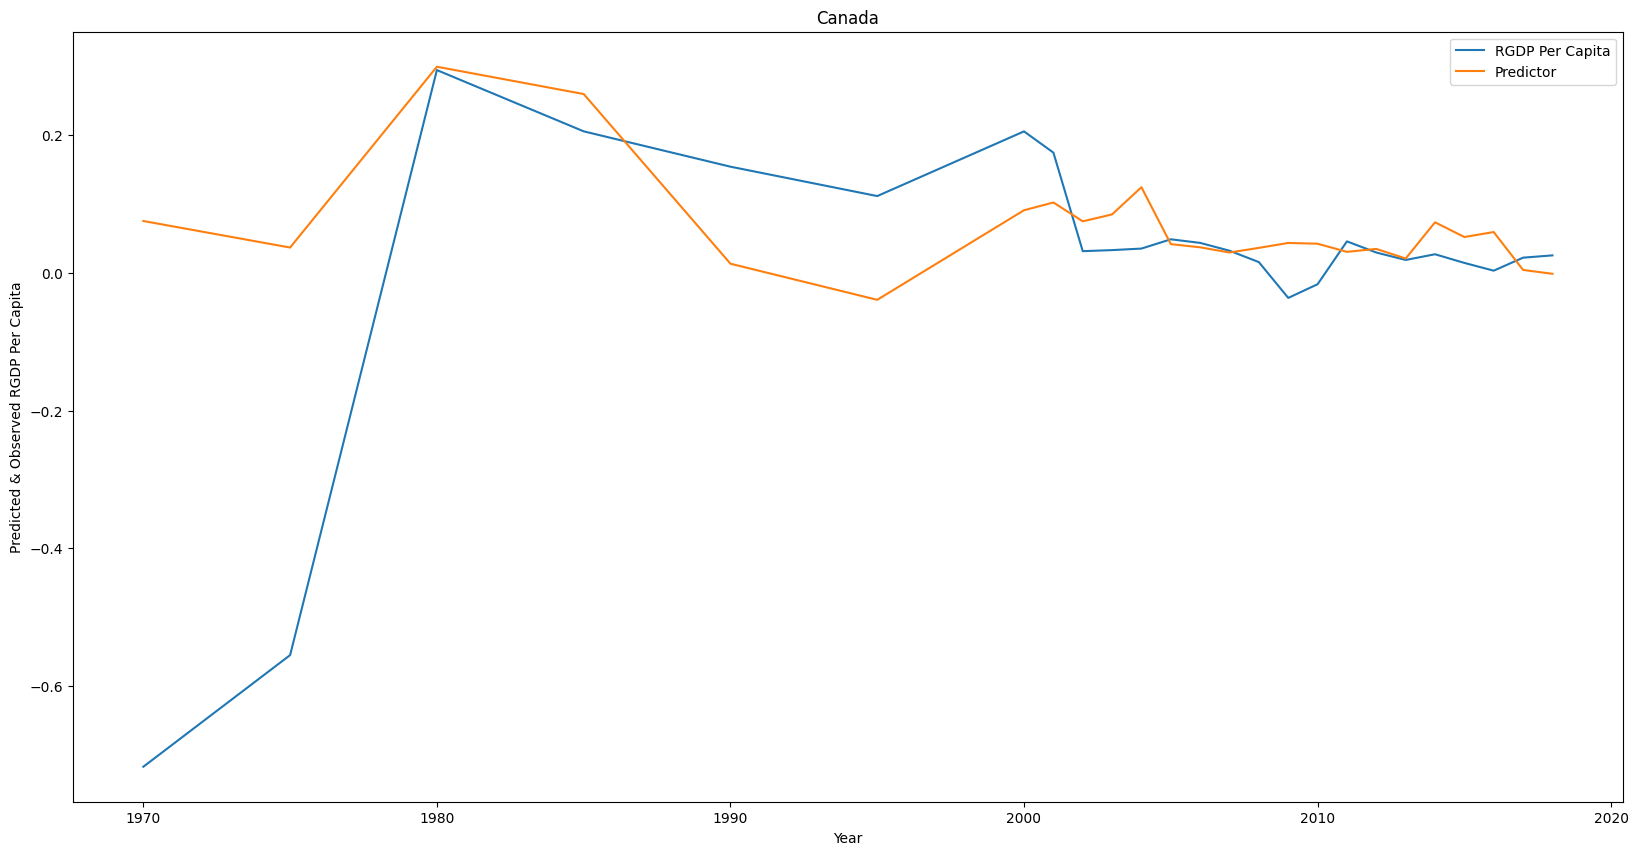

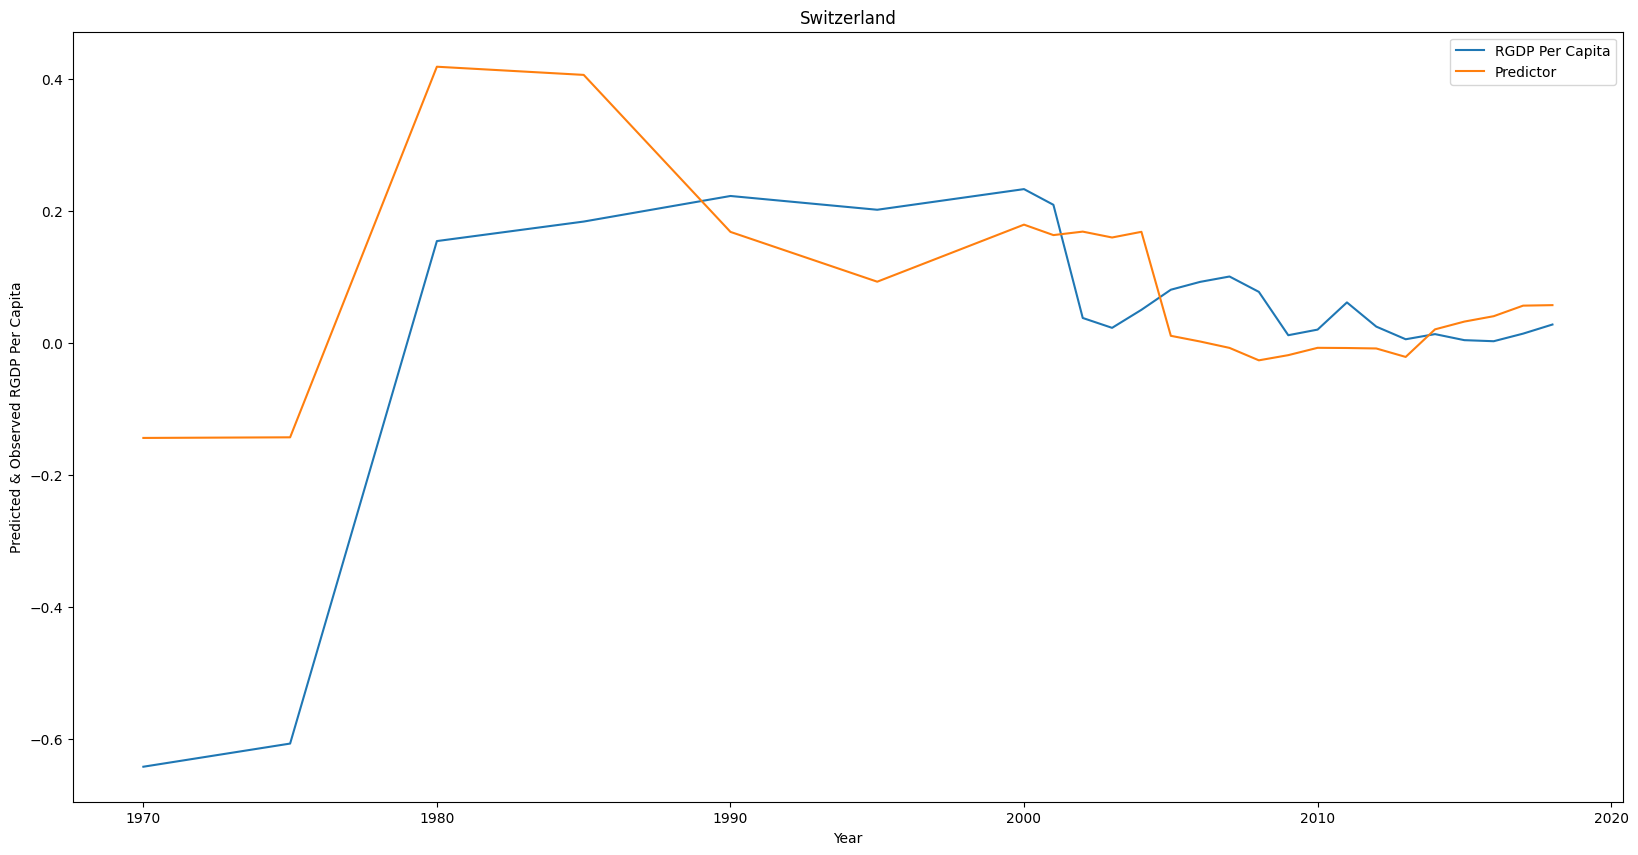

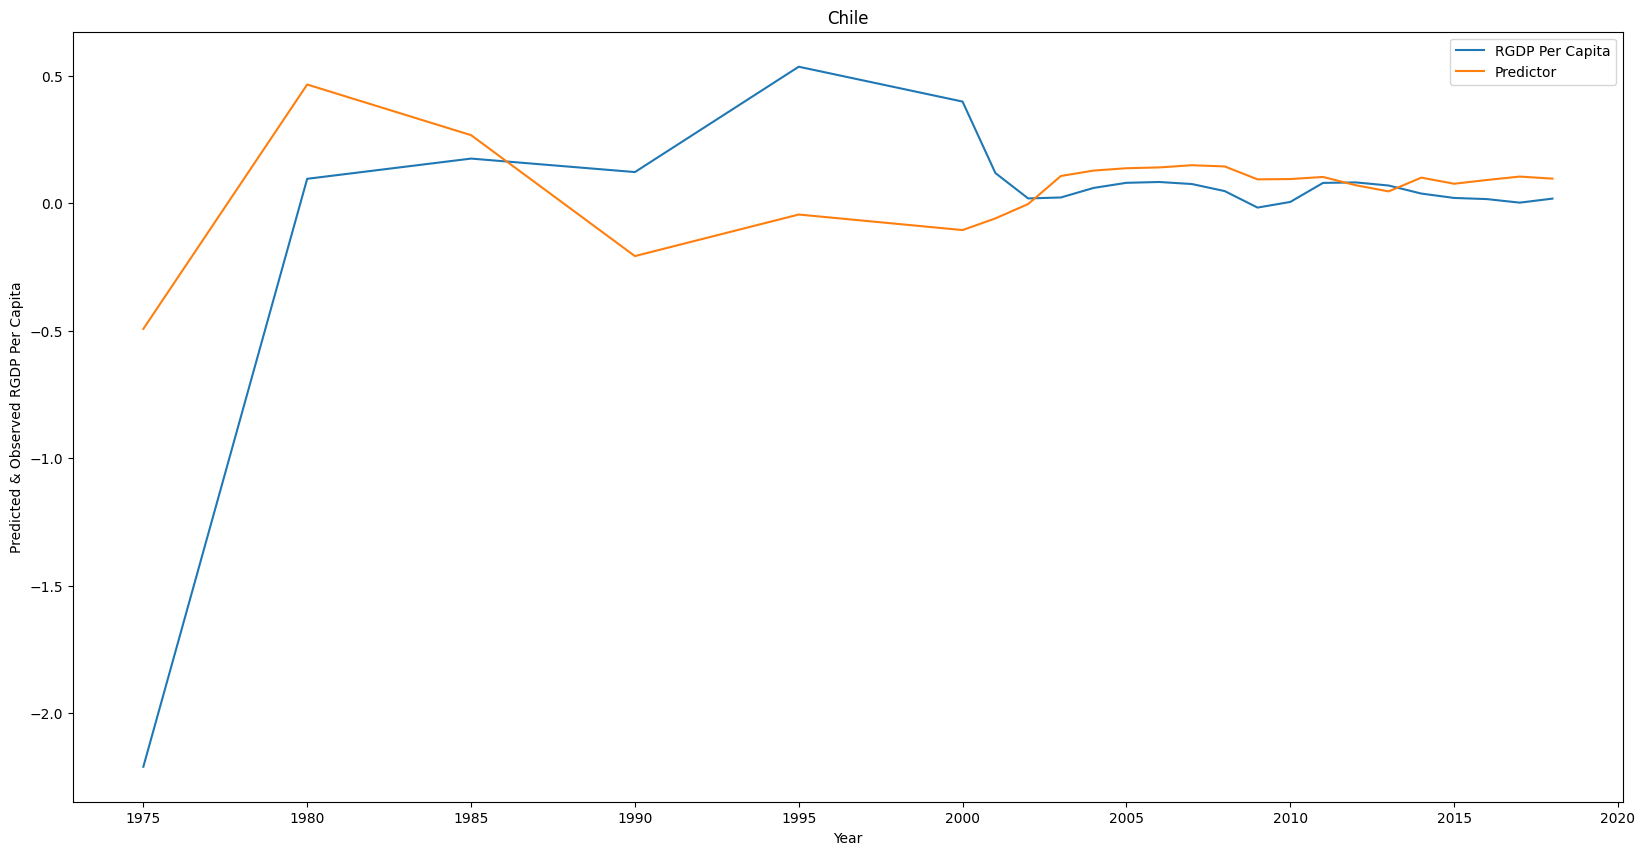

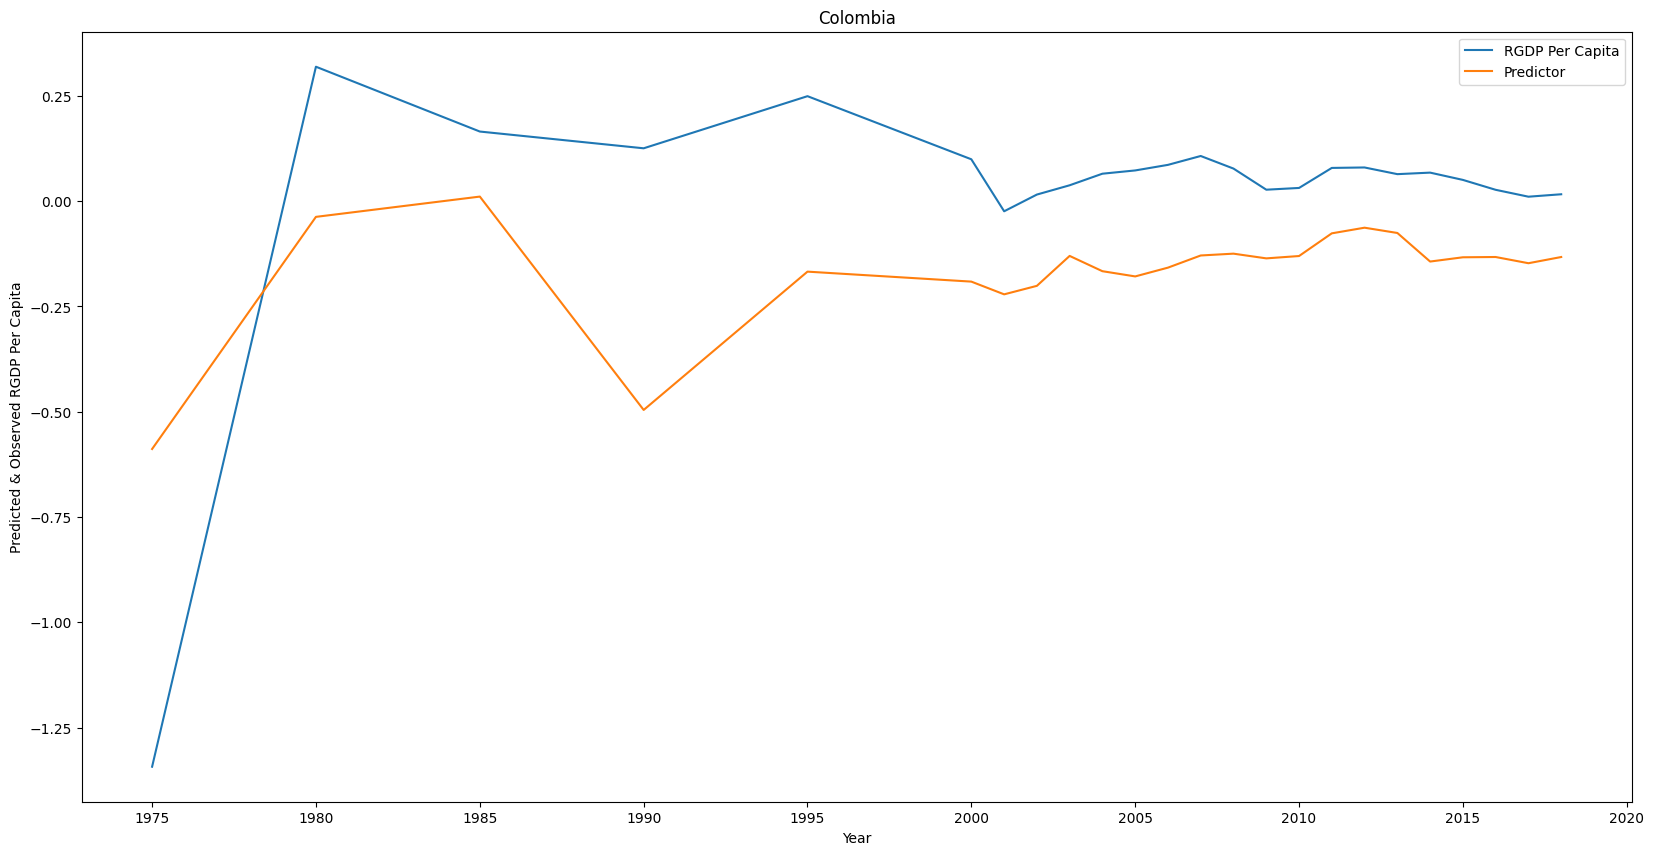

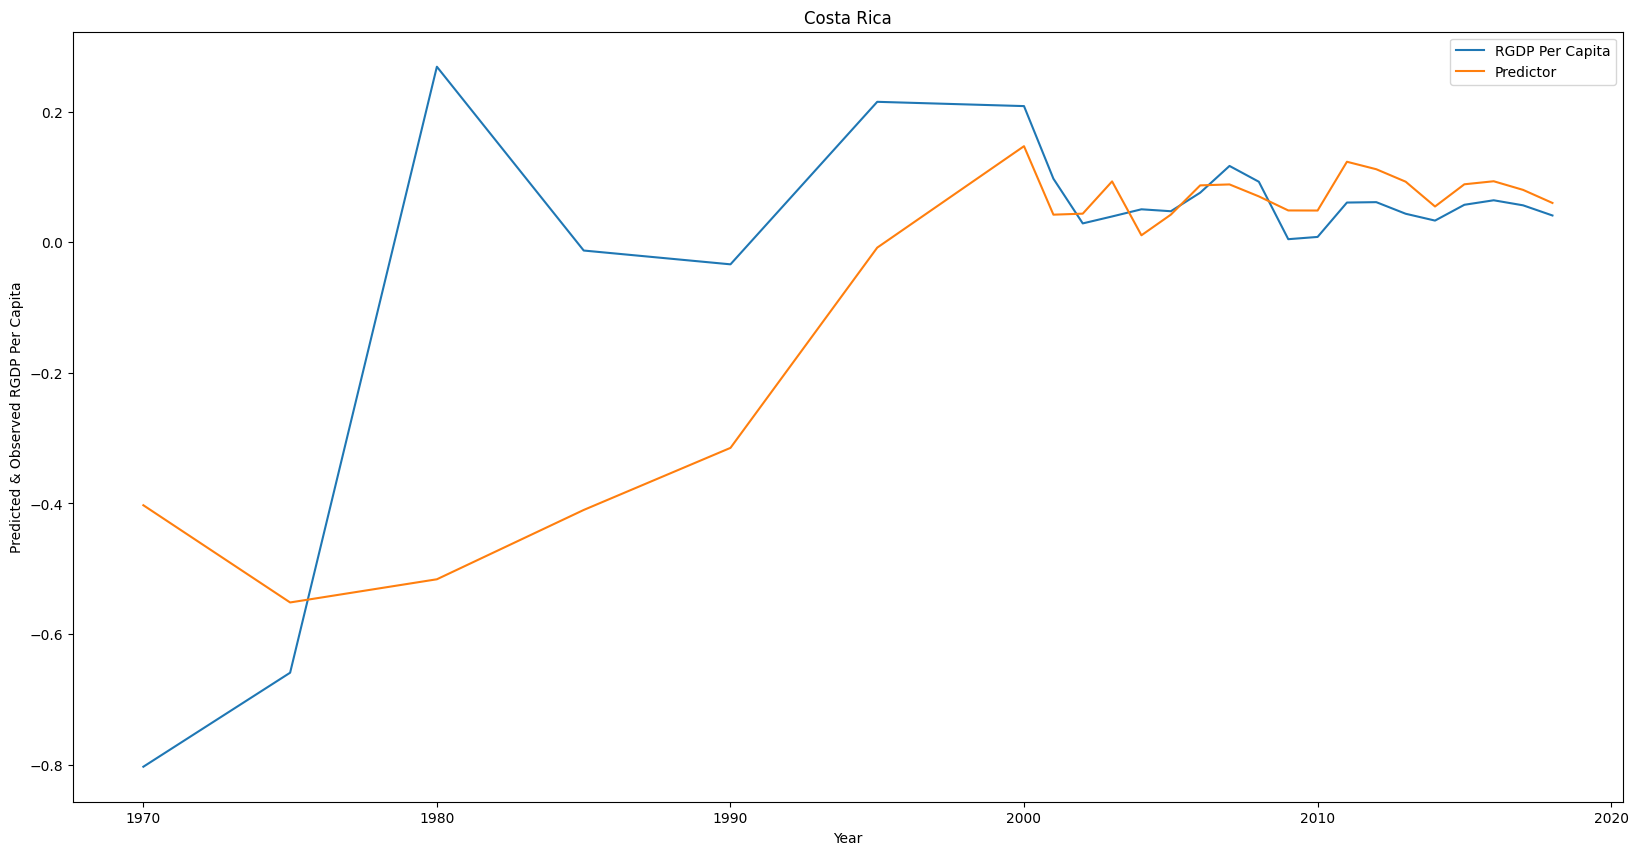

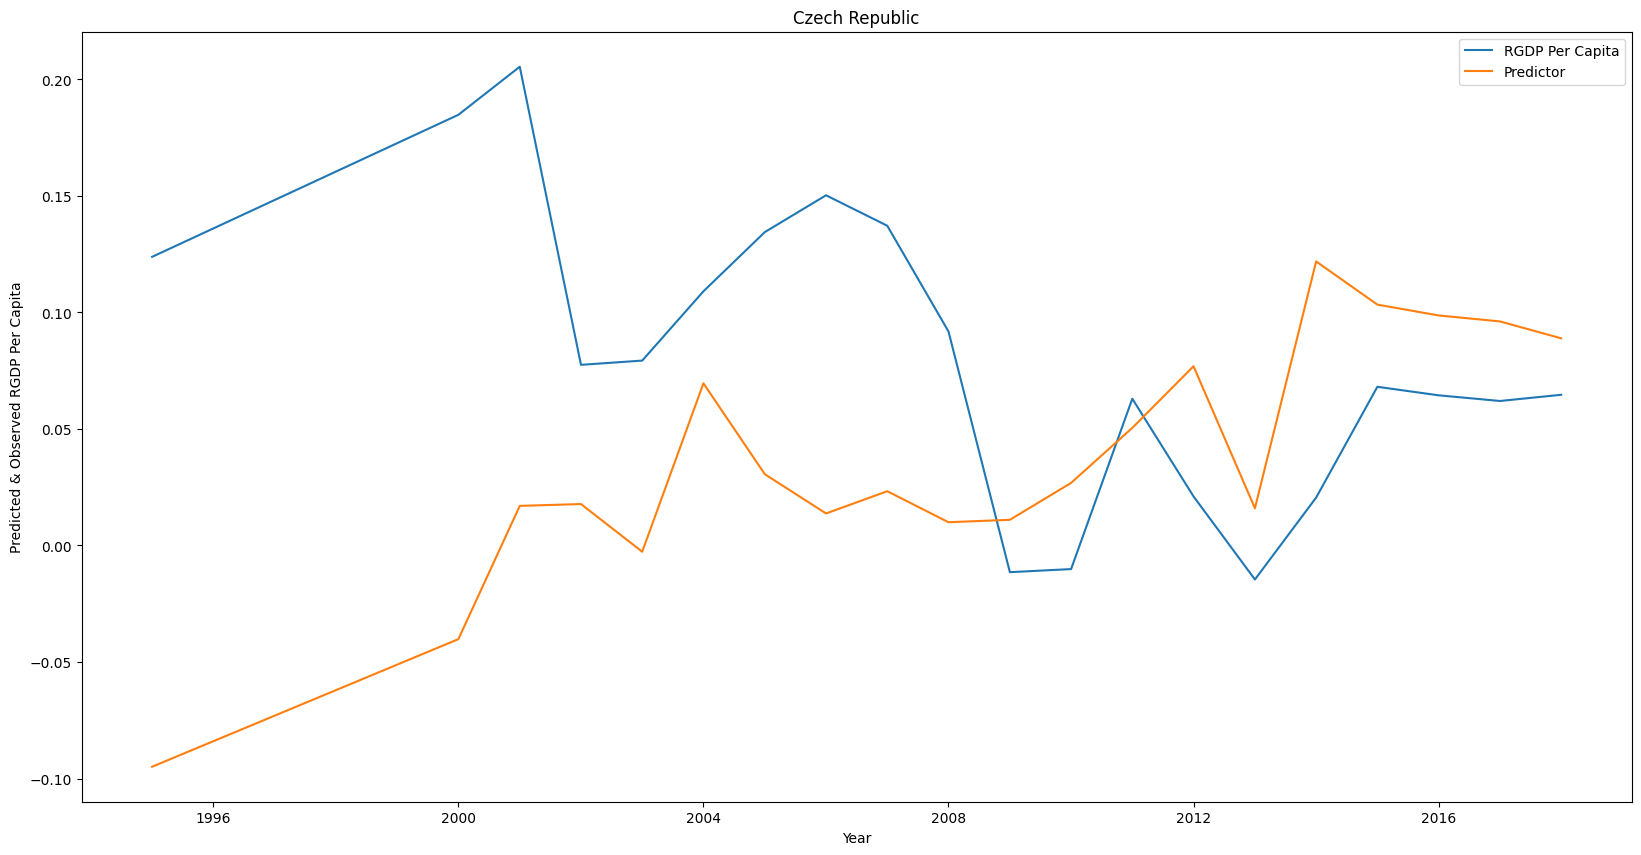

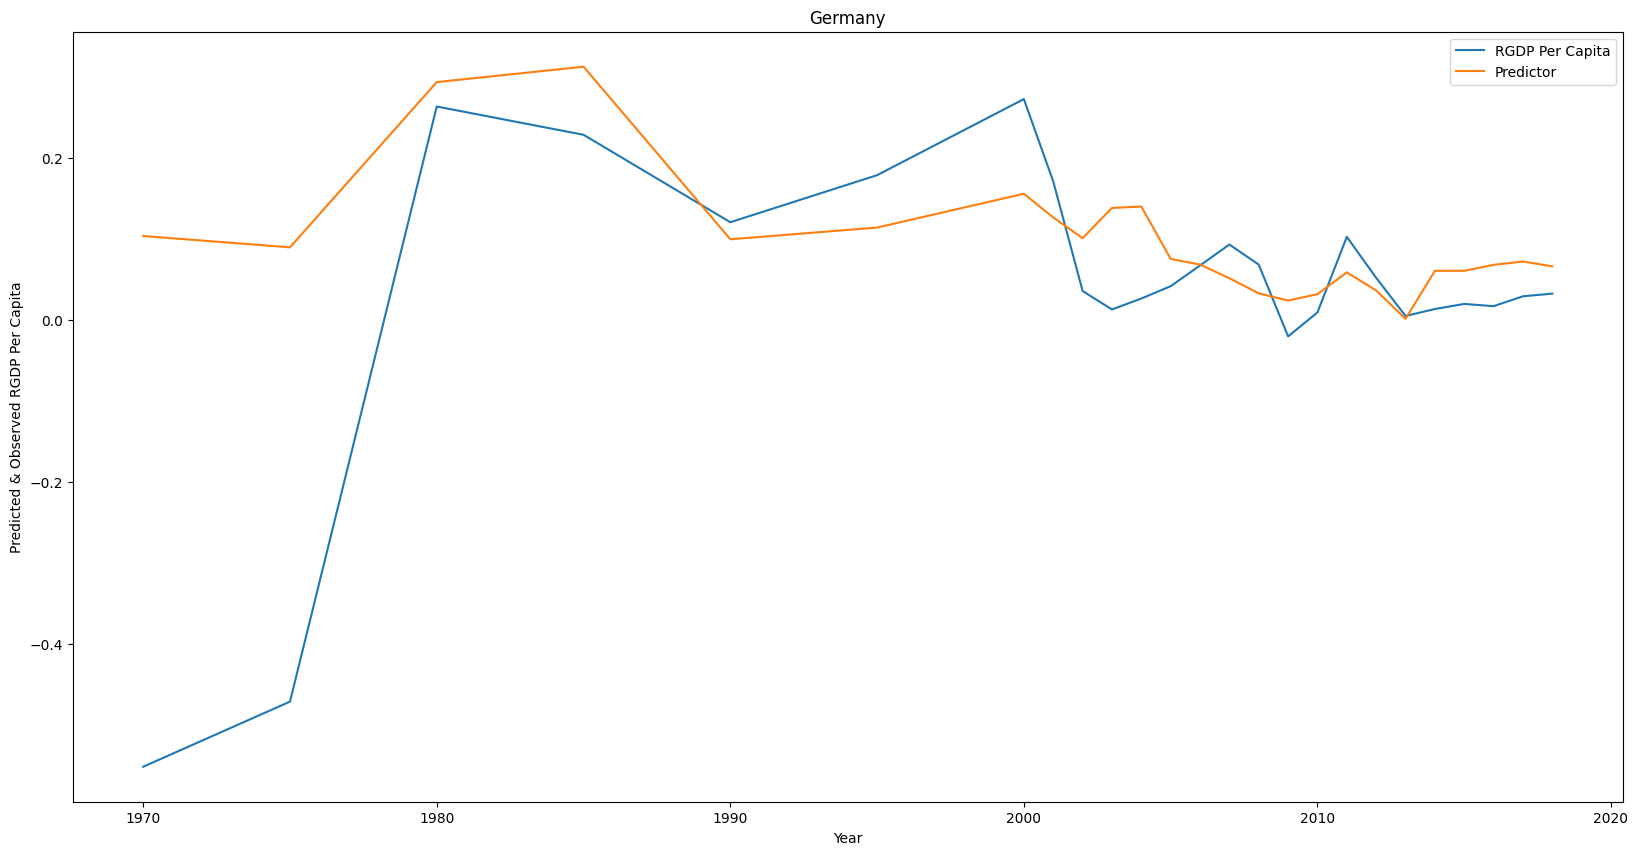

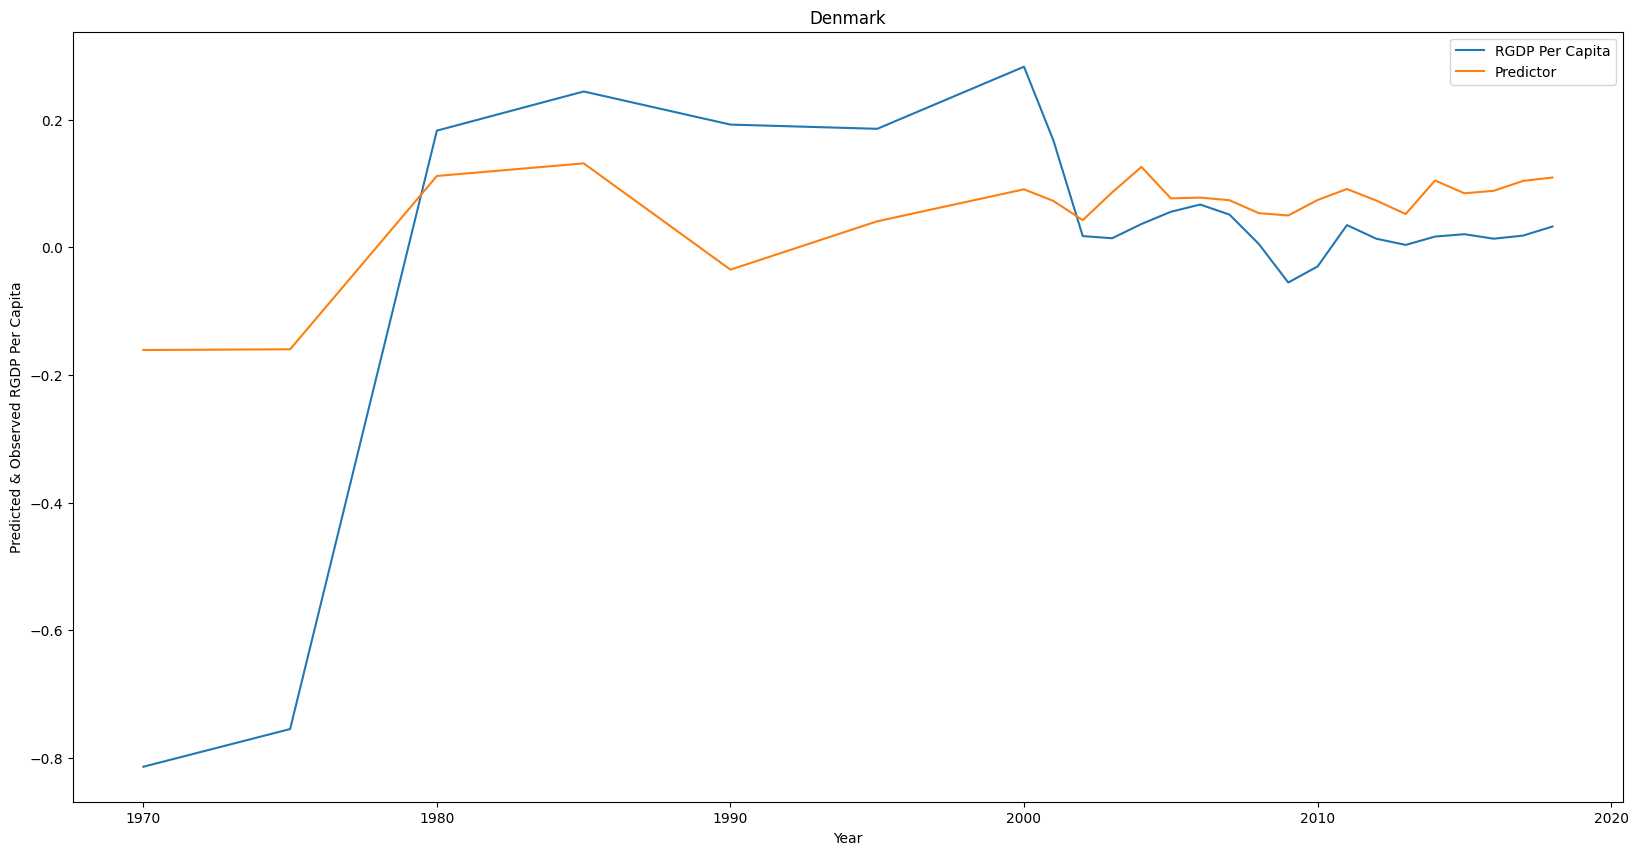

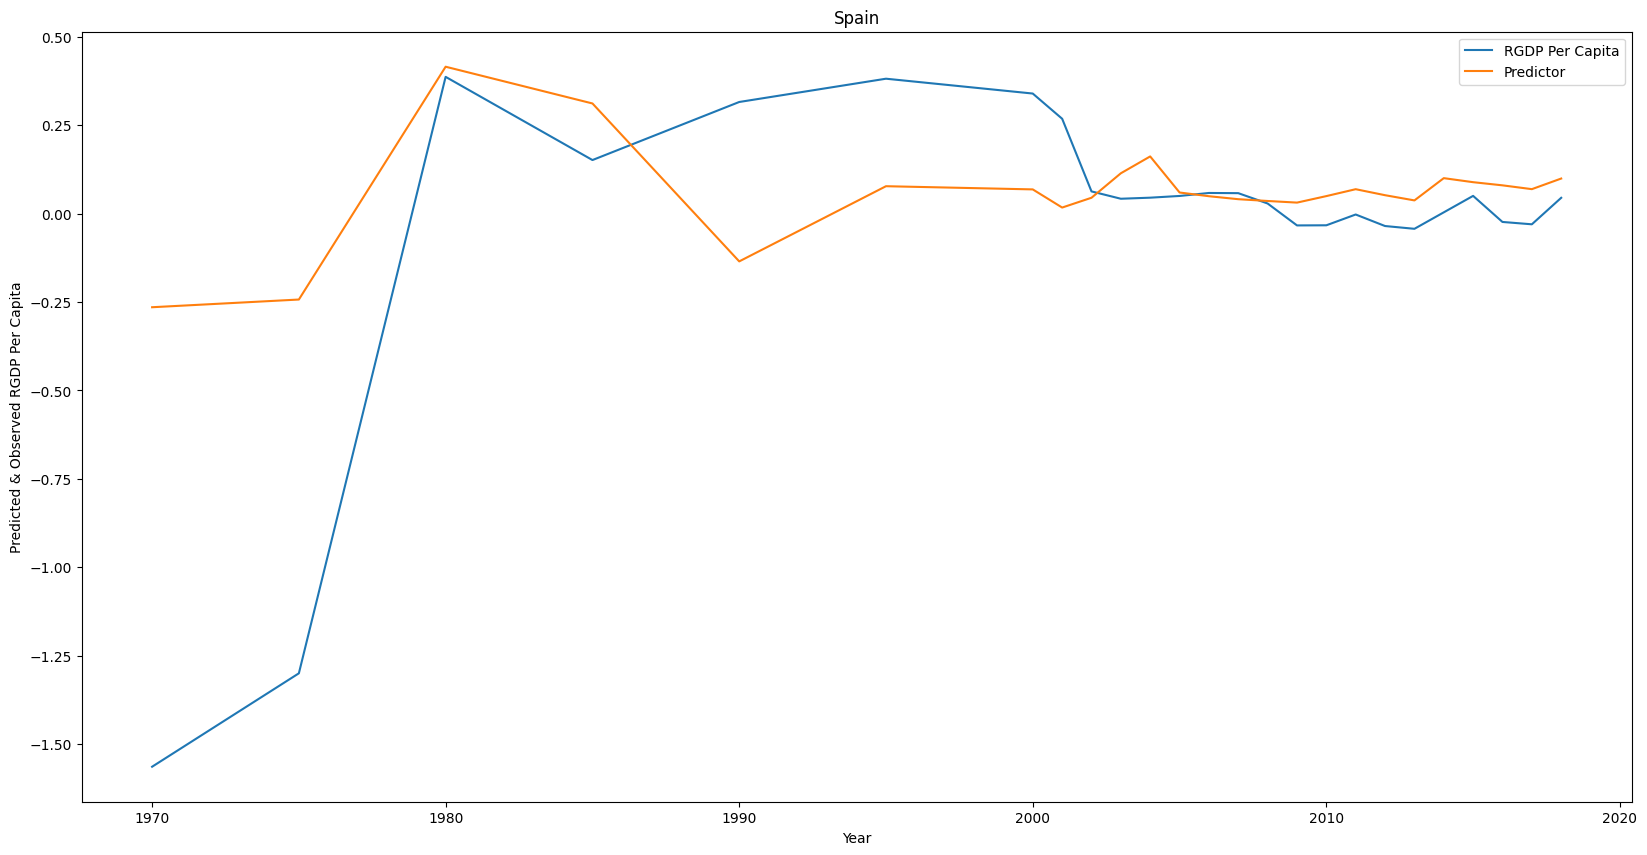

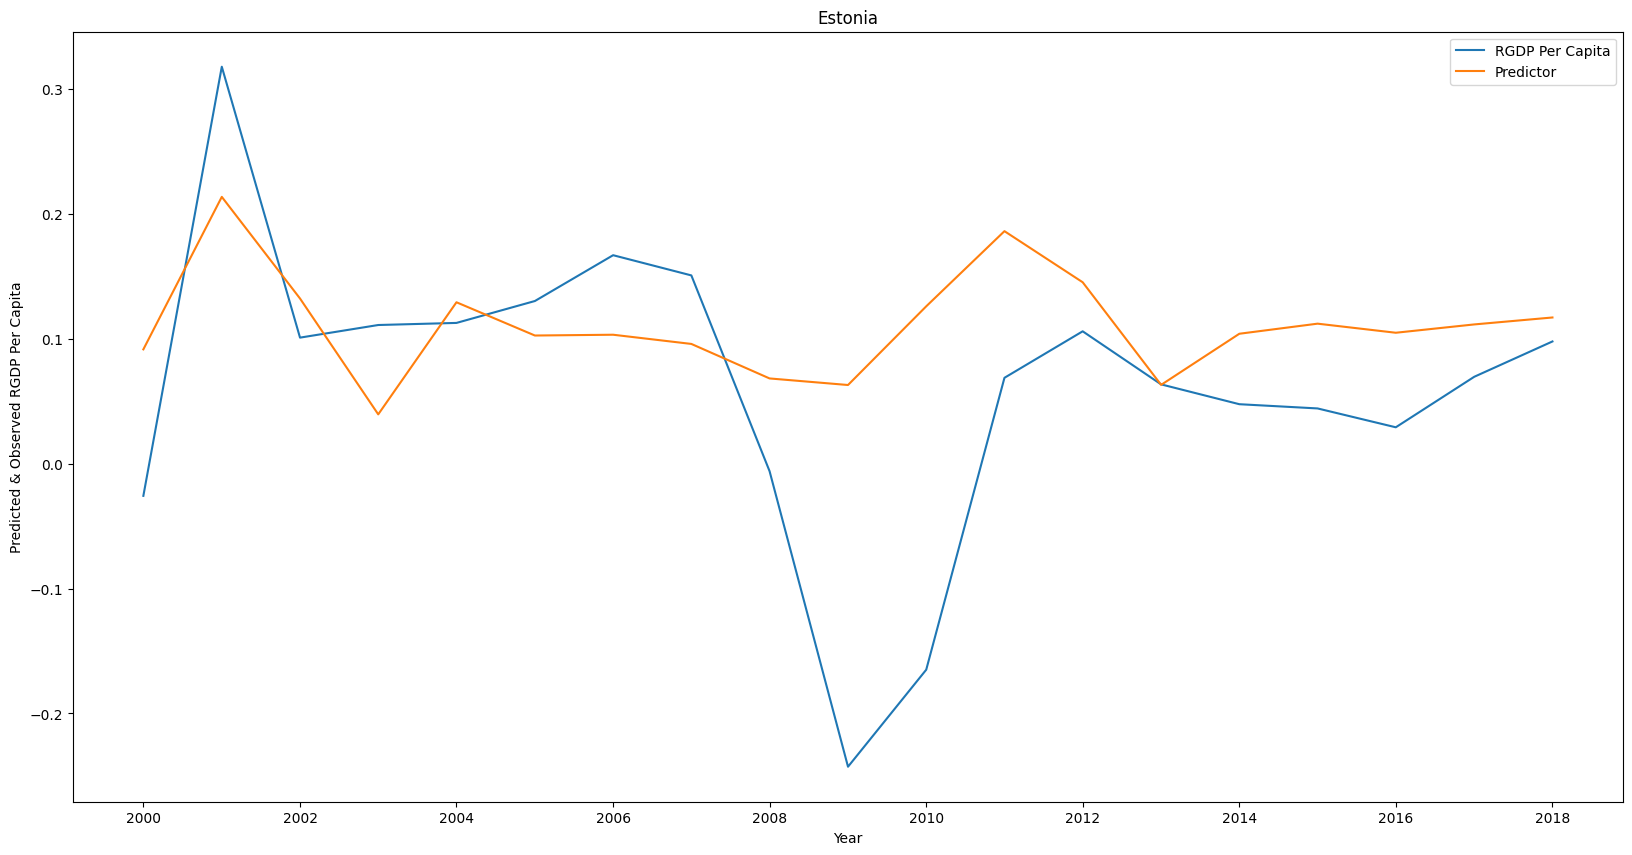

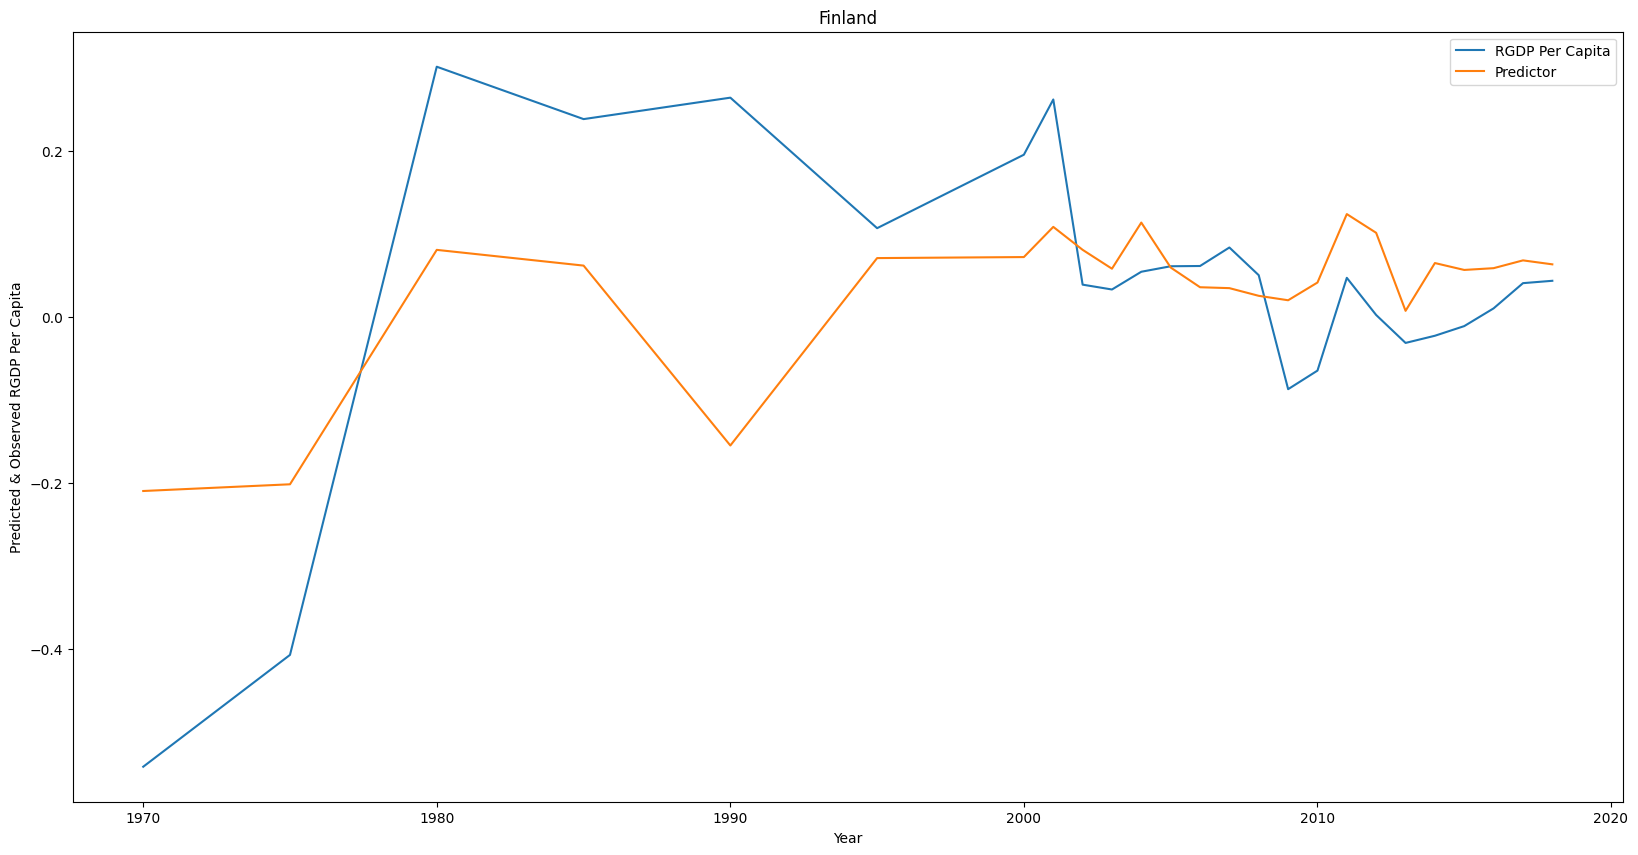

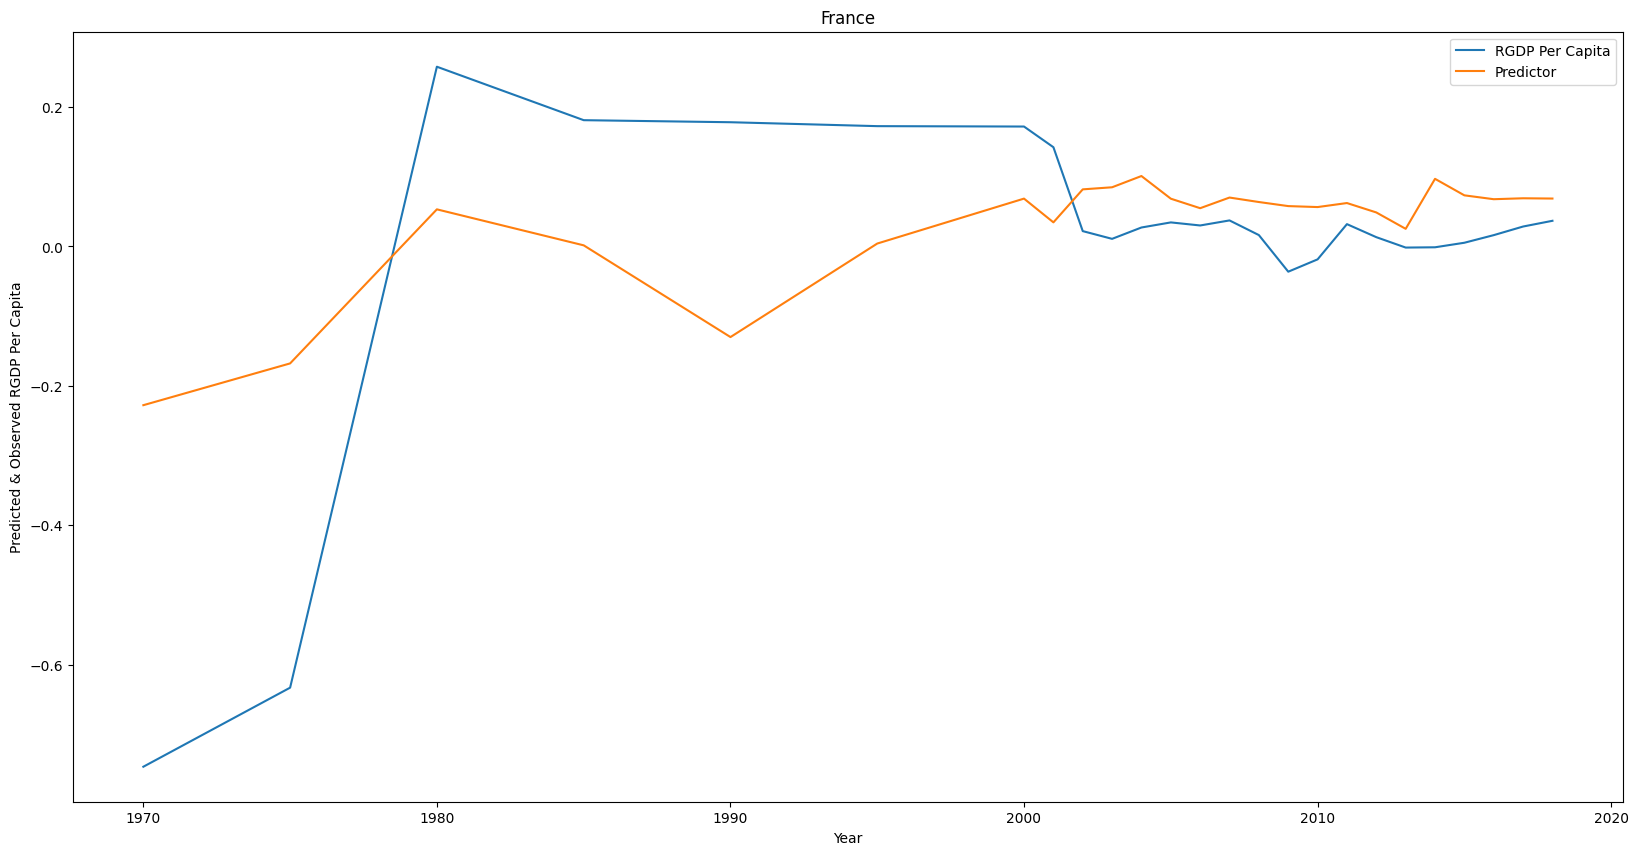

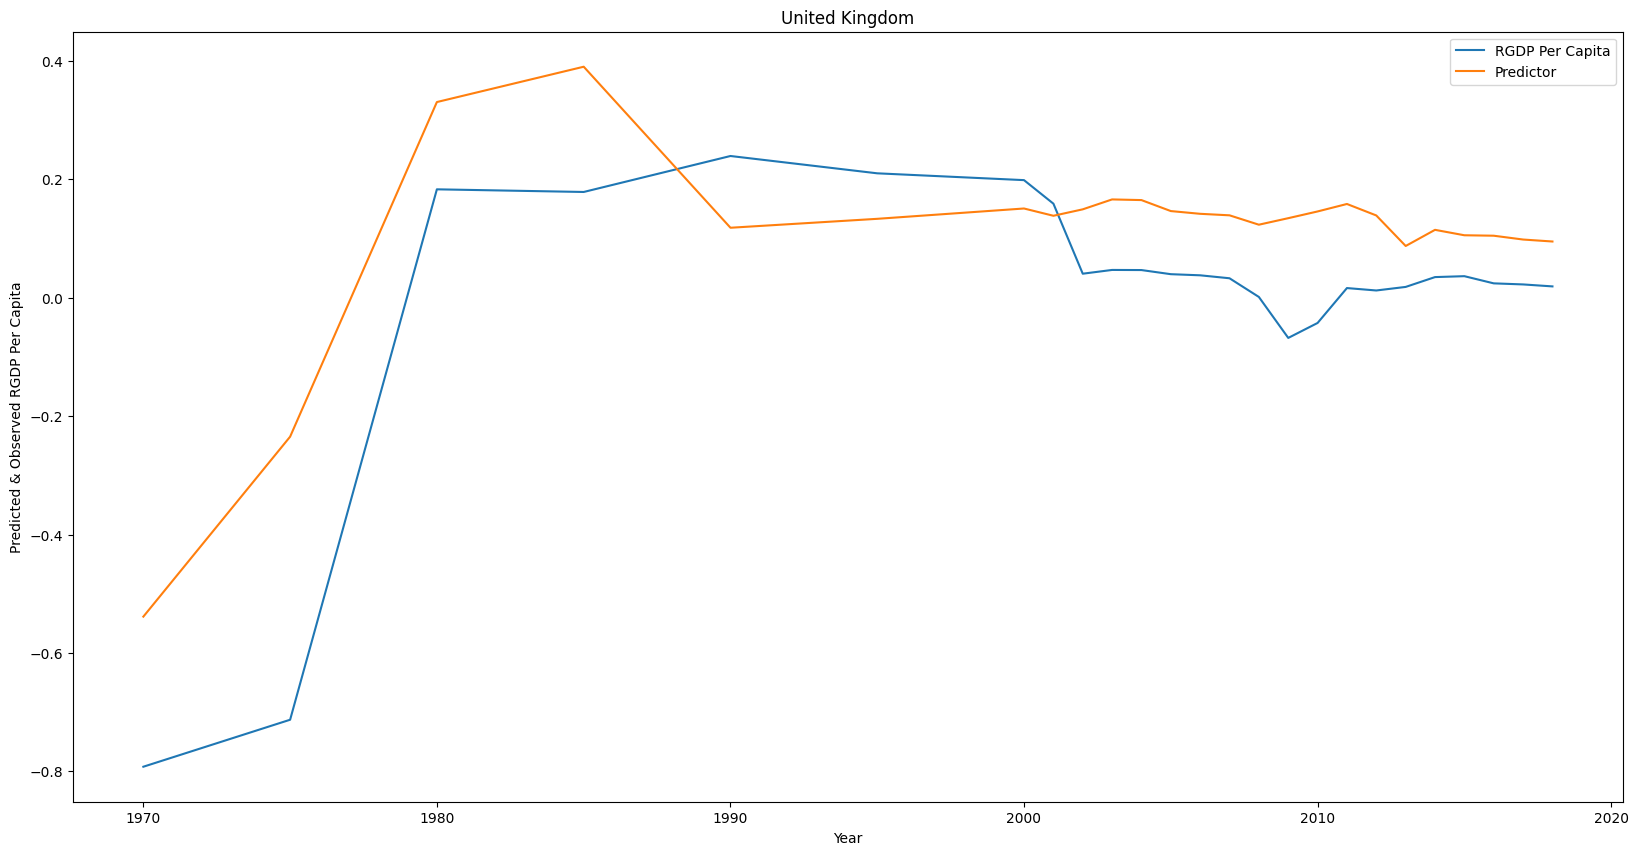

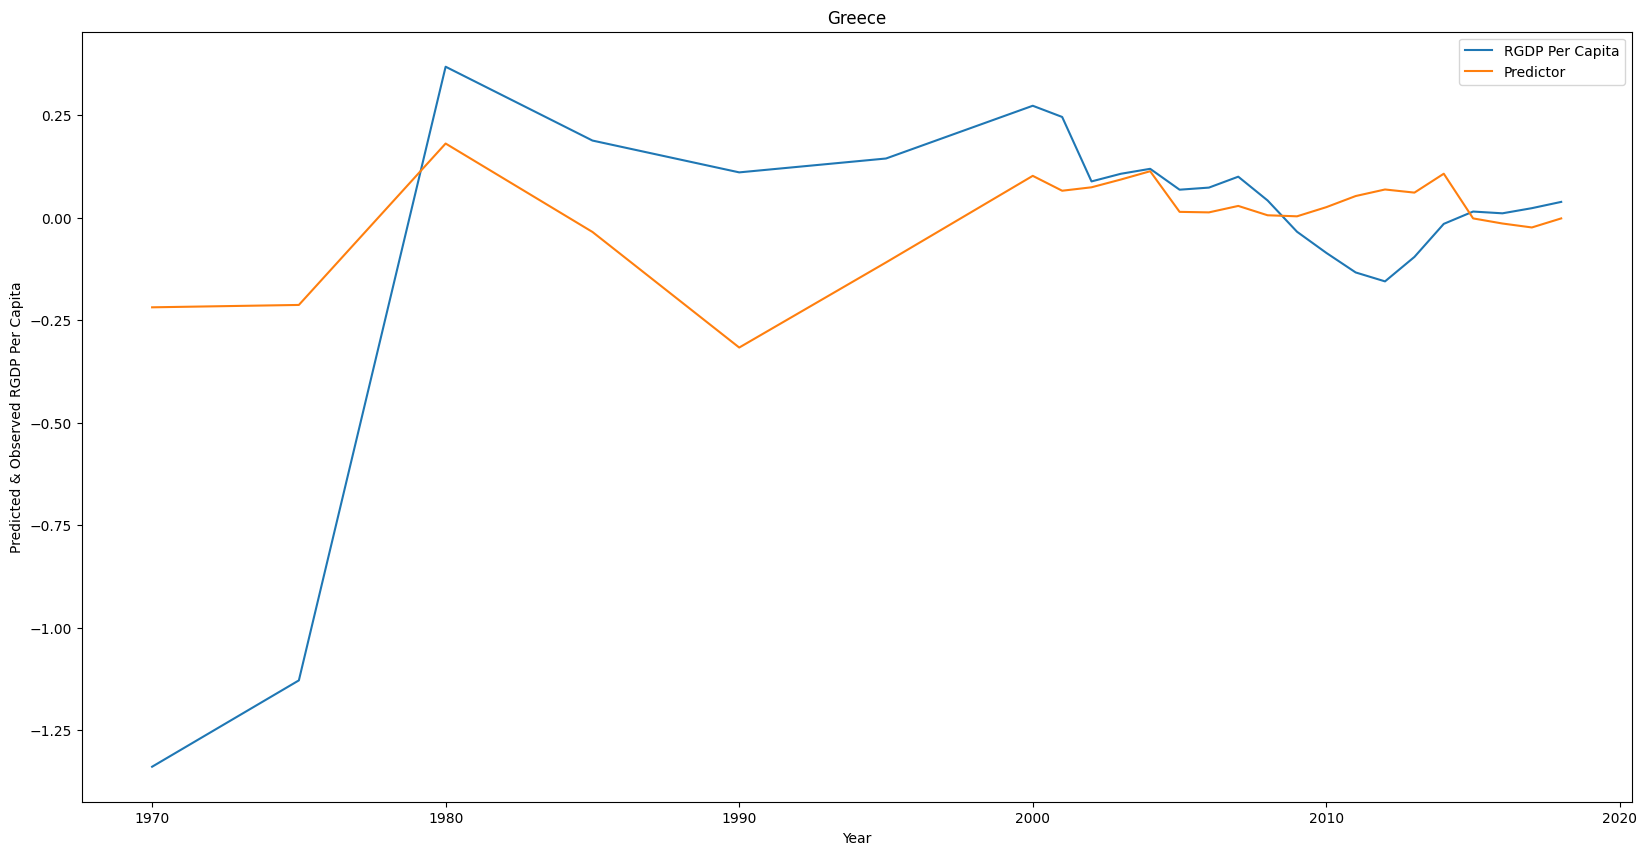

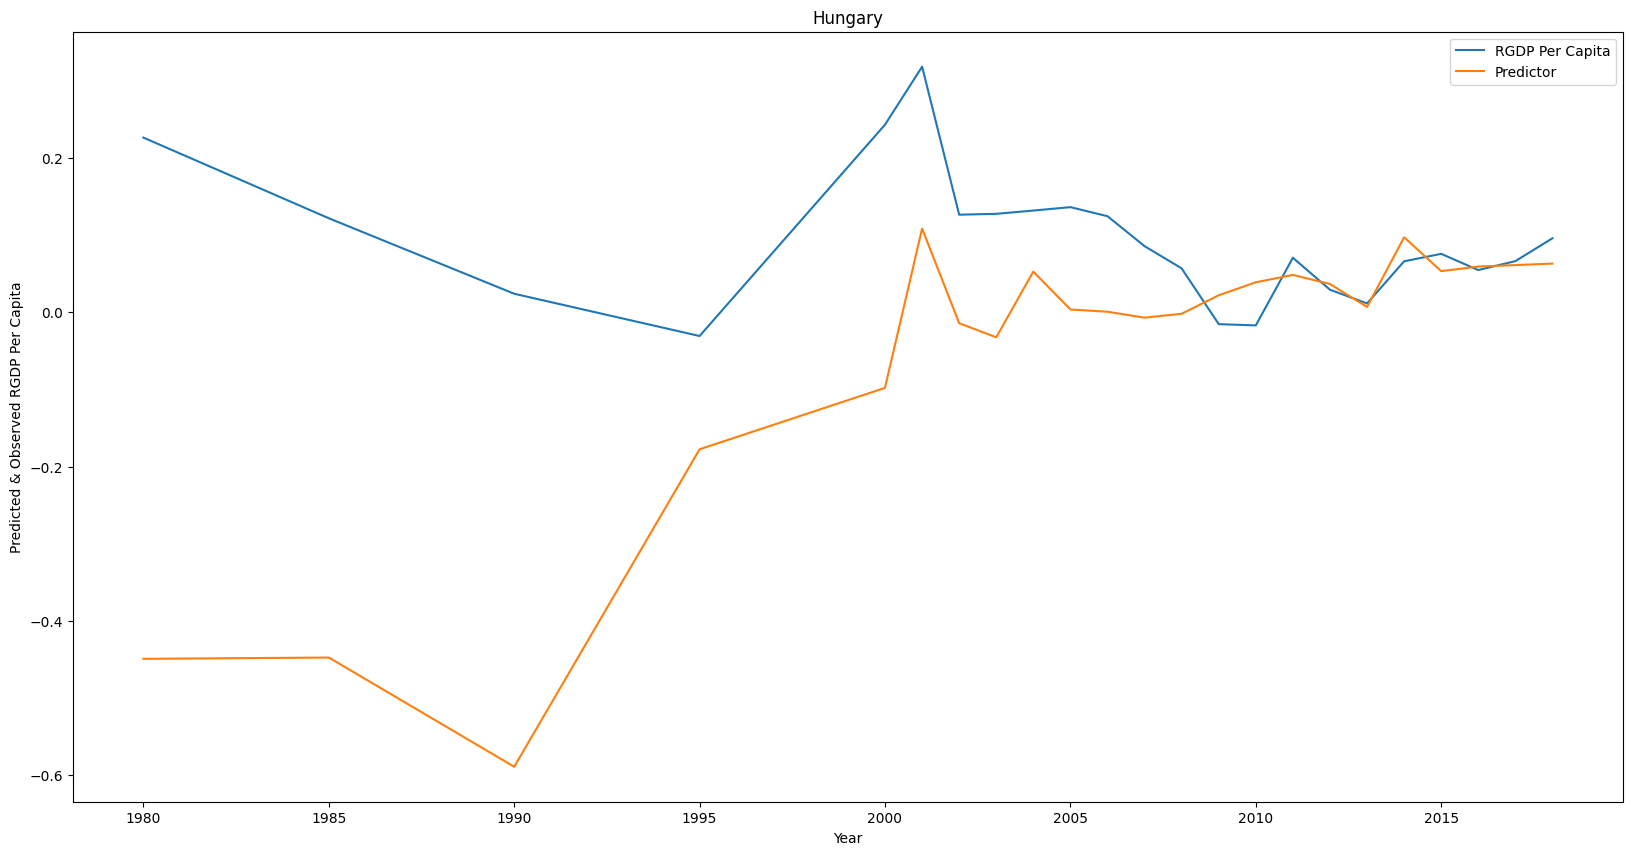

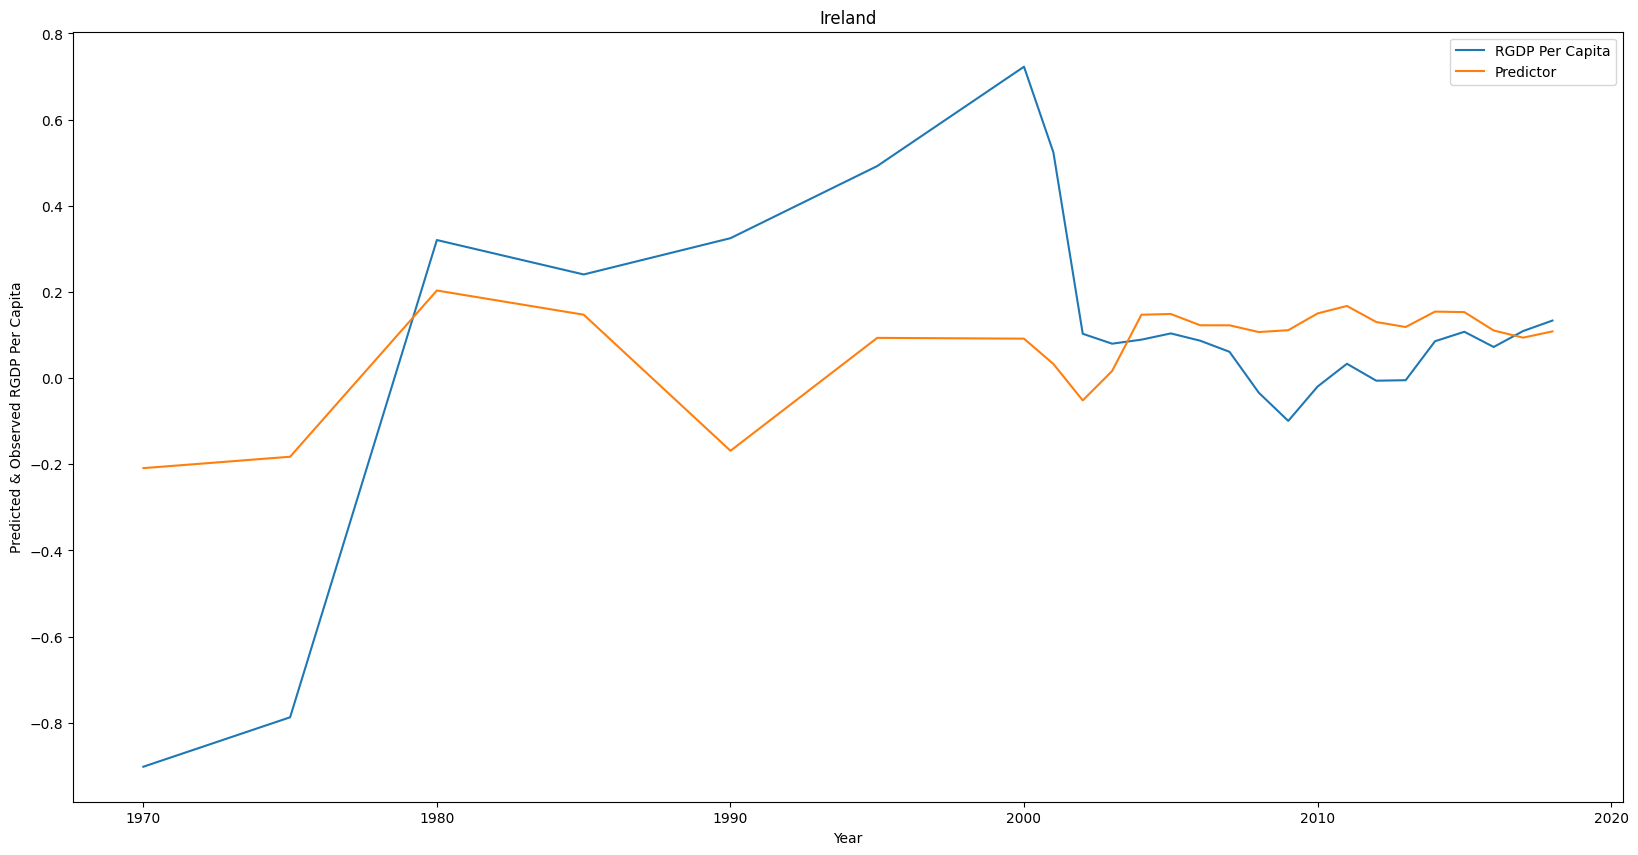

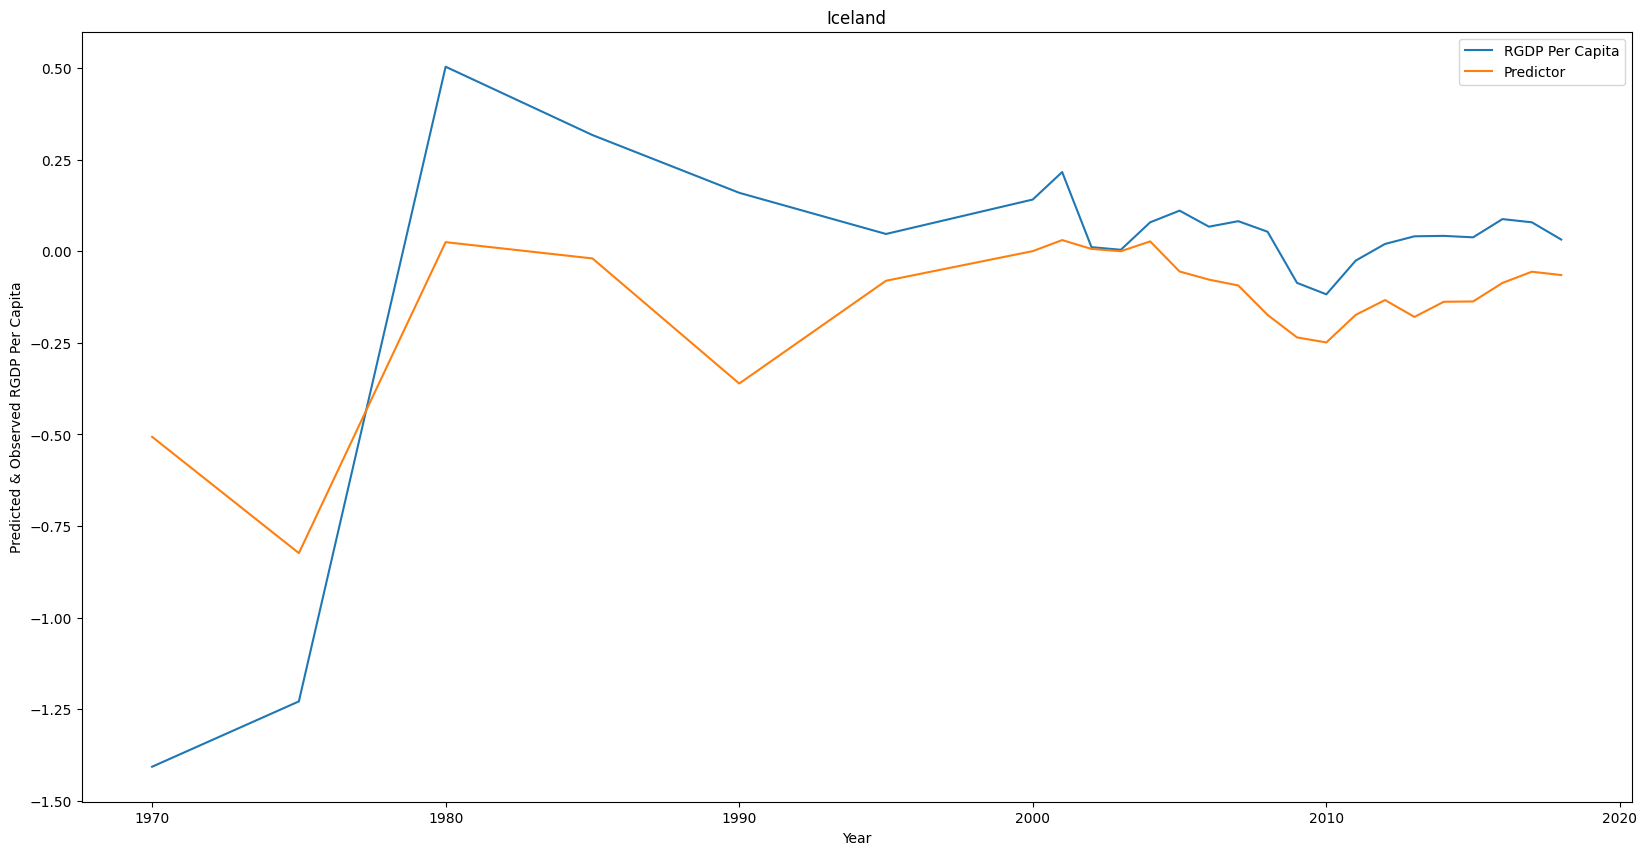

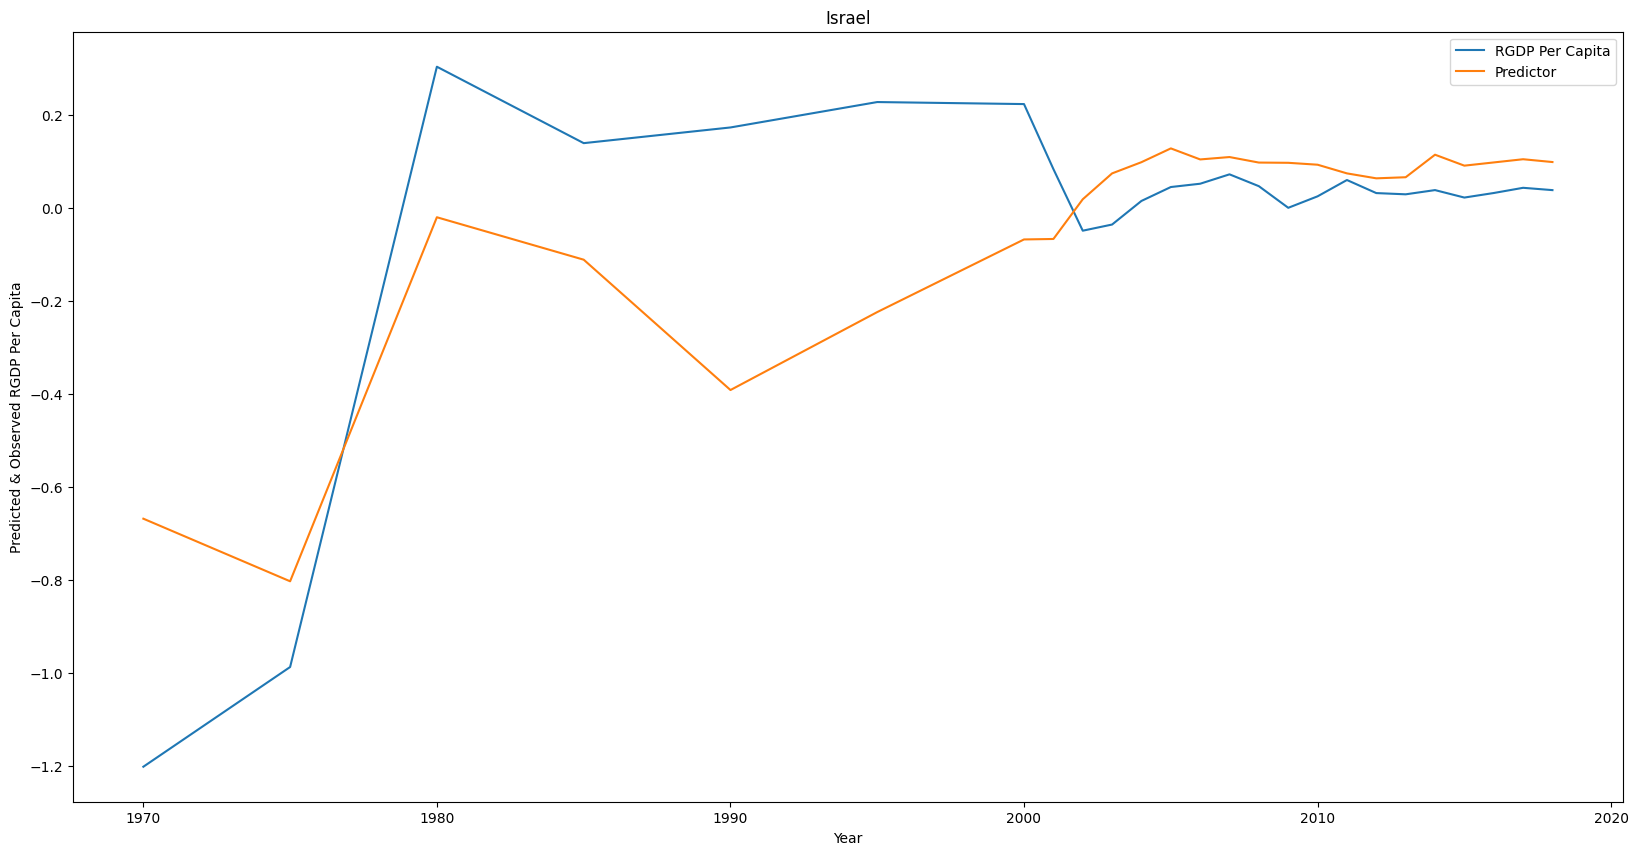

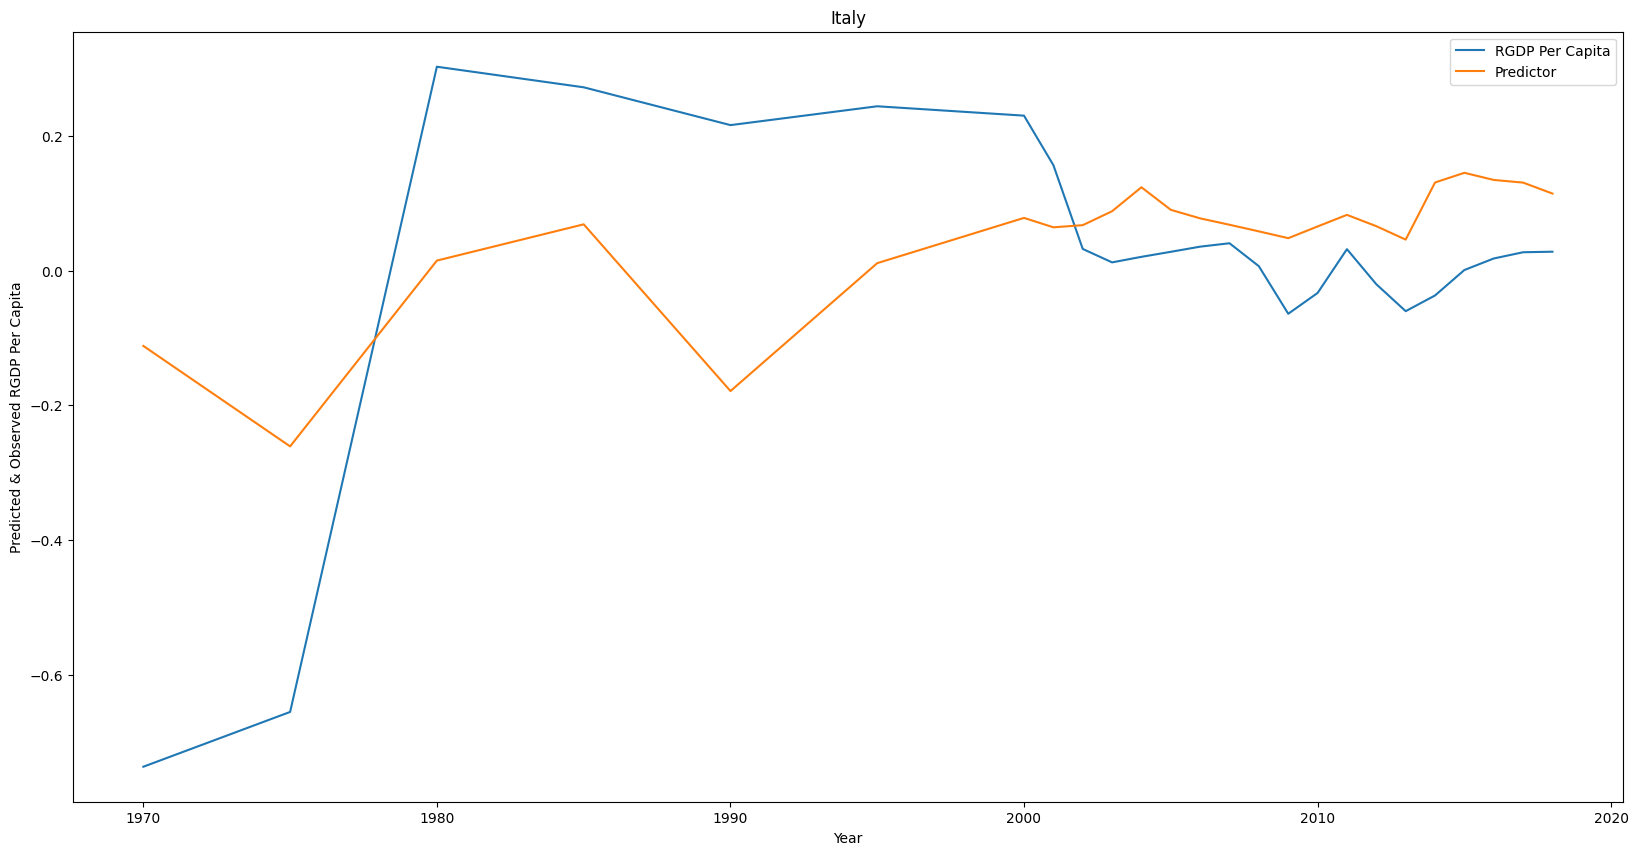

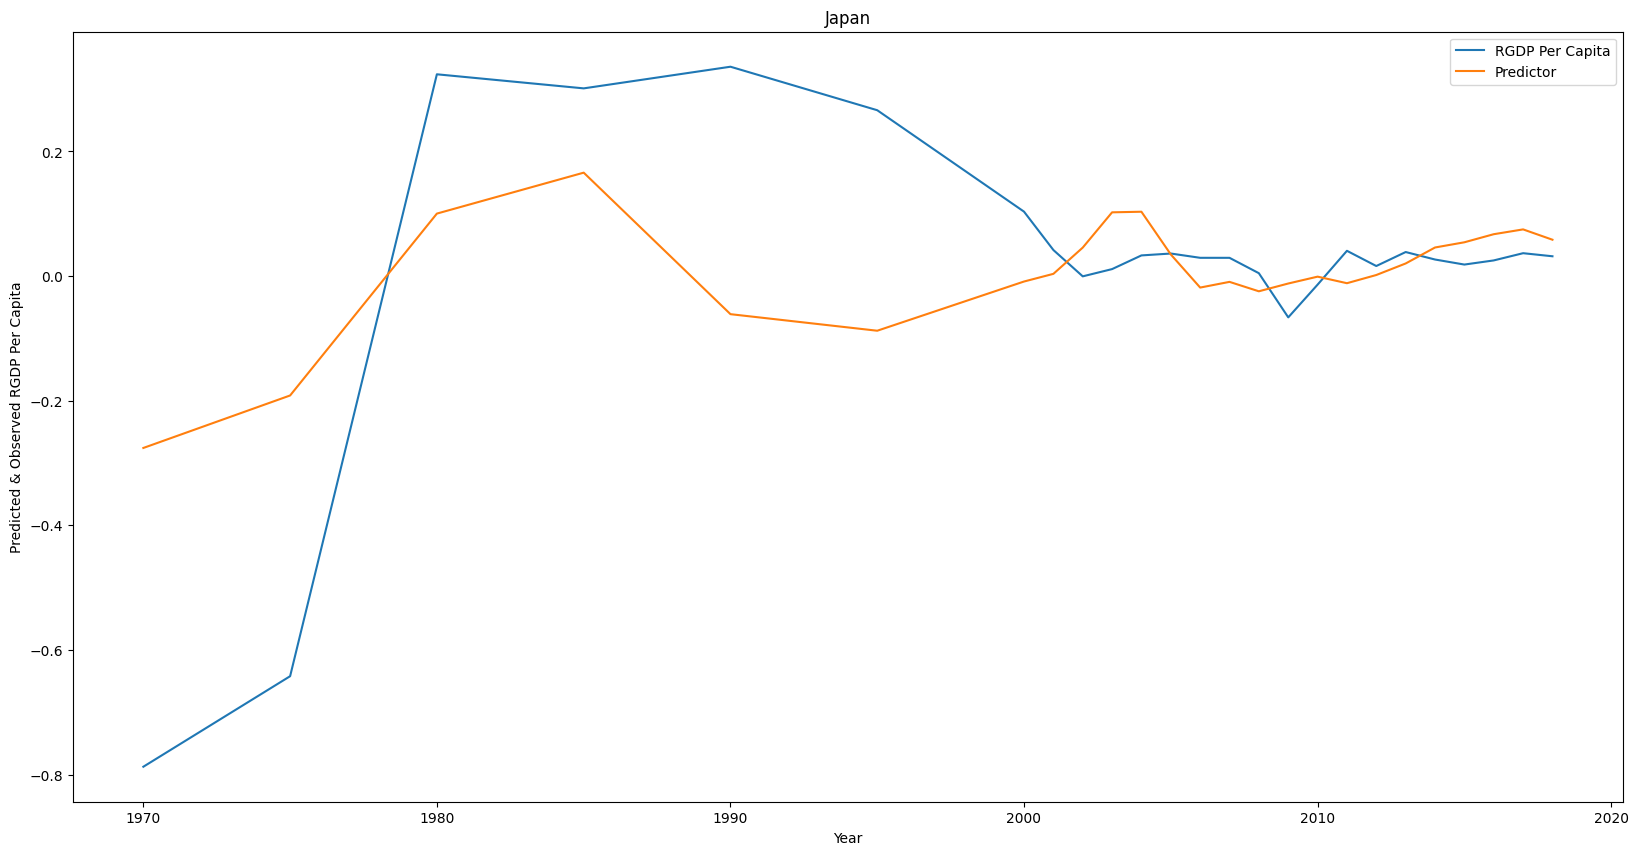

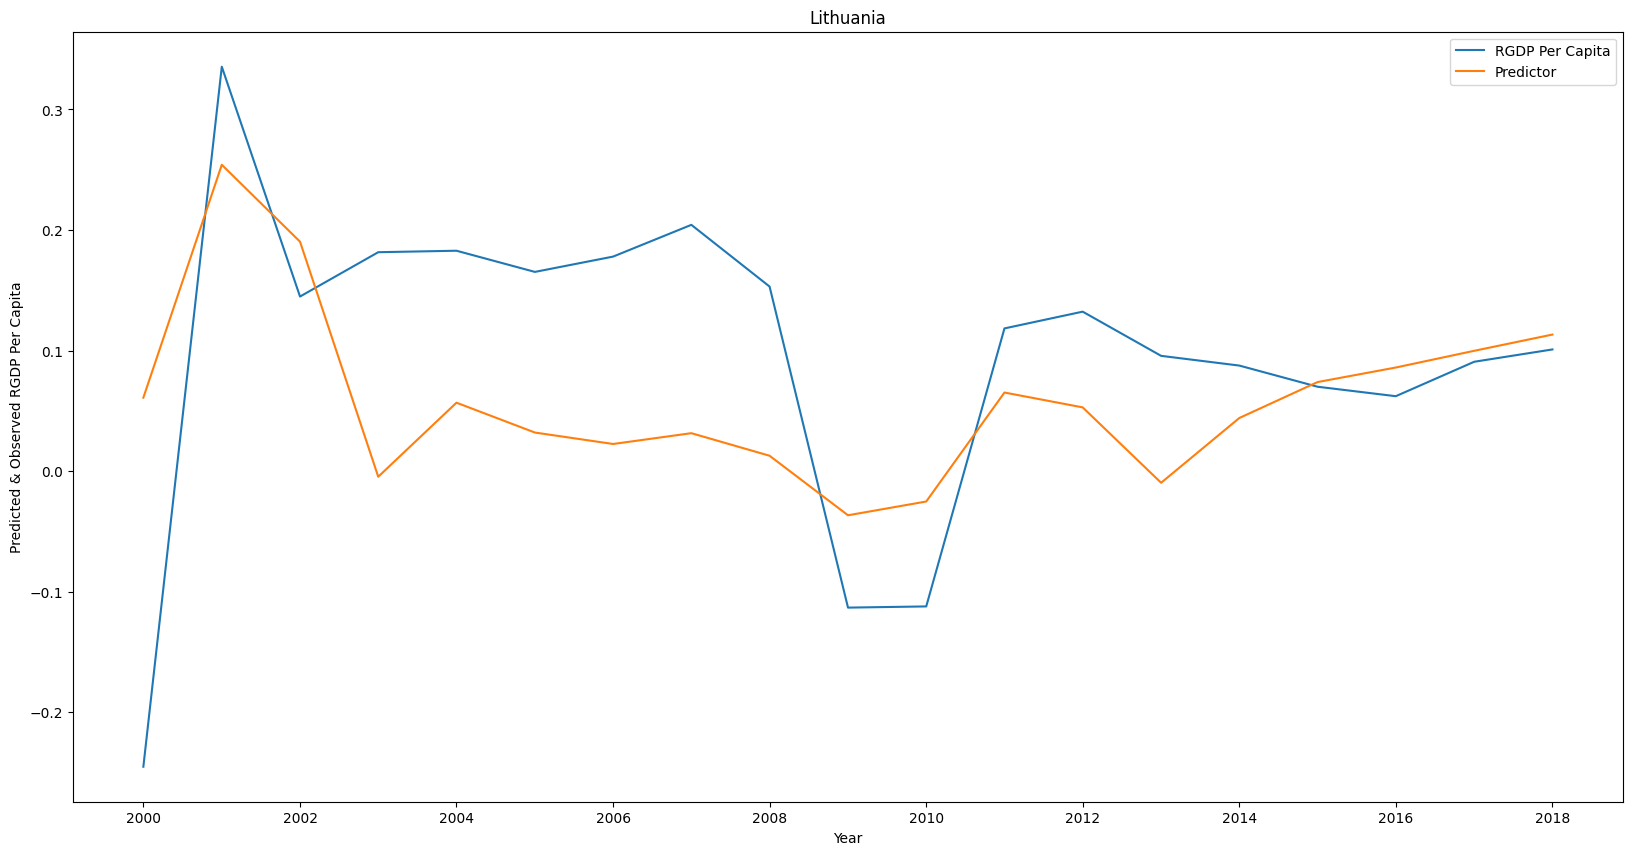

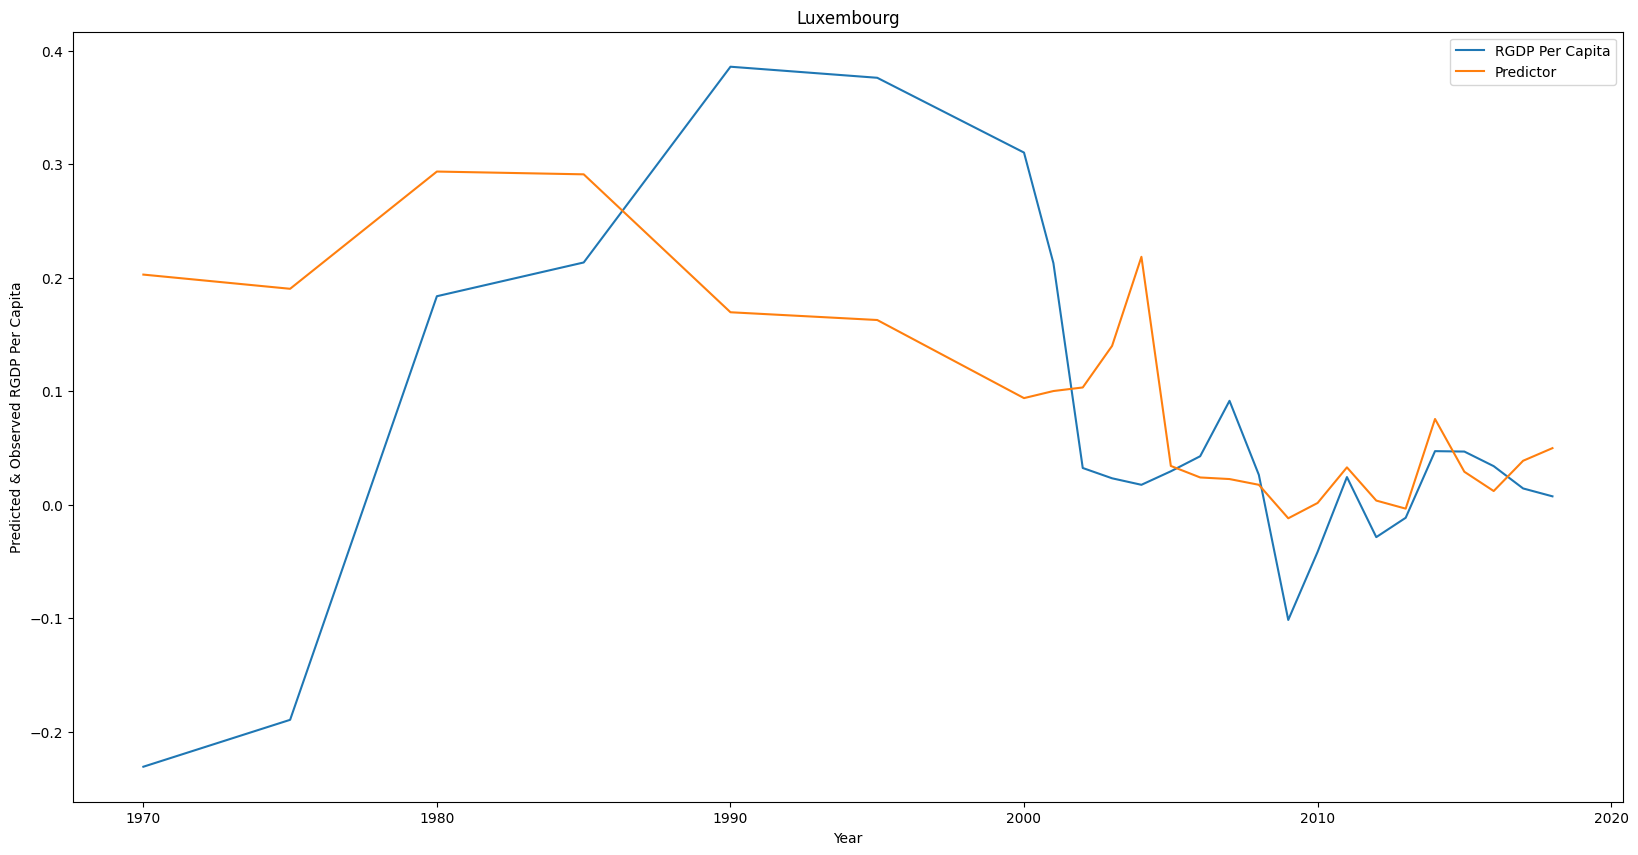

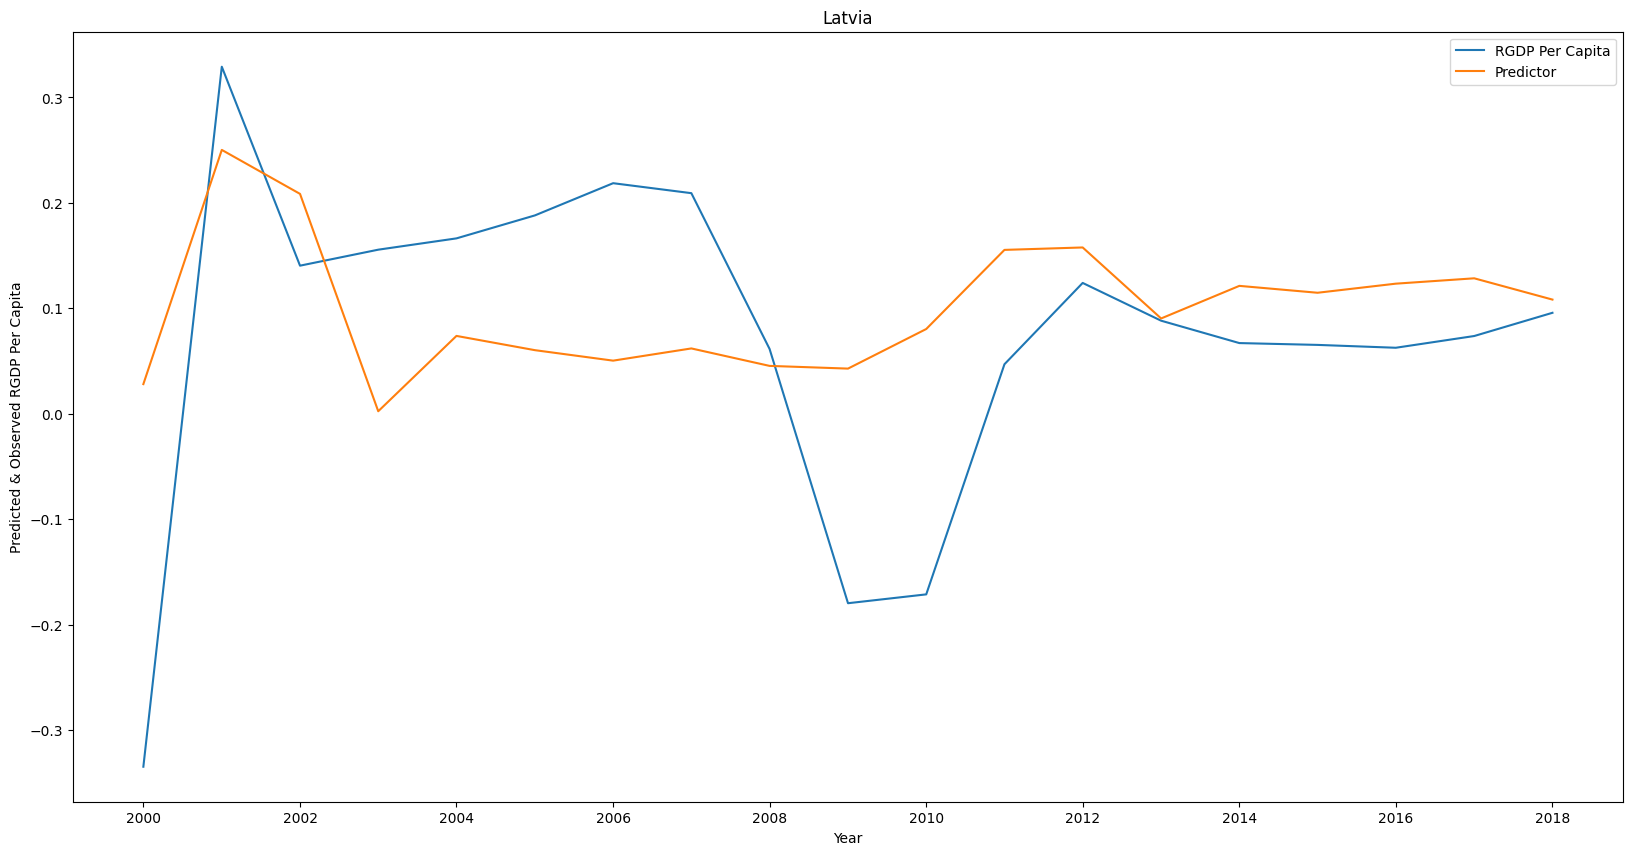

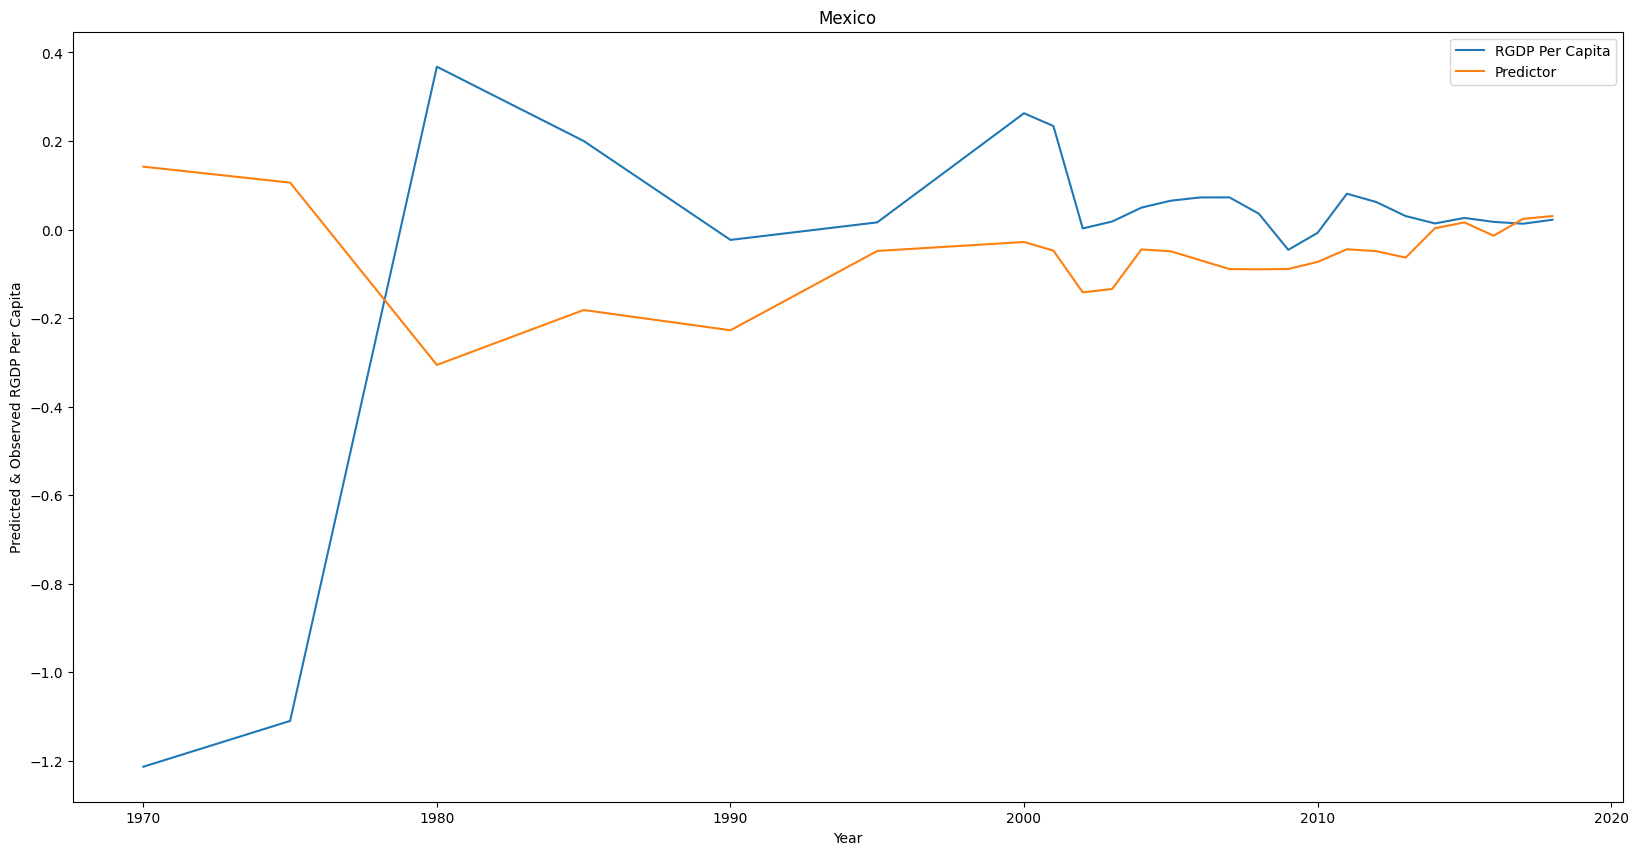

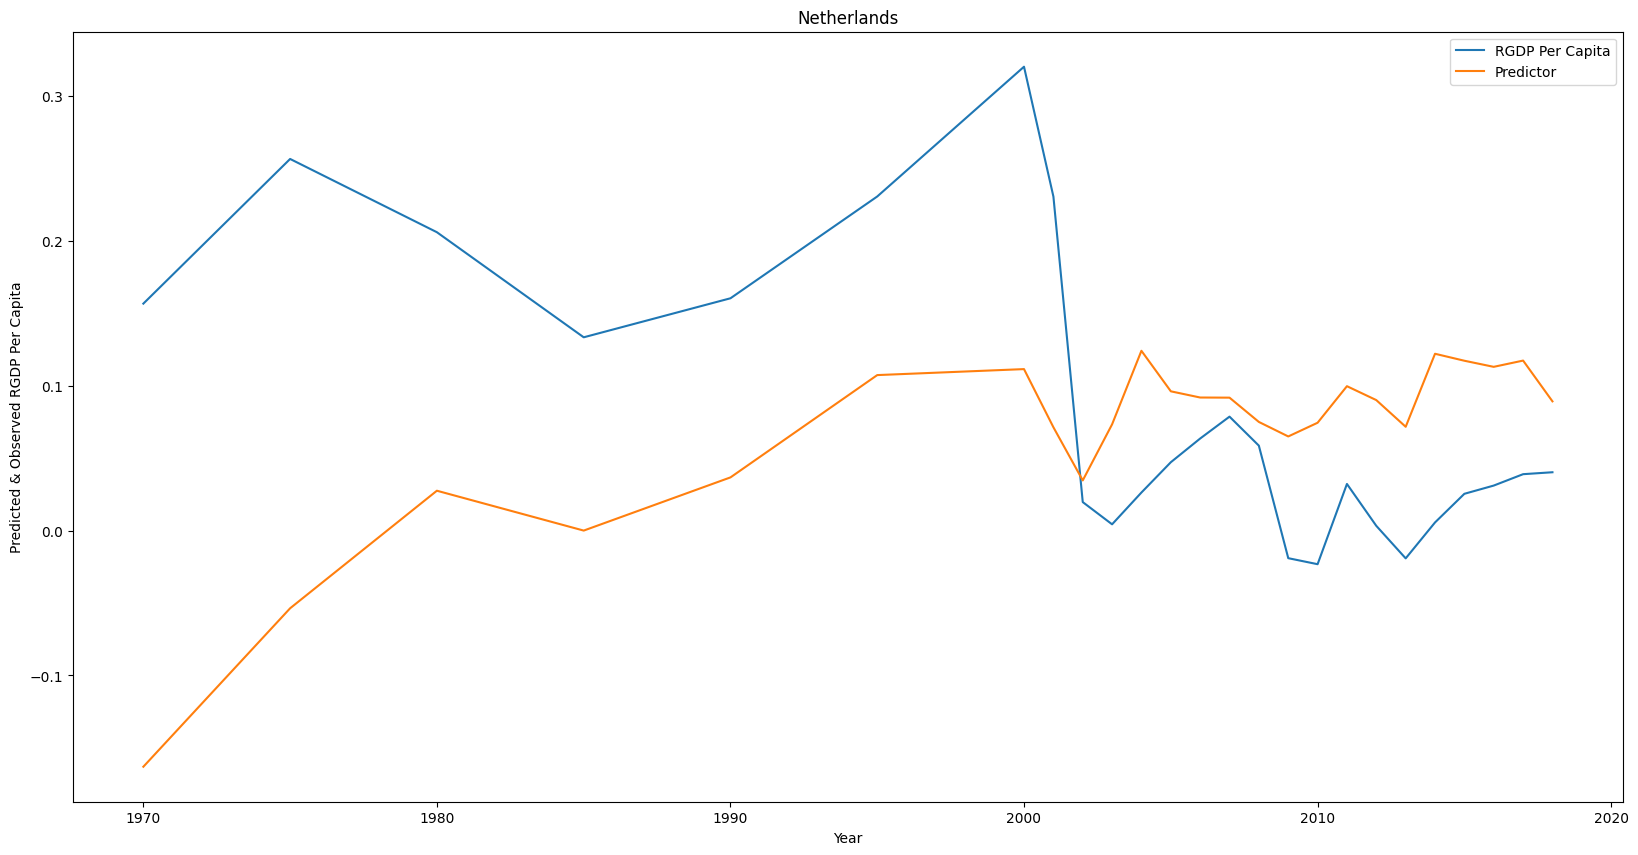

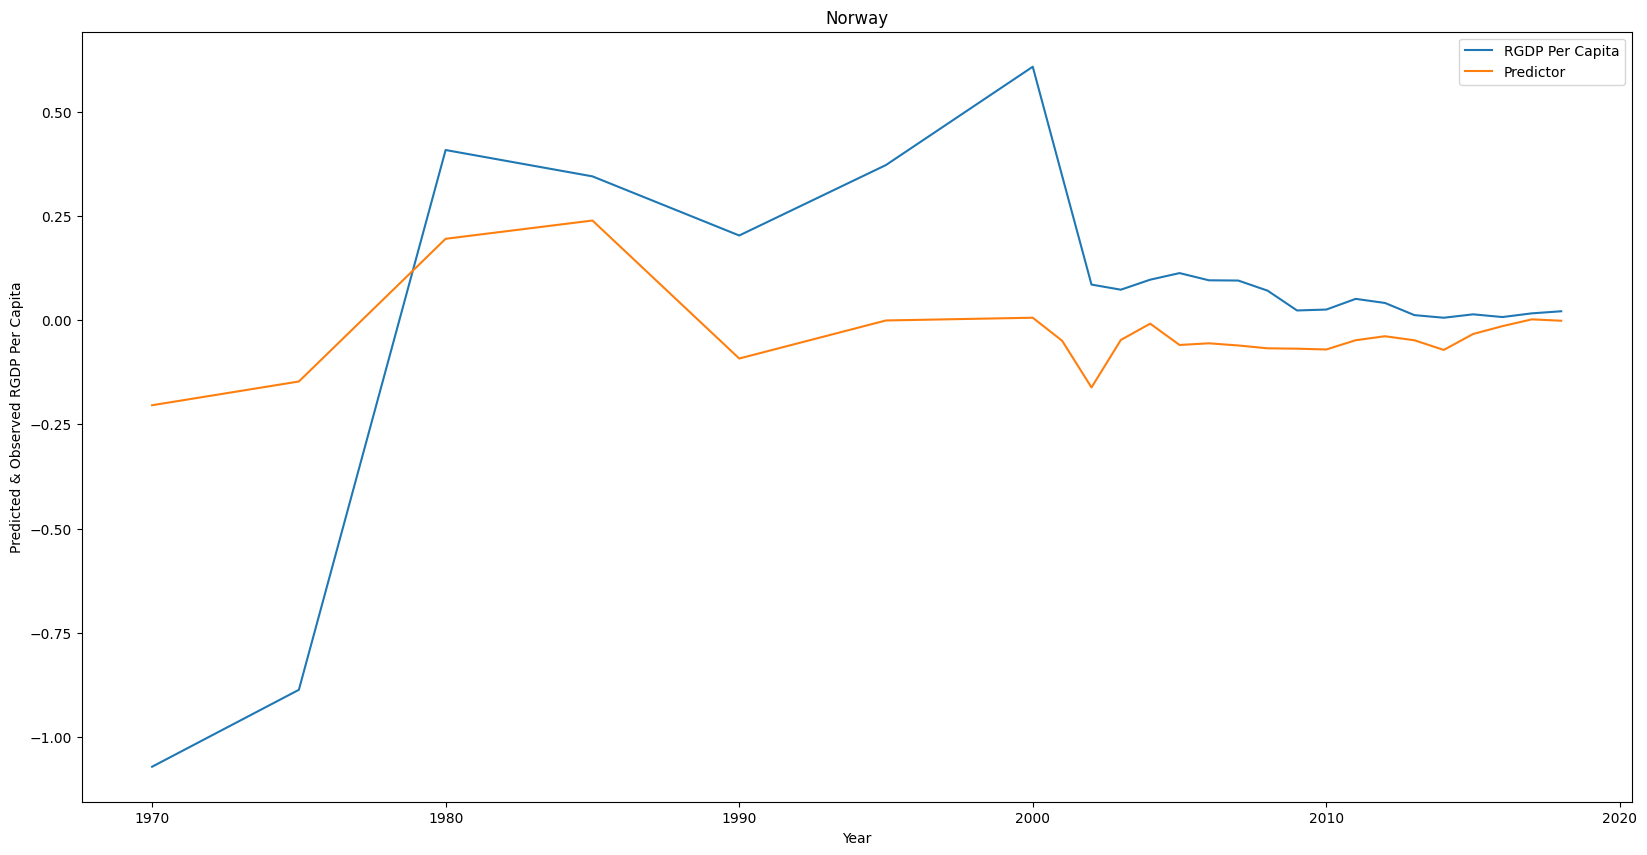

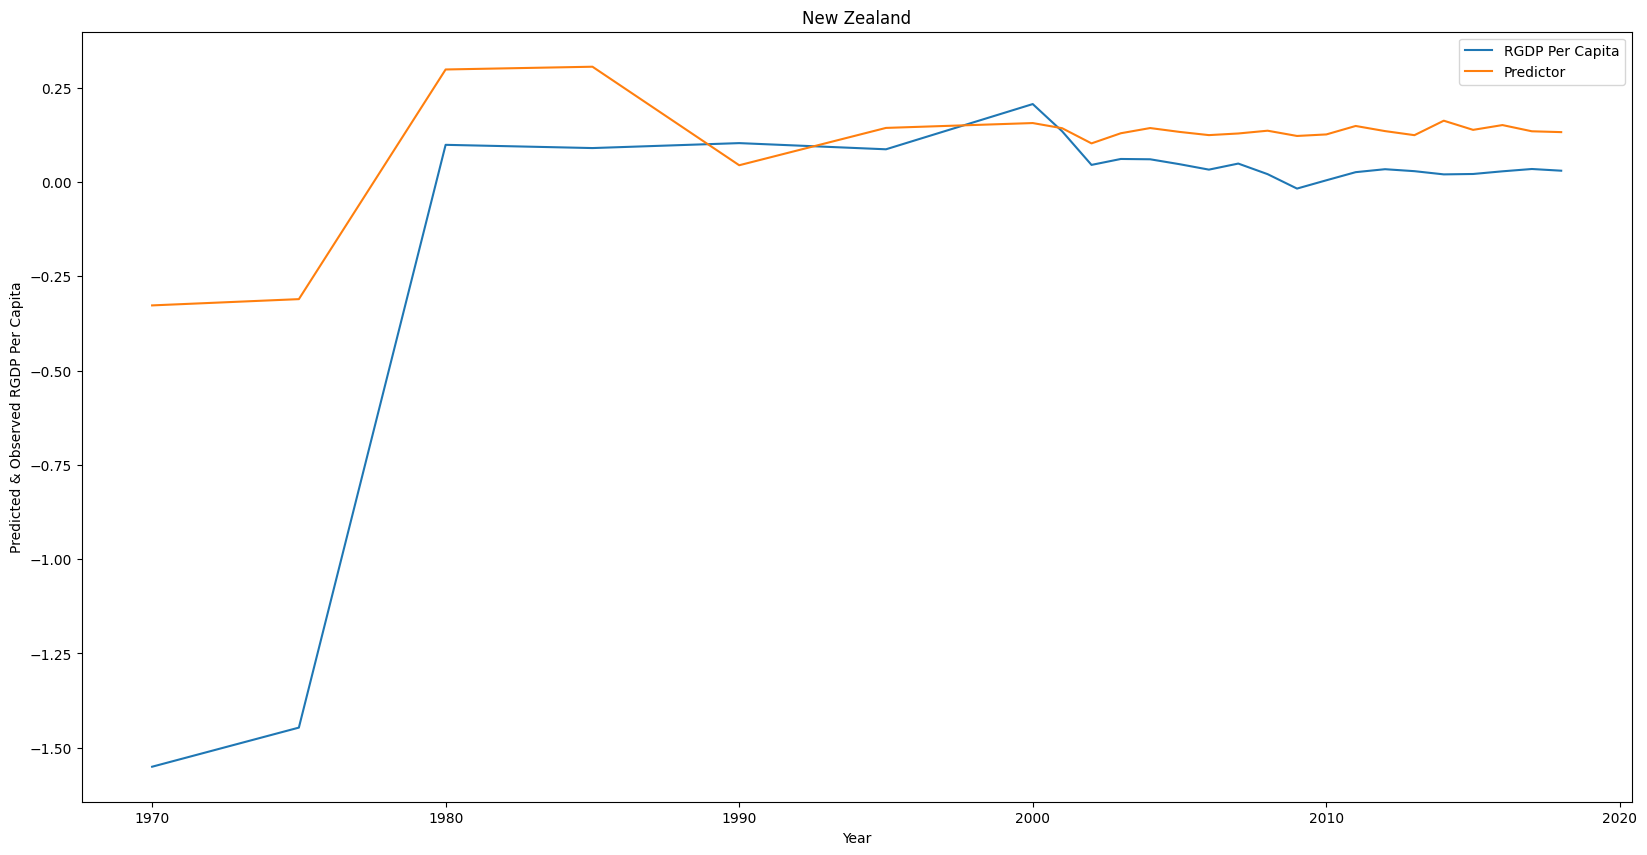

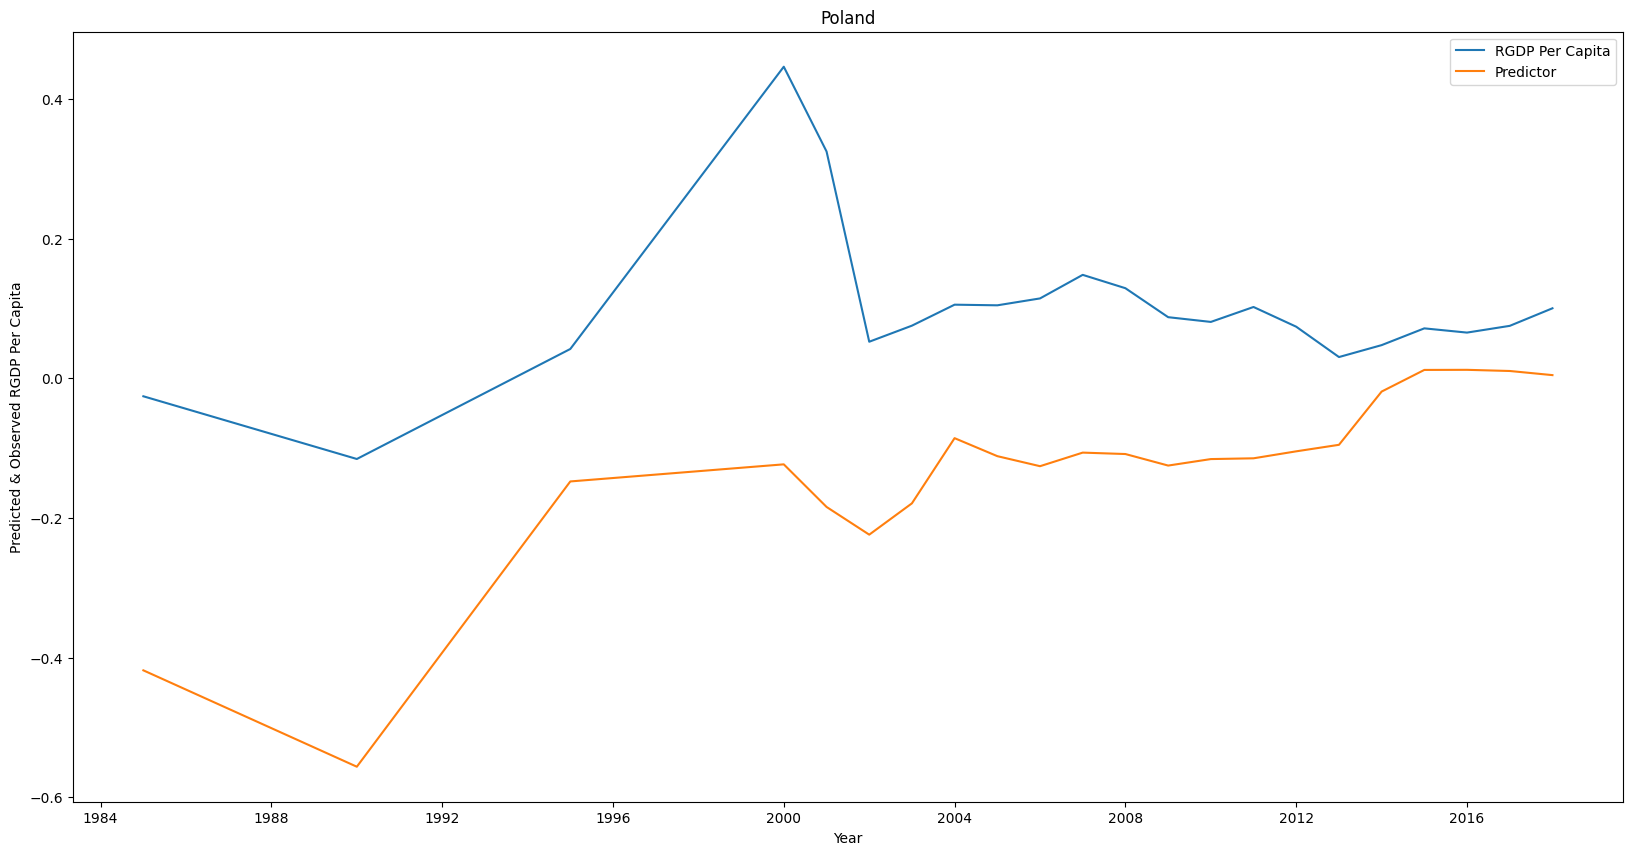

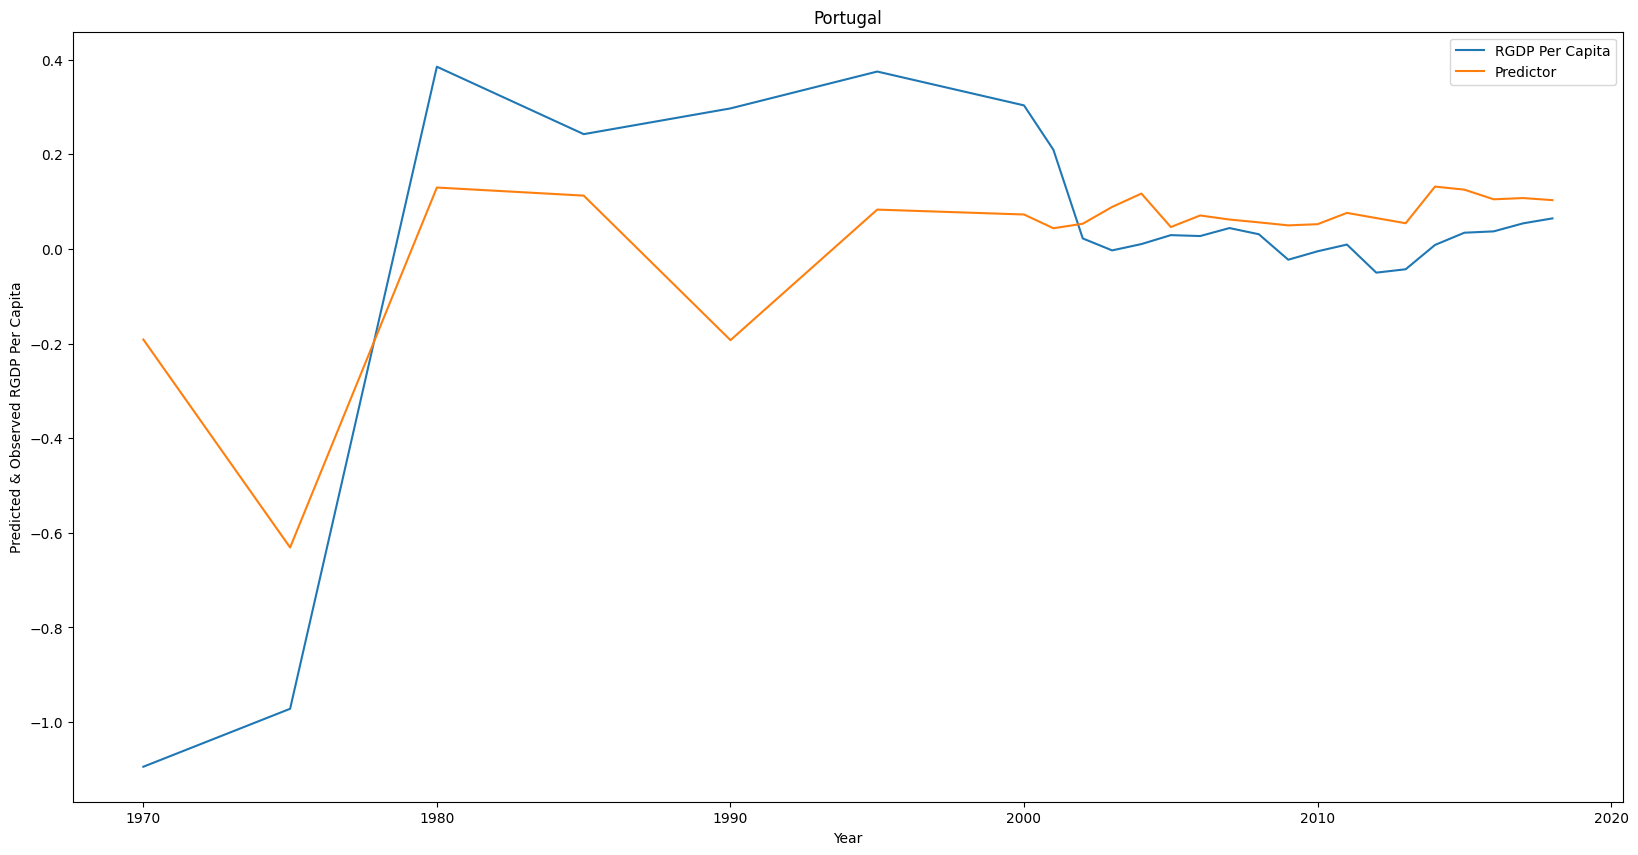

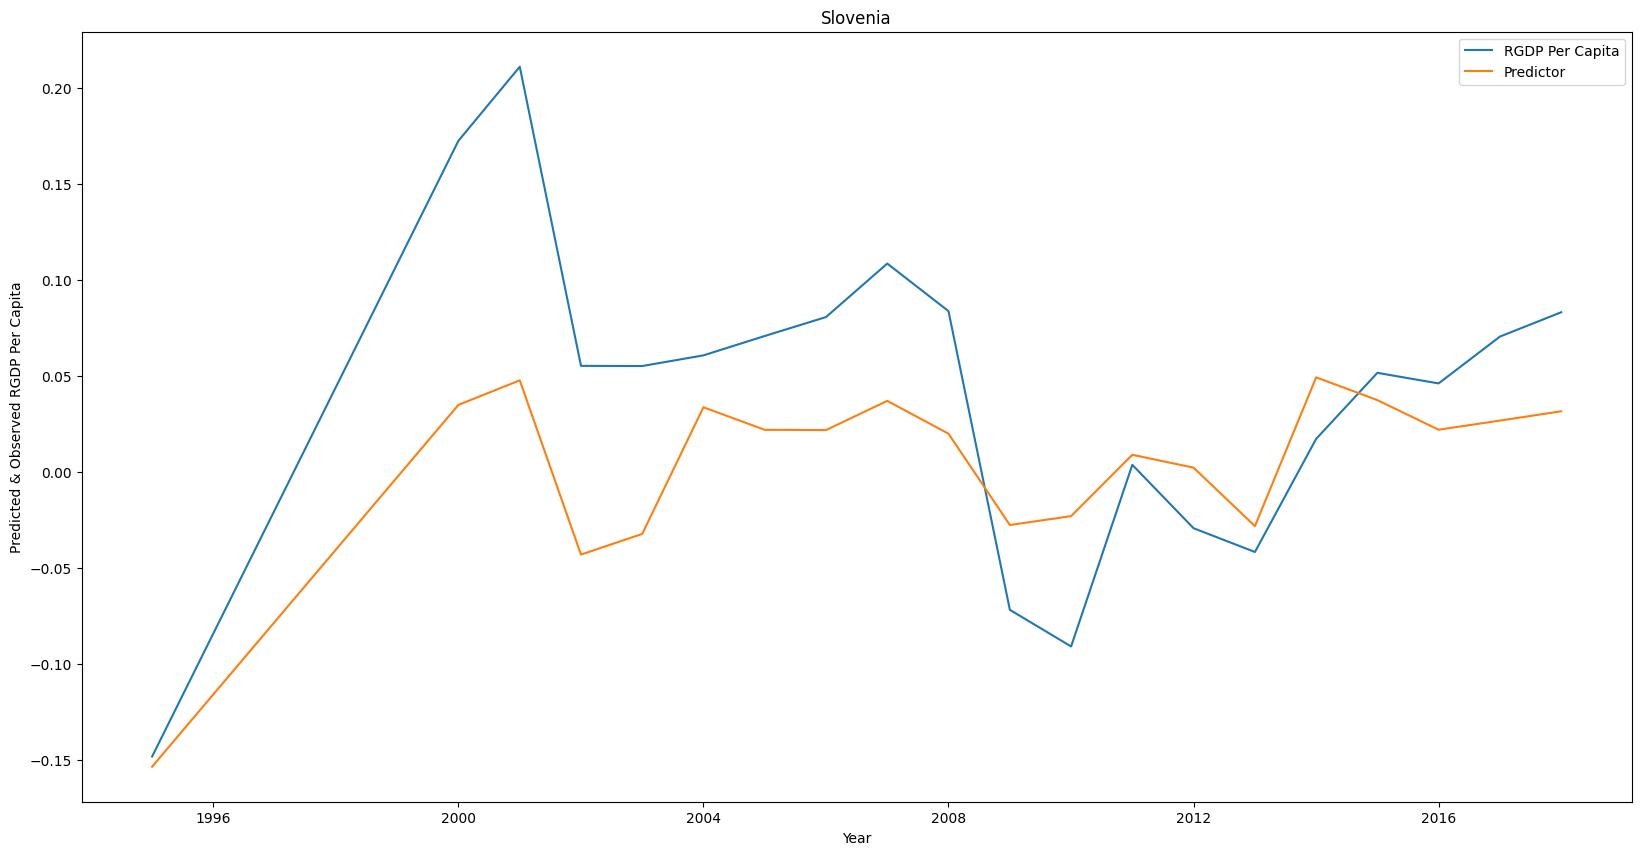

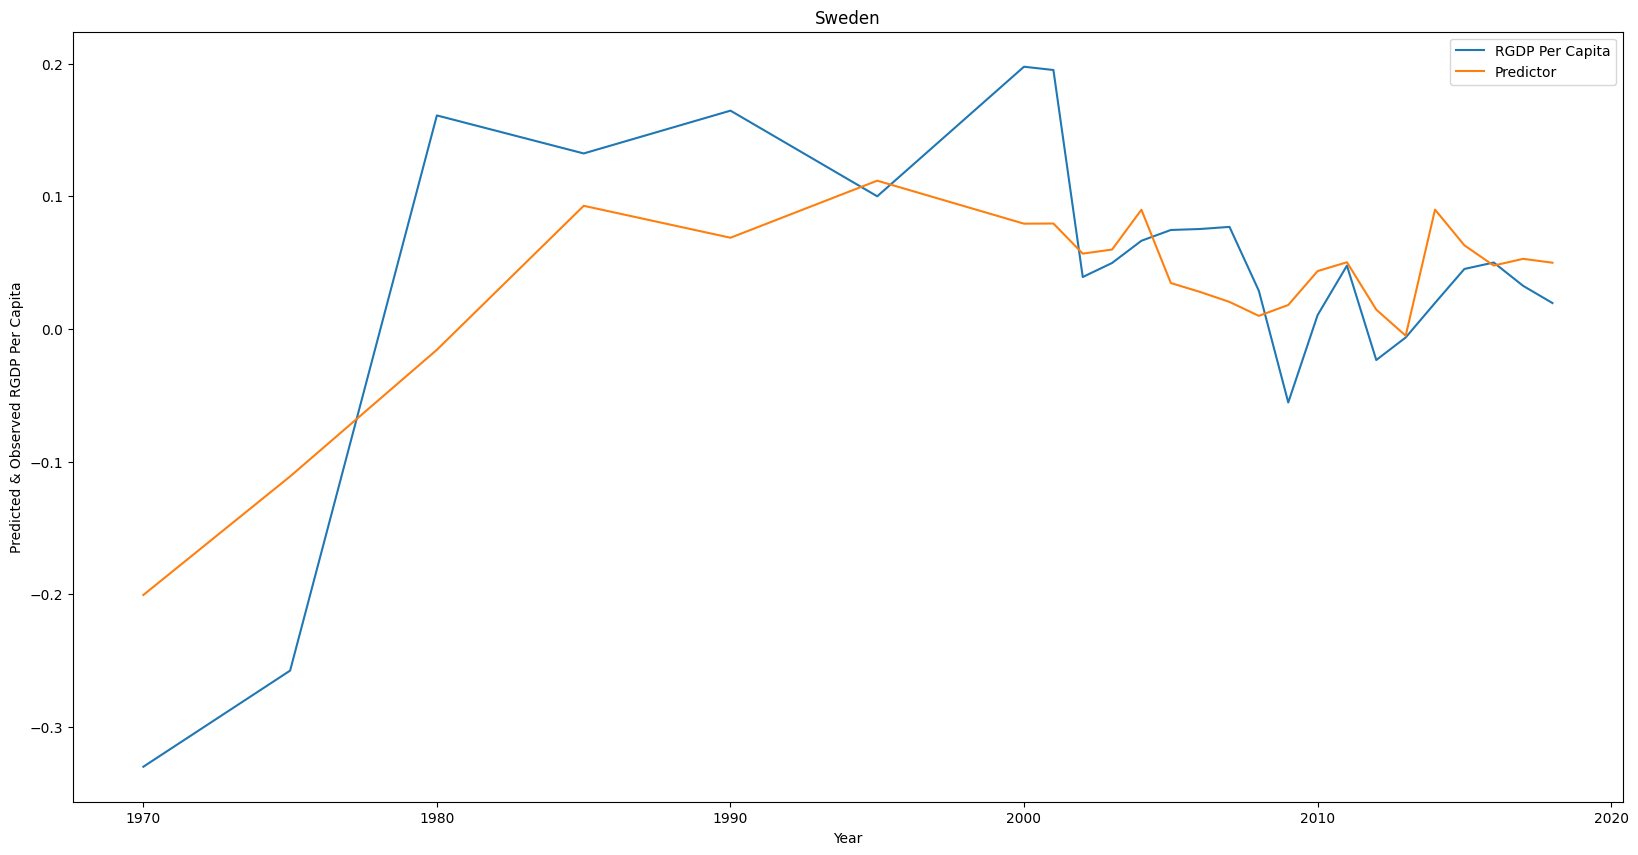

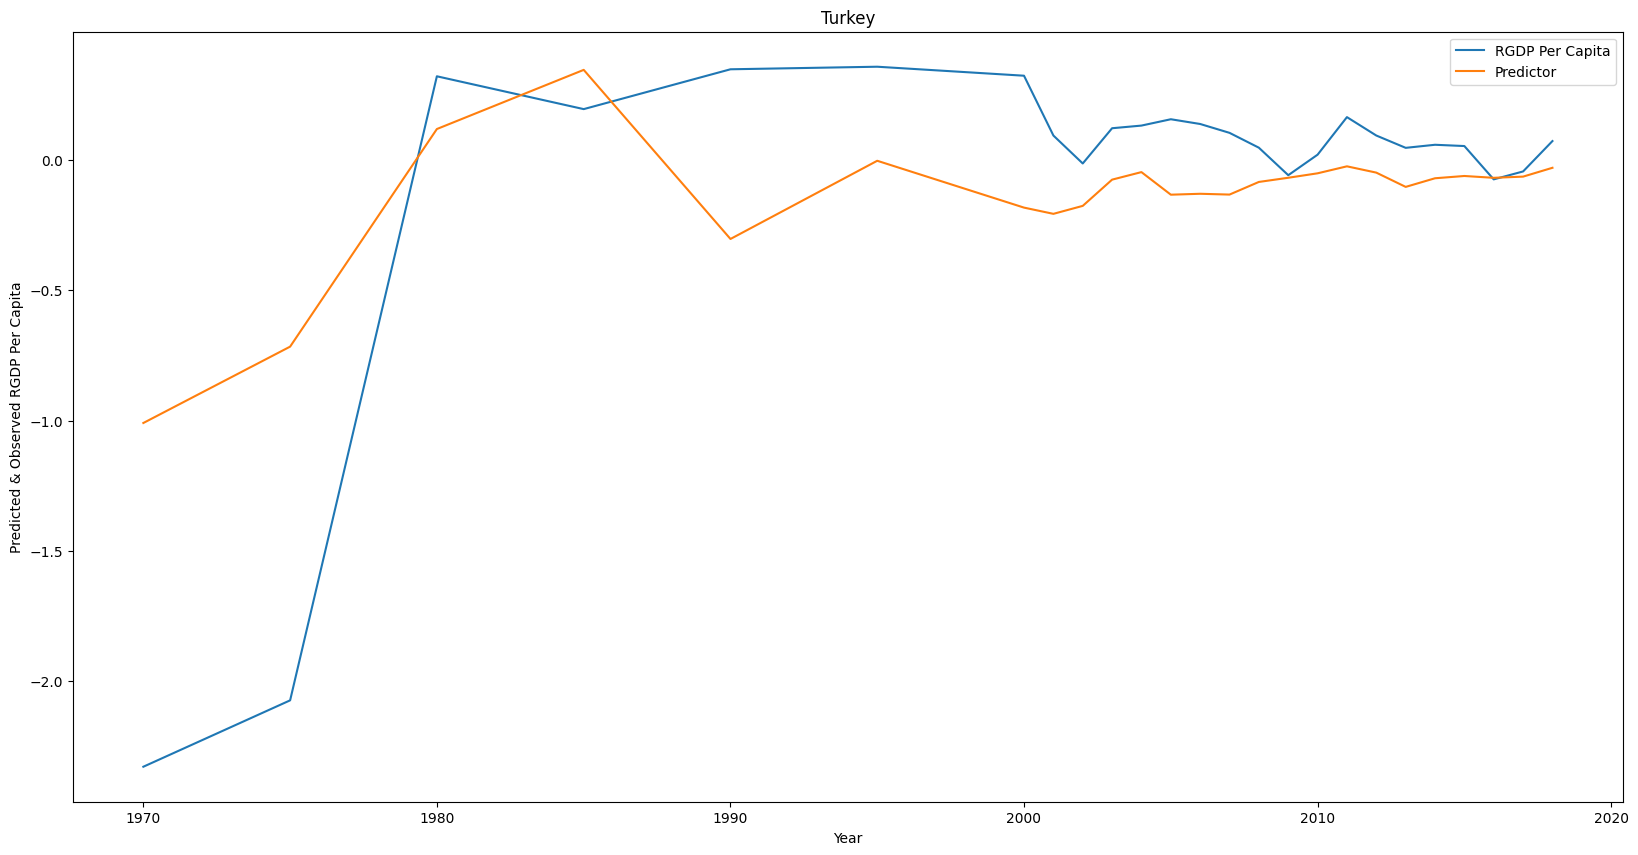

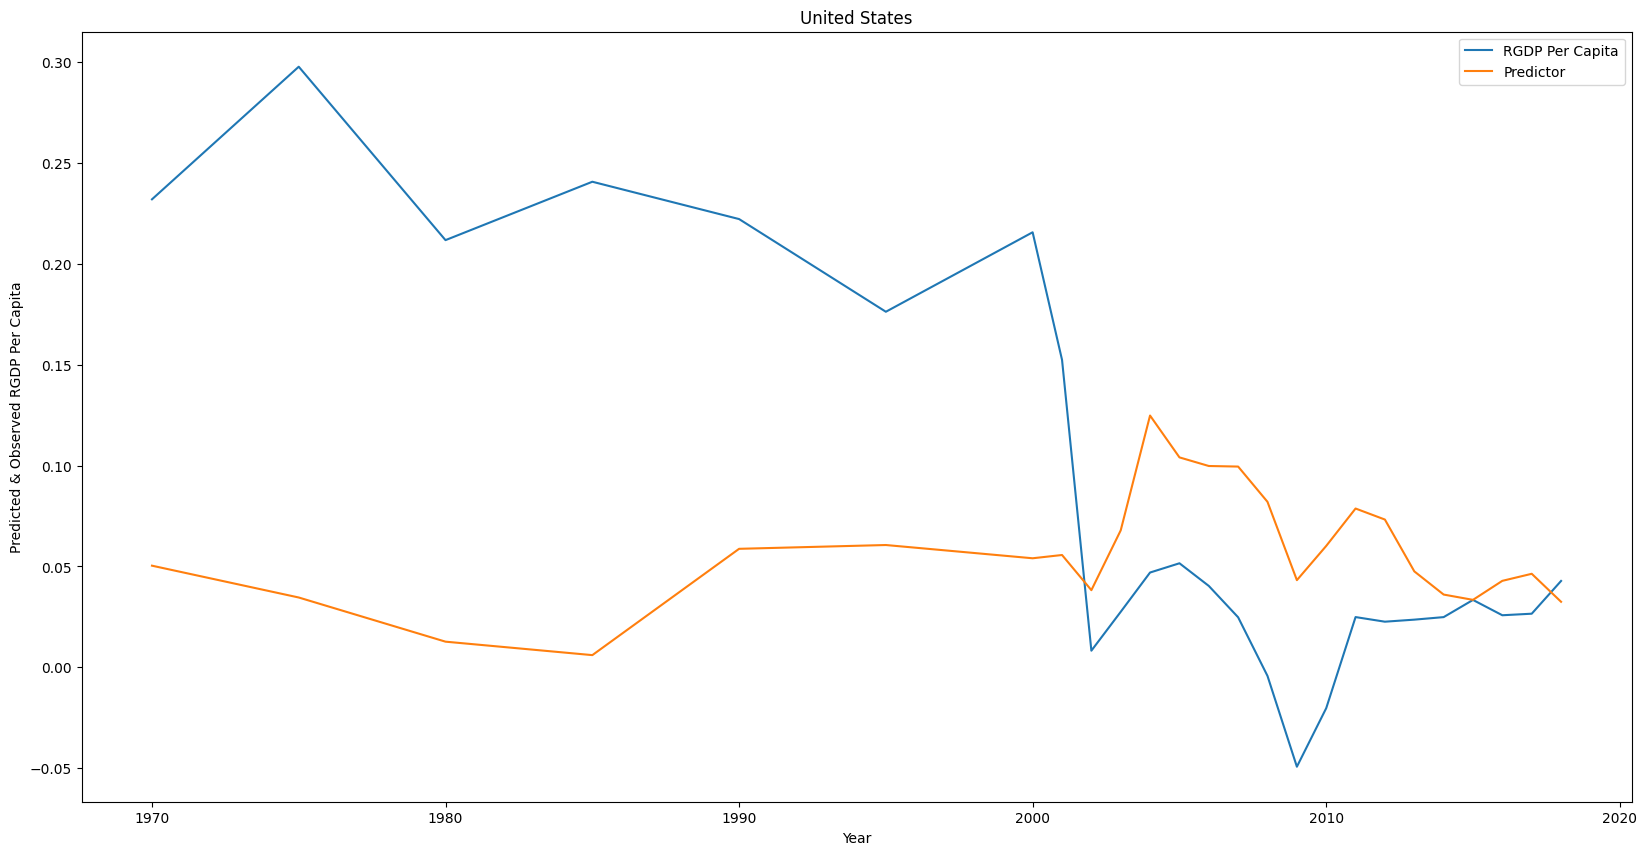

In [30]:
# Loop over the countries in the data and plot the observed and predicted values
for country in reg_data1['Countries'].unique():

    if country in oecd_countries:

        # Subset the data to the current country
        country_df = reg_data1[reg_data1['Countries'] == country]

        # Plot the observed and predicted values
        # Create a new figure and axis object
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.plot(country_df.index.get_level_values(1), country_df['RGDP Per Capita'], label='RGDP Per Capita')
        ax.plot(country_df.index.get_level_values(1), country_df['Predictor'], label='Predictor')

        # Set the axis labels and title
        ax.set_xlabel('Year')
        ax.set_ylabel('Predicted & Observed RGDP Per Capita')
        ax.set_title(f'{country}')

        # Add a legend and show the plot
        ax.legend()
        plt.show()